# **Employee Attrition Prediction Model**

**Project By** : Niharika Bhasin [nb4048]

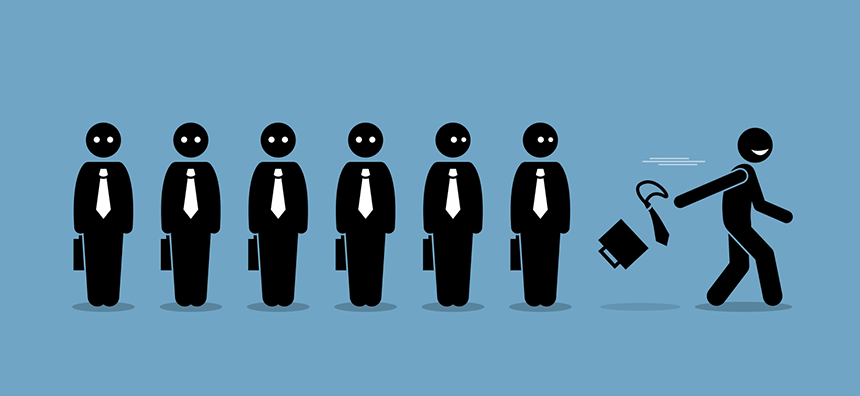

In a highly competitive market, organizations strive to retain top talent to maintain operational efficiency and reduce costs associated with employee turnover. Employee attrition (i.e., the loss of employees through voluntary or involuntary means) can significantly affect an organization’s productivity, morale, and financial health.

This project focuses on building a machine learning model to predict whether an employee is likely to leave the organization. By analyzing various factors such as demographics, job role, satisfaction levels, and performance metrics, the model will help companies identify employees at risk of attrition. Early intervention strategies (such as improved benefits, job-role changes, or career development opportunities) can then be implemented to enhance employee retention.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [ ]:
!pip install catboost

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier

# Advanced Models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    precision_score,
    recall_score
)

# Statistical Tests
from scipy.stats import f_oneway, chi2_contingency


In [ ]:
!pip install imbalanced-learn
!pip install xgboost

## ***Basic Data Exploration***

In [ ]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
print(df.columns)
df.head()

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')


age attrition     businesstravel  dailyrate              department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   distancefromhome  education educationfield  employeecount  employeenumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  relationshipsatisfaction standardhours  stockoptionlevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   totalworkingyears  trainingtimeslastyear worklifebalance  yearsatcompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  yearsincurrentrole  yearssincelastpromotion  yearswithcurrmanager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

## ***Understanding Size and Structure of Dataset***

In [ ]:
print("Shape of the DataFrame:", df.shape)
print("Number of Rows in the DataFrame:", len(df))
print("Number of Columns in the DataFrame:", len(df.columns))


Shape of the DataFrame: (1470, 35)
Number of Rows in the DataFrame: 1470
Number of Columns in the DataFrame: 35


In [ ]:
print("Column labels in the dataset (in order):\n")

for column in df.columns:
    print(column)


Column labels in the dataset (in order):

age
attrition
businesstravel
dailyrate
department
distancefromhome
education
educationfield
employeecount
employeenumber
environmentsatisfaction
gender
hourlyrate
jobinvolvement
joblevel
jobrole
jobsatisfaction
maritalstatus
monthlyincome
monthlyrate
numcompaniesworked
over18
overtime
percentsalaryhike
performancerating
relationshipsatisfaction
standardhours
stockoptionlevel
totalworkingyears
trainingtimeslastyear
worklifebalance
yearsatcompany
yearsincurrentrole
yearssincelastpromotion
yearswithcurrmanager


In [ ]:
df.info()
df.describe()
df['attrition'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

attrition
No     1233
Yes     237
Name: count, dtype: int64

In [ ]:
# Enlisting Numerical Features

import numpy as np
df.select_dtypes(include=np.number).sample(5, random_state=42).style.set_properties(
    **{
        'background-color': '#E9F6E2',
        'color': 'black',
        'border-color': '#8b8c8c'
    }
)


In [ ]:
# Enlisting Categorical Features

df.select_dtypes(include='object').sample(5, random_state=42).style.set_properties(
    **{
        'background-color': '#E9F6E2',
        'color': 'black',
        'border-color': '#8b8c8c'
    }
)

In [ ]:
# Check for missing values

missing_df = df.isnull().sum().to_frame(name="Total No. of Missing Values")
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"] / len(df)) * 100, 2)
missing_df

Total No. of Missing Values  % of Missing Values
age                                                 0                  0.0
attrition                                           0                  0.0
businesstravel                                      0                  0.0
dailyrate                                           0                  0.0
department                                          0                  0.0
distancefromhome                                    0                  0.0
education                                           0                  0.0
educationfield                                      0                  0.0
employeecount                                       0                  0.0
employeenumber                                      0                  0.0
environmentsatisfaction                             0                  0.0
gender                                              0                  0.0
hourlyrate                                          0                  0.0
jobinvolvement                                      0                  0.0
joblevel                                            0                  0.0
jobrole                                             0                  0.0
jobsatisfaction                                     0                  0.0
maritalstatus                                       0                  0.0
monthlyincome                                       0                  0.0
monthlyrate                                         0                  0.0
numcompaniesworked                                  0                  0.0
over18                                              0                  0.0
overtime                                            0                  0.0
percentsalaryhike                                   0                  0.0
performancerating                                   0                  0.0
relationshipsatisfaction                            0                  0.0
standardhours                                       0                  0.0
stockoptionlevel                                    0                  0.0
totalworkingyears                                   0                  0.0
trainingtimeslastyear                               0                  0.0
worklifebalance                                     0                  0.0
yearsatcompany                                      0                  0.0
yearsincurrentrole                                  0                  0.0
yearssincelastpromotion                             0                  0.0
yearswithcurrmanager                                0                  0.0

## ***Descriptive Analysis***

In [ ]:
# Descriptive Analysis on Numerical Attributes

df.describe().T

count          mean          std     min      25%  \
age                       1470.0     36.923810     9.135373    18.0    30.00   
dailyrate                 1470.0    802.485714   403.509100   102.0   465.00   
distancefromhome          1470.0      9.192517     8.106864     1.0     2.00   
education                 1470.0      2.912925     1.024165     1.0     2.00   
employeecount             1470.0      1.000000     0.000000     1.0     1.00   
employeenumber            1470.0   1024.865306   602.024335     1.0   491.25   
environmentsatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
hourlyrate                1470.0     65.891156    20.329428    30.0    48.00   
jobinvolvement            1470.0      2.729932     0.711561     1.0     2.00   
joblevel                  1470.0      2.063946     1.106940     1.0     1.00   
jobsatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
monthlyincome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
monthlyrate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
numcompaniesworked        1470.0      2.693197     2.498009     0.0     1.00   
percentsalaryhike         1470.0     15.209524     3.659938    11.0    12.00   
performancerating         1470.0      3.153741     0.360824     3.0     3.00   
relationshipsatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
standardhours             1470.0     80.000000     0.000000    80.0    80.00   
stockoptionlevel          1470.0      0.793878     0.852077     0.0     0.00   
totalworkingyears         1470.0     11.279592     7.780782     0.0     6.00   
trainingtimeslastyear     1470.0      2.799320     1.289271     0.0     2.00   
worklifebalance           1470.0      2.761224     0.706476     1.0     2.00   
yearsatcompany            1470.0      7.008163     6.126525     0.0     3.00   
yearsincurrentrole        1470.0      4.229252     3.623137     0.0     2.00   
yearssincelastpromotion   1470.0      2.187755     3.222430     0.0     0.00   
yearswithcurrmanager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
age                          36.0     43.00     60.0  
dailyrate                   802.0   1157.00   1499.0  
distancefromhome              7.0     14.00     29.0  
education                     3.0      4.00      5.0  
employeecount                 1.0      1.00      1.0  
employeenumber             1020.5   1555.75   2068.0  
environmentsatisfaction       3.0      4.00      4.0  
hourlyrate                   66.0     83.75    100.0  
jobinvolvement                3.0      3.00      4.0  
joblevel                      2.0      3.00      5.0  
jobsatisfaction               3.0      4.00      4.0  
monthlyincome              4919.0   8379.00  19999.0  
monthlyrate               14235.5  20461.50  26999.0  
numcompaniesworked            2.0      4.00      9.0  
percentsalaryhike            14.0     18.00     25.0  
performancerating             3.0      3.00      4.0  
relationshipsatisfaction      3.0      4.00      4.0  
standardhours                80.0     80.00     80.0  
stockoptionlevel              1.0      1.00      3.0  
totalworkingyears            10.0     15.00     40.0  
trainingtimeslastyear         3.0      3.00      6.0  
worklifebalance               3.0      3.00      4.0  
yearsatcompany                5.0      9.00     40.0  
yearsincurrentrole            3.0      7.00     18.0  
yearssincelastpromotion       1.0      3.00     15.0  
yearswithcurrmanager          3.0      7.00     17.0

In [ ]:
# Descriptive Analysis on Categorical Attributes

df.describe(include="O").T

count unique                     top  freq
attrition       1470      2                      No  1233
businesstravel  1470      3           Travel_Rarely  1043
department      1470      3  Research & Development   961
educationfield  1470      6           Life Sciences   606
gender          1470      2                    Male   882
jobrole         1470      9         Sales Executive   326
maritalstatus   1470      3                 Married   673
over18          1470      1                       Y  1470
overtime        1470      2                      No  1054

In [ ]:
# Checking unique value of categorical attributes

for column in df.columns:
    print(f"{column} - Number of Unique Values: {df[column].nunique()}")
    print("=" * 50)

age - Number of Unique Values: 43
attrition - Number of Unique Values: 2
businesstravel - Number of Unique Values: 3
dailyrate - Number of Unique Values: 886
department - Number of Unique Values: 3
distancefromhome - Number of Unique Values: 29
education - Number of Unique Values: 5
educationfield - Number of Unique Values: 6
employeecount - Number of Unique Values: 1
employeenumber - Number of Unique Values: 1470
environmentsatisfaction - Number of Unique Values: 4
gender - Number of Unique Values: 2
hourlyrate - Number of Unique Values: 71
jobinvolvement - Number of Unique Values: 4
joblevel - Number of Unique Values: 5
jobrole - Number of Unique Values: 9
jobsatisfaction - Number of Unique Values: 4
maritalstatus - Number of Unique Values: 3
monthlyincome - Number of Unique Values: 1349
monthlyrate - Number of Unique Values: 1427
numcompaniesworked - Number of Unique Values: 10
over18 - Number of Unique Values: 1
overtime - Number of Unique Values: 2
percentsalaryhike - Number of Un

In [ ]:
categorical_features = []

for column in df.columns:
    if df[column].dtype == object and df[column].nunique() <= 30:
        categorical_features.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("=" * 80)

categorical_features.remove('attrition')

print("\n Final Categorical Features for Analysis:")
print(categorical_features)

attrition : ['Yes' 'No']
attrition
No     1233
Yes     237
Name: count, dtype: int64
businesstravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
businesstravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
department : ['Sales' 'Research & Development' 'Human Resources']
department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
educationfield : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
educationfield
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
gender : ['Female' 'Male']
gender
Male      882
Female    588
Name: count, dtype: int64
jobrole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representativ

In [ ]:
# For Null  Values

df.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssincelastpromotion     0
yearswithcurrmanager        0
dtype: int64

# ***Data Visualisation***
---



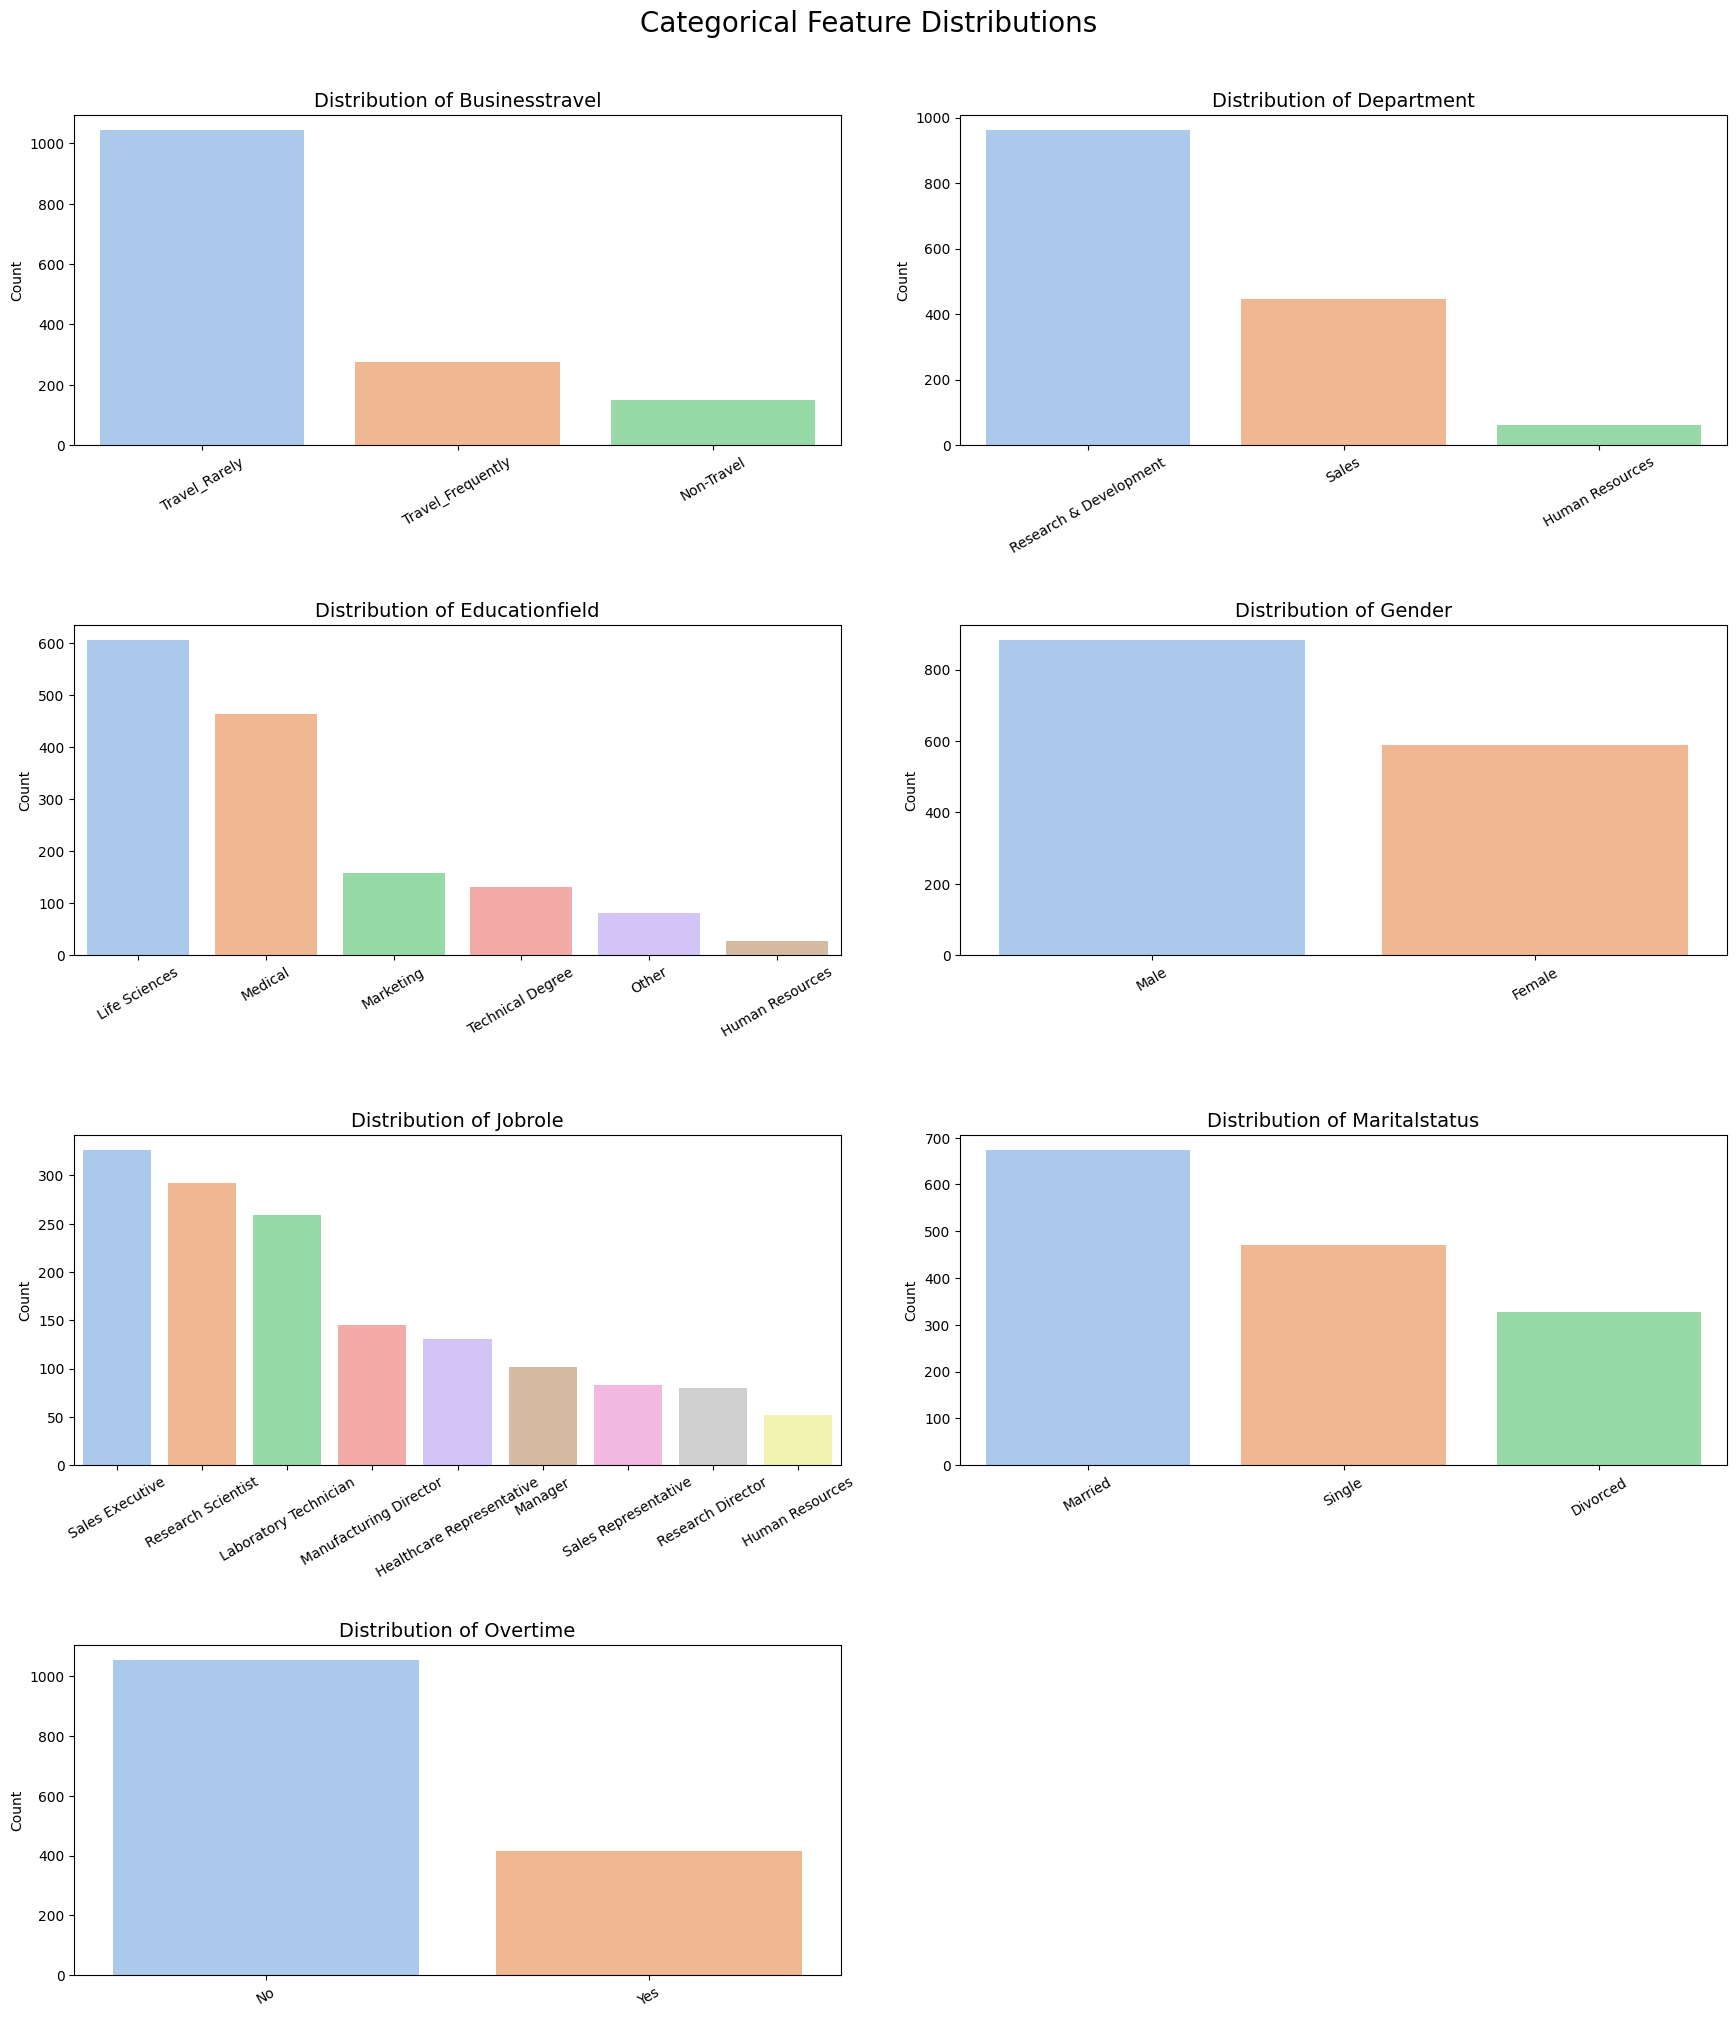

In [ ]:
# Subplots for Key Categorical Features

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
categorical_cols = ['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'overtime']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))  # Bigger figure size
axes = axes.flatten()

# Plot
for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[idx], order=df[col].value_counts().index, palette='pastel')
    axes[idx].set_title(f'Distribution of {col.replace("_", " ").title()}', fontsize=14)
    axes[idx].tick_params(axis='x', rotation=30, labelsize=10)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Count')

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)
plt.suptitle('Categorical Feature Distributions', fontsize=20, y=1.02)
plt.show()



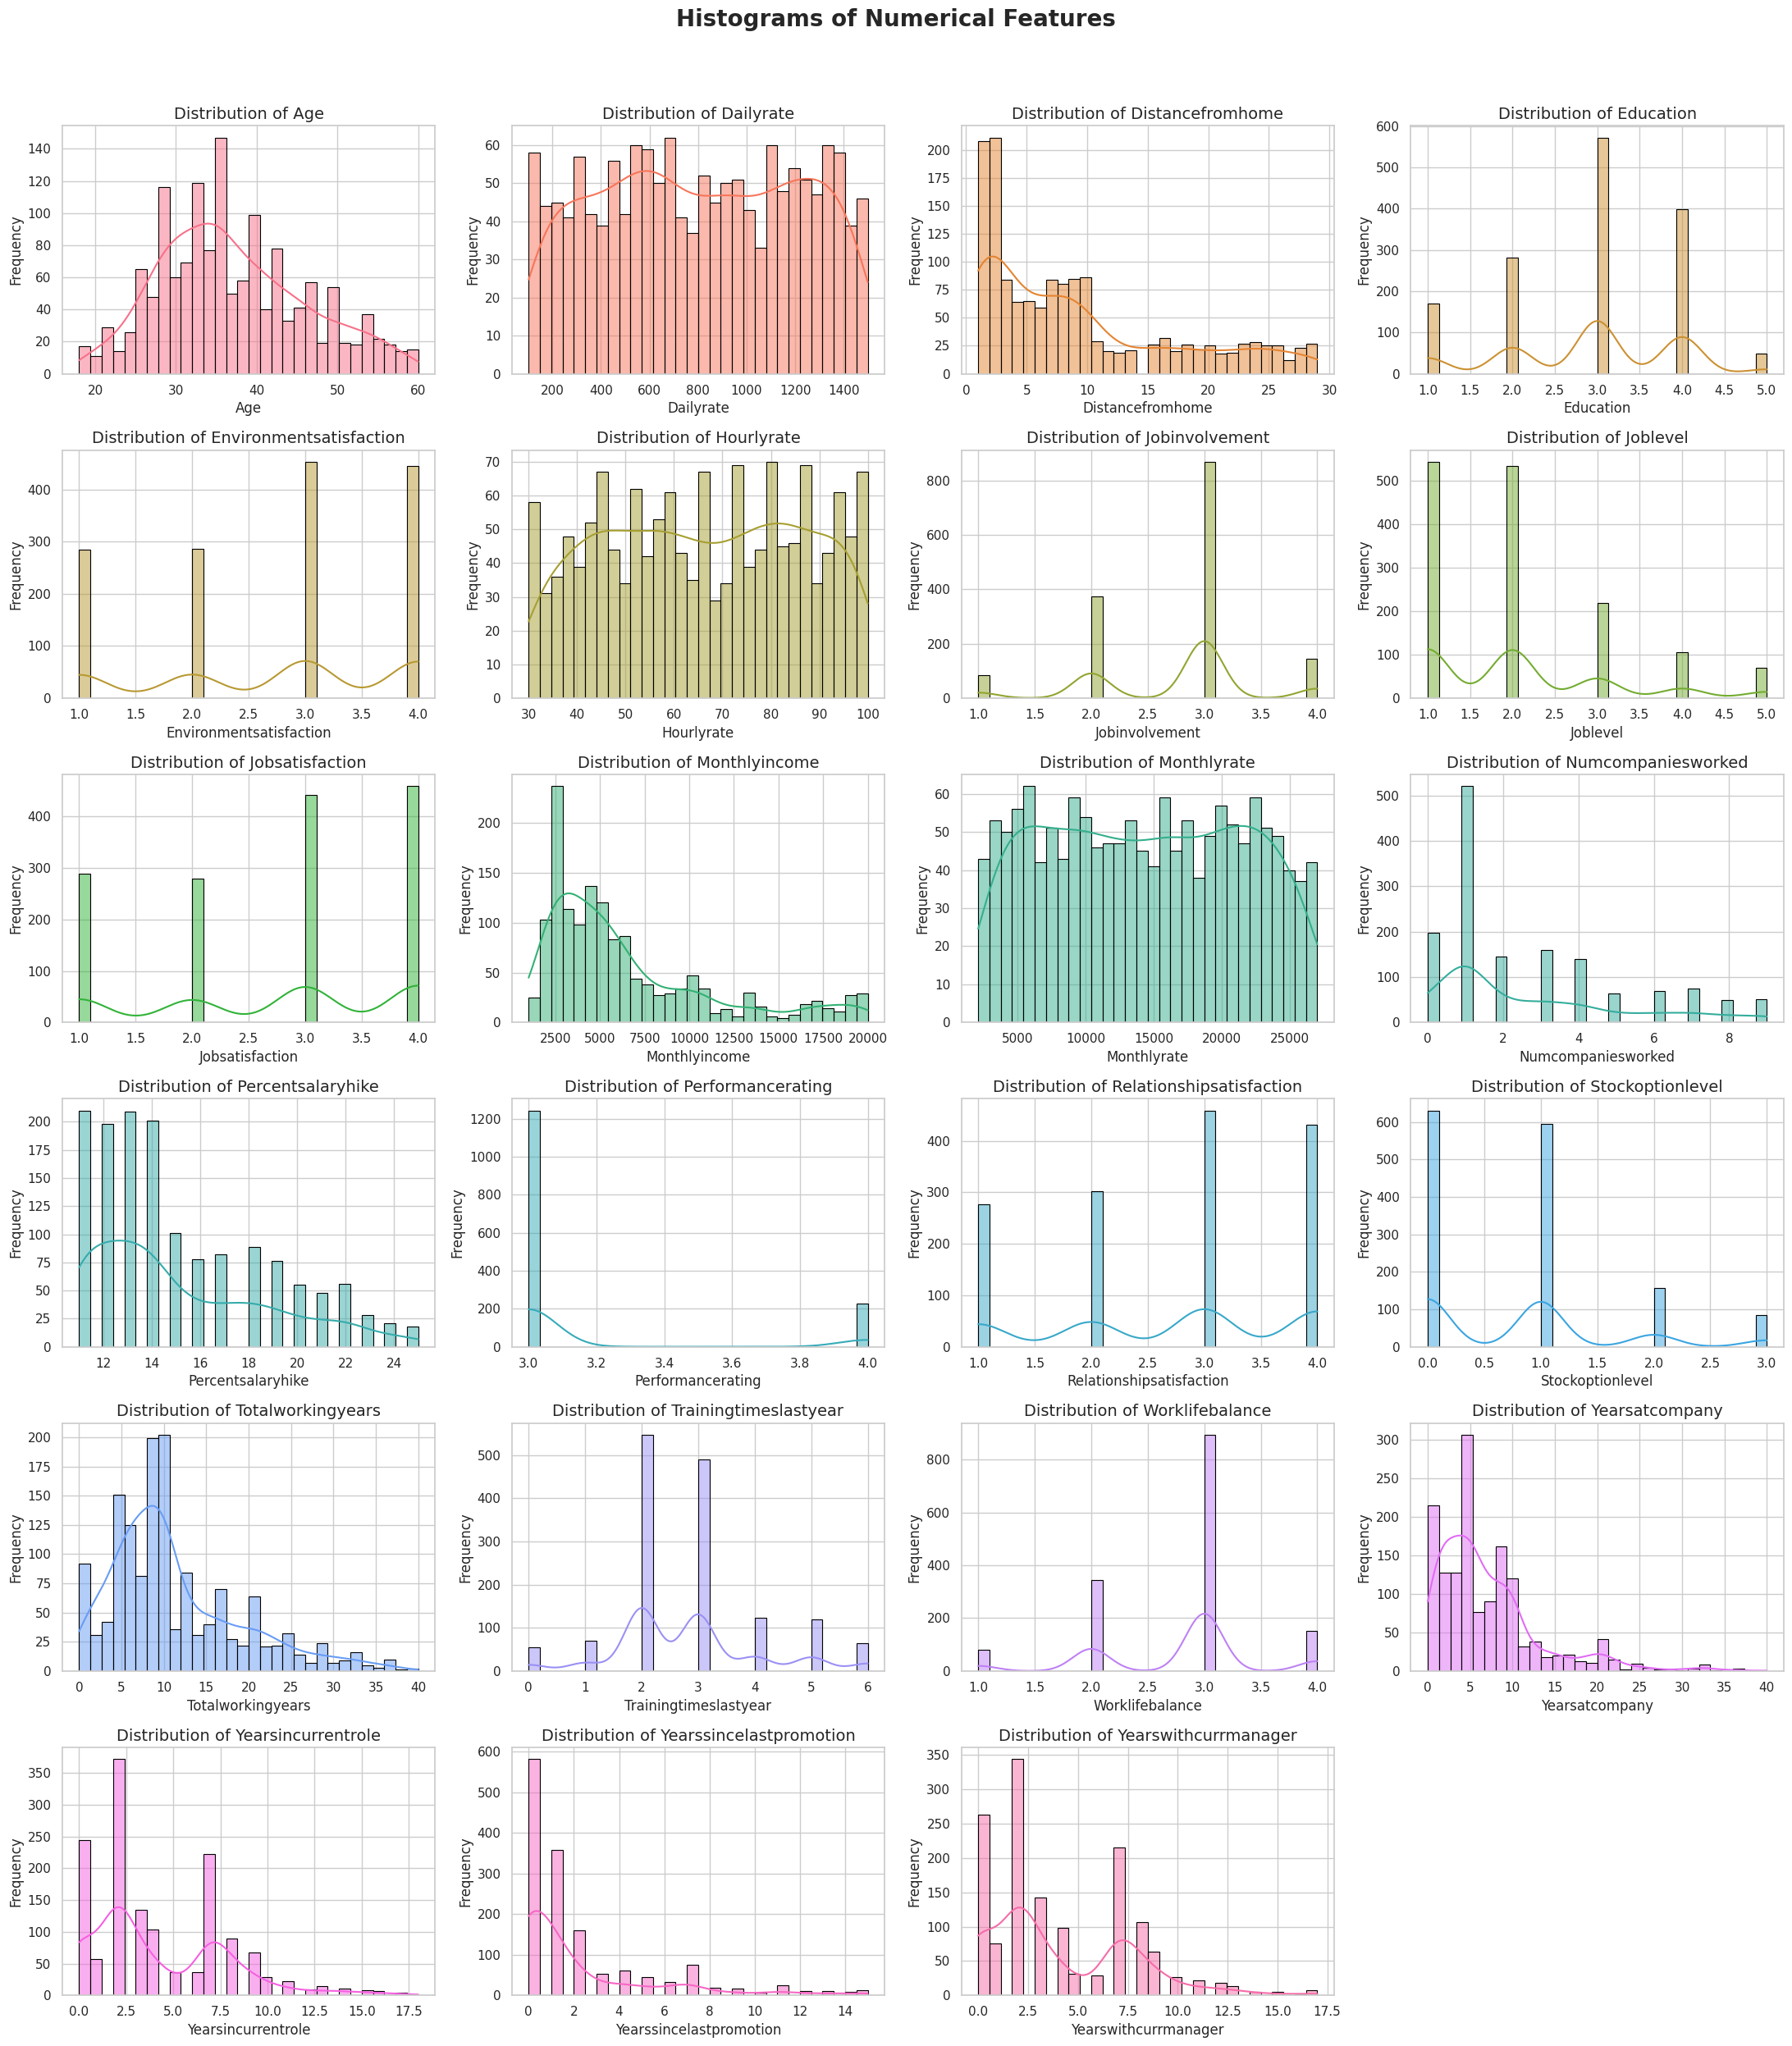

In [ ]:
# Histograms for Numerical Features

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
numerical_features = [
    'age', 'dailyrate', 'distancefromhome', 'education', 'environmentsatisfaction',
    'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome',
    'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'performancerating',
    'relationshipsatisfaction', 'stockoptionlevel', 'totalworkingyears',
    'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
    'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager'
]

palette = sns.color_palette("husl", len(numerical_features))
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(22, 28))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=30, ax=axes[i], kde=True, color=palette[i], edgecolor='black')
    axes[i].set_title(f'Distribution of {feature.replace("_", " ").title()}', fontsize=14)
    axes[i].set_xlabel(feature.replace("_", " ").title(), fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Histograms of Numerical Features", fontsize=20, fontweight='bold', y=0.92)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])

plt.show()


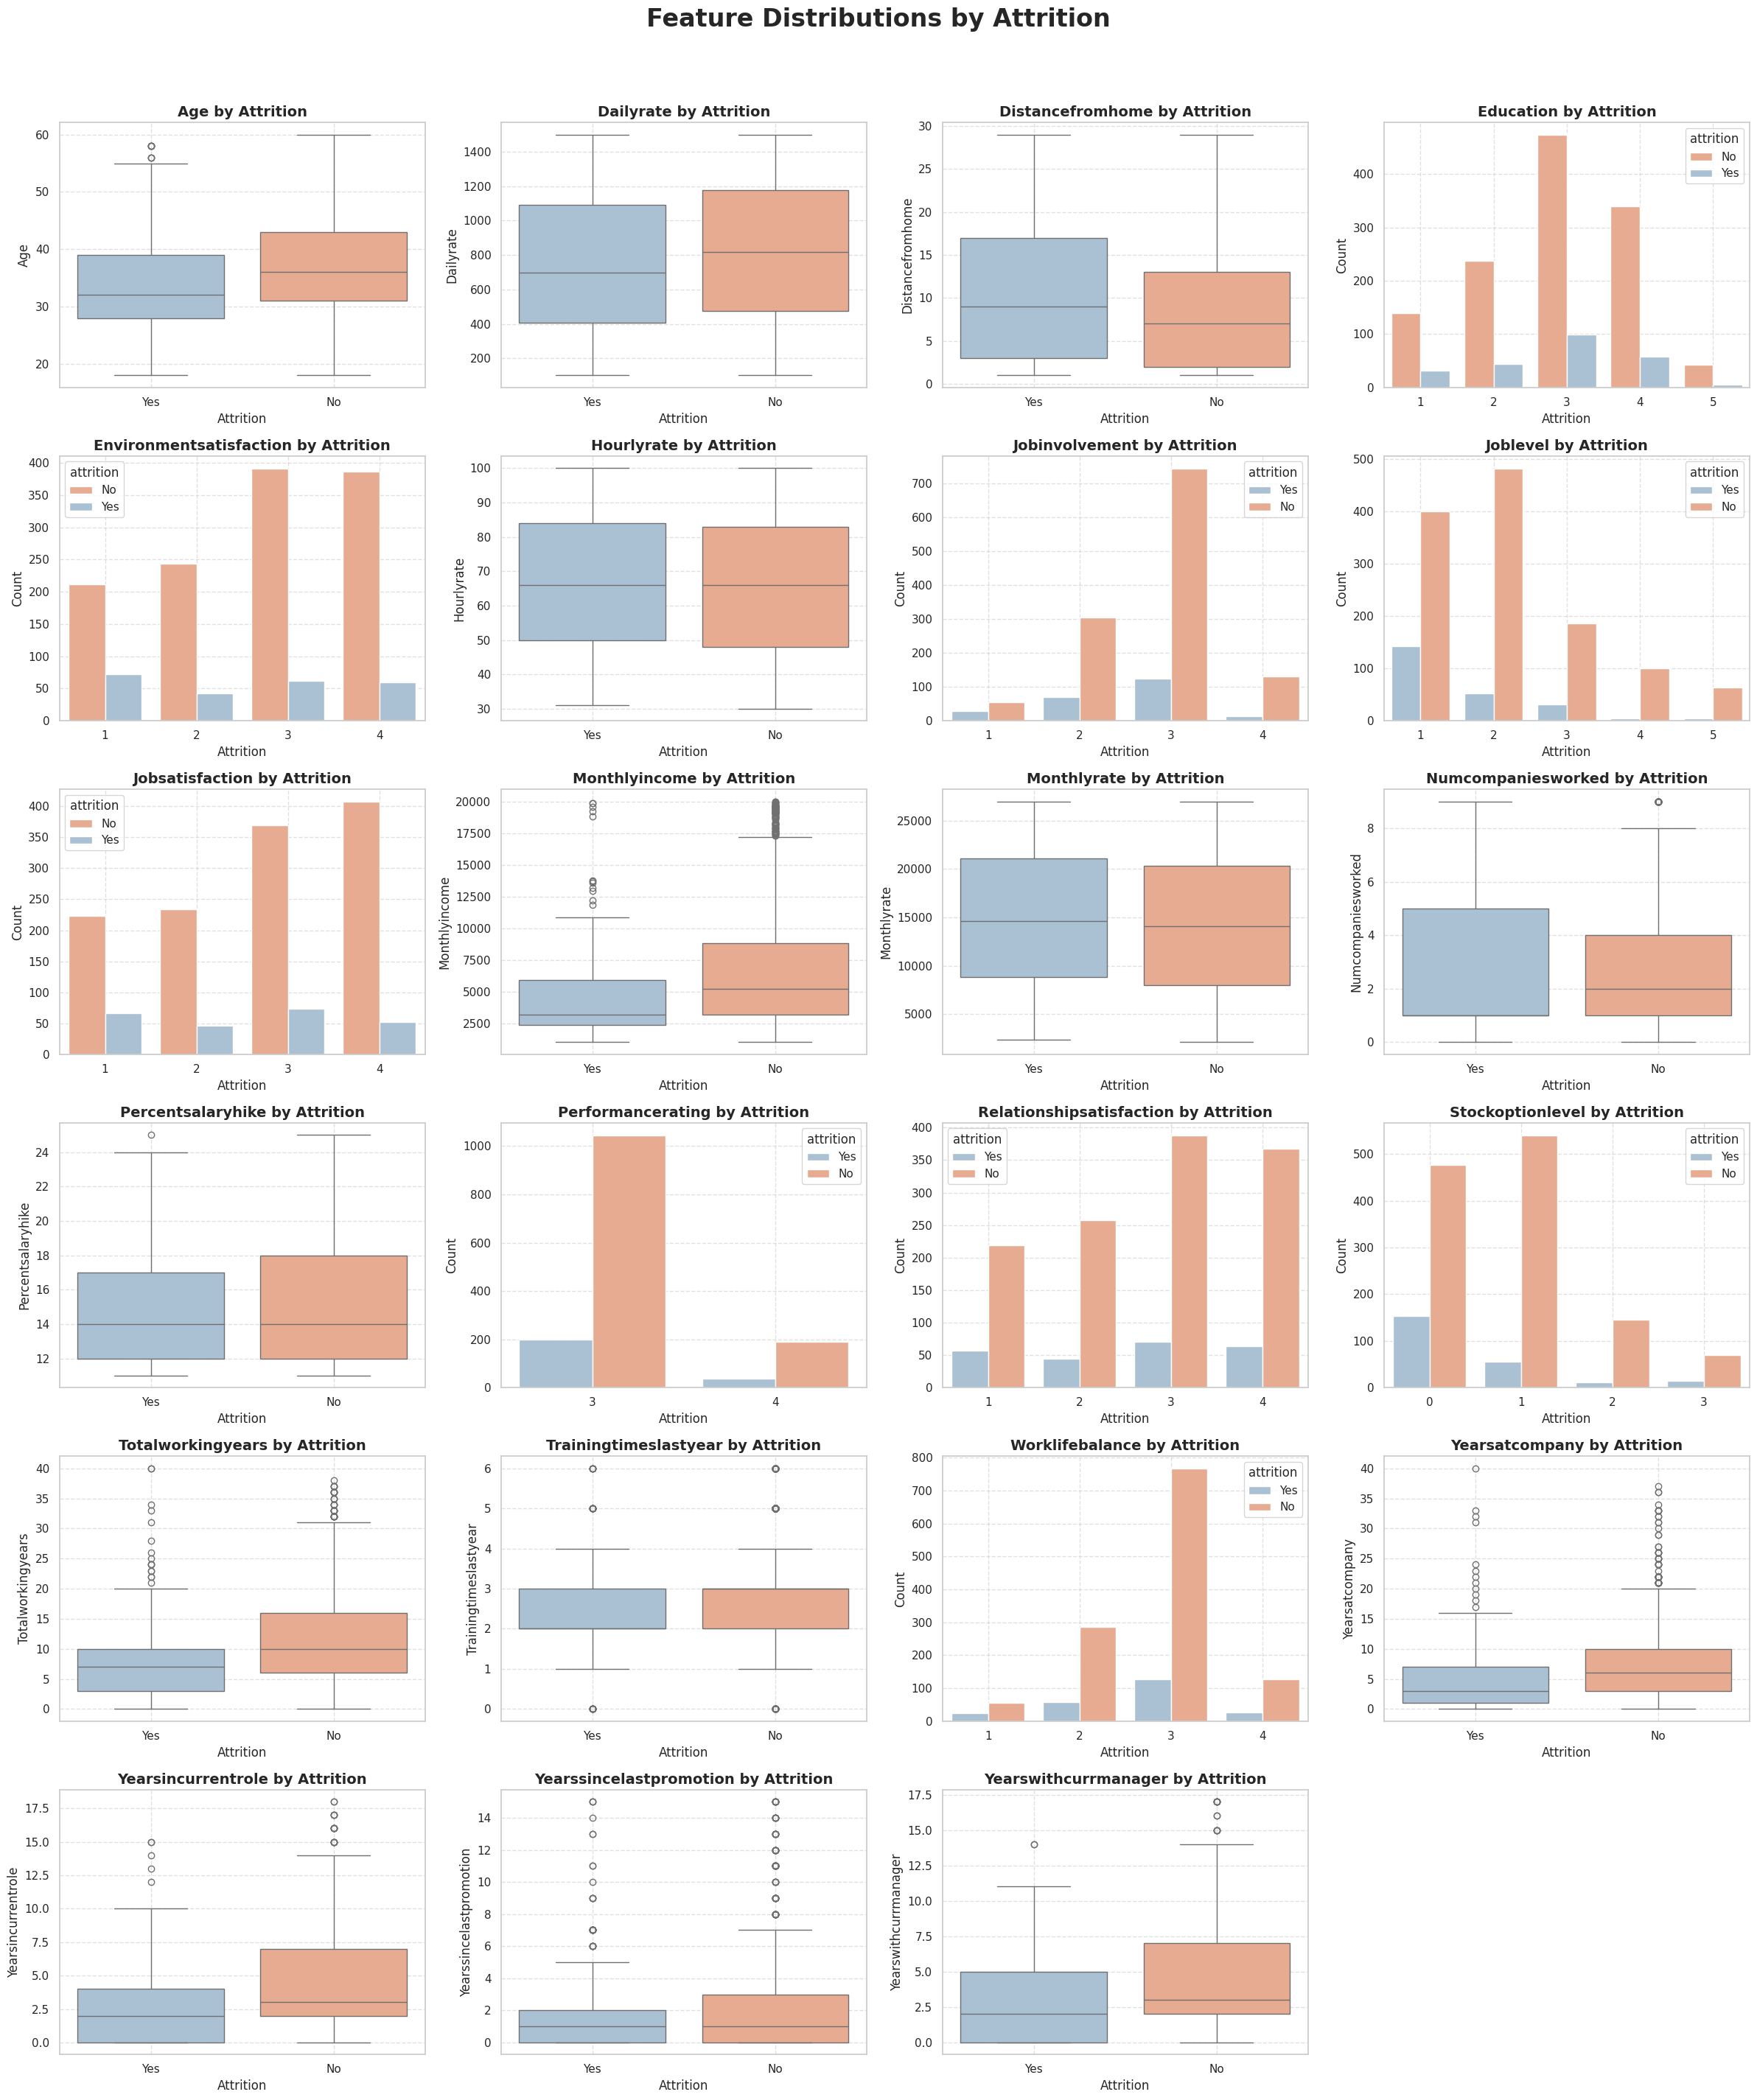

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
numerical_features = [
    'age', 'dailyrate', 'distancefromhome', 'education', 'environmentsatisfaction',
    'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome',
    'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'performancerating',
    'relationshipsatisfaction', 'stockoptionlevel', 'totalworkingyears',
    'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
    'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager'
]

box_colors = {"Yes": "#a3c1da", "No": "#f4a582"}  # 1 = Left, 0 = Stayed
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(24, 32))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    unique_vals = df[feature].nunique()

    if unique_vals <= 5:
        sns.countplot(data=df, x=feature, hue='attrition', ax=axes[i], palette=box_colors)
        axes[i].set_ylabel('Count', fontsize=12)

    elif df[feature].value_counts(normalize=True).values[0] > 0.9:
        sns.stripplot(data=df, x='attrition', y=feature, ax=axes[i], hue='attrition', palette=box_colors, dodge=True, alpha=0.6, legend=False)
        axes[i].set_ylabel(feature.replace('_', ' ').title(), fontsize=12)

    else:
        sns.boxplot(data=df, x='attrition', y=feature, ax=axes[i], hue='attrition', palette=box_colors, legend=False)
        axes[i].set_ylabel(feature.replace('_', ' ').title(), fontsize=12)

    axes[i].set_title(f'{feature.replace("_", " ").title()} by Attrition', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Attrition', fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.6)

for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Feature Distributions by Attrition", fontsize=24, fontweight='bold', y=0.92)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])

plt.show()

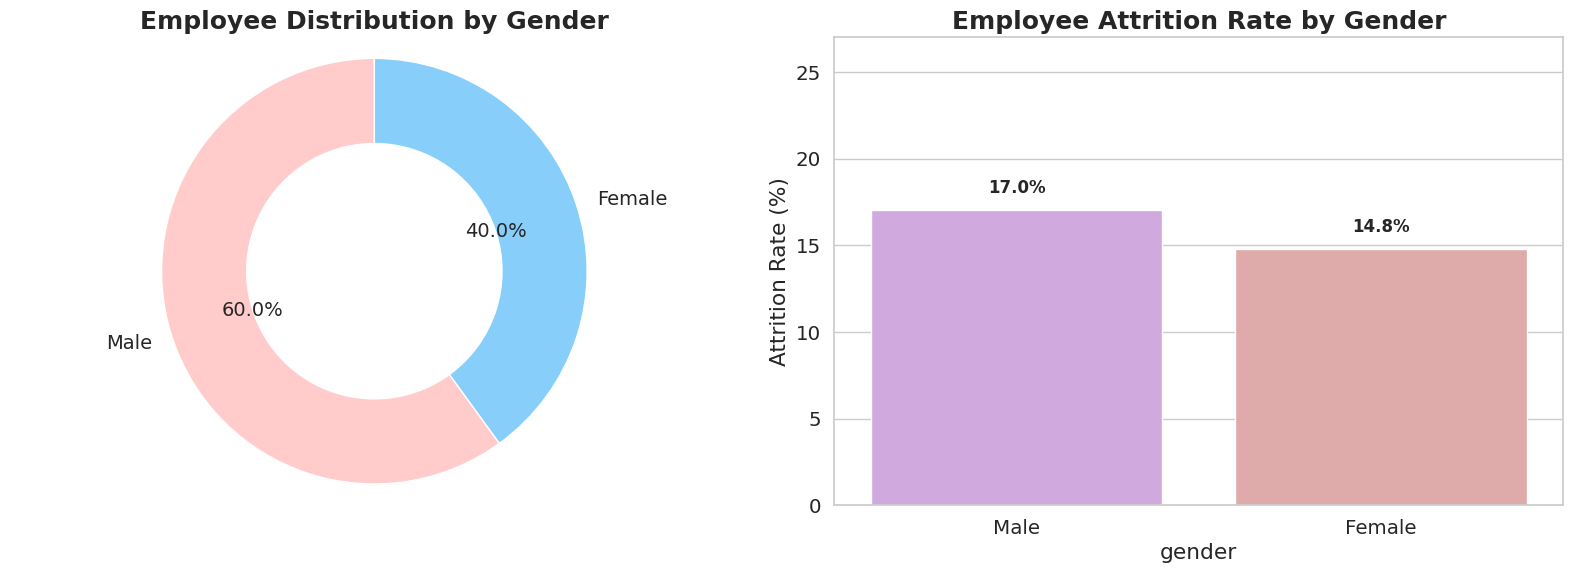

In [ ]:
sns.set(style="whitegrid", font_scale=1.3)
category = 'gender'

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

gender_distribution = df[category].value_counts()
colors = ["#FFCCCB", "#87CEFA"]

wedges, texts, autotexts = axes[0].pie(
    gender_distribution,
    labels=gender_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={"fontsize":14},
    wedgeprops=dict(width=0.4)
)
axes[0].set_title(f"Employee Distribution by {category.title()}", fontsize=18, fontweight='bold')
axes[0].axis('equal')

attrition_yes = df[df['attrition'] == 'Yes'][category].value_counts()
total_by_category = df[category].value_counts()
attrition_rate = (attrition_yes / total_by_category * 100).fillna(0)

sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    palette=["#D4A1E7", "#E7A1A1"],
    ax=axes[1]
)

axes[1].set_title(f"Employee Attrition Rate by {category.title()}", fontsize=18, fontweight='bold')
axes[1].set_ylabel('Attrition Rate (%)')
axes[1].set_ylim(0, attrition_rate.max() + 10)

for index, value in enumerate(attrition_rate.values):
    axes[1].text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


Employee Distribution:

The organization has 60% Male and 40% Female employees, indicating a higher proportion of males in the workforce.

Attrition Rates:

Male attrition rate (17.0%) is slightly higher than Female attrition rate (14.8%), suggesting that males are marginally more likely to leave the organization.

Implication:

Although the difference is not drastic, it highlights a potential opportunity to explore gender-specific retention strategies, particularly focused on male employees.

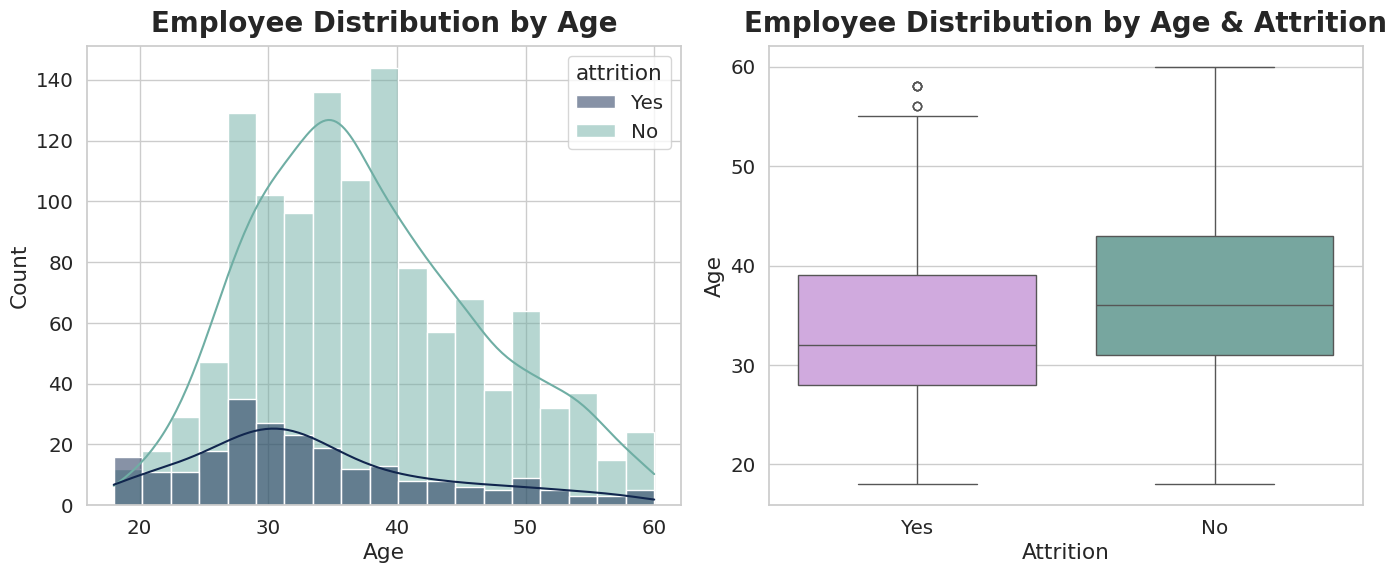

In [ ]:
sns.set(style="whitegrid", font_scale=1.3)
plt.figure(figsize=(14, 6))

# Histogram (Age distribution by Attrition)
plt.subplot(1, 2, 1)
sns.histplot(x='age', hue='attrition', data=df, kde=True, palette=["#11264e", "#6faea4"])
plt.title("Employee Distribution by Age", fontweight="bold", size=20, pad=10)
plt.xlabel('Age')
plt.ylabel('Count')

# Boxplot (Age grouped by Attrition)
plt.subplot(1, 2, 2)
sns.boxplot(x='attrition', y='age', data=df, palette=["#D4A1E7", "#6faea4"])
plt.title("Employee Distribution by Age & Attrition", fontweight="bold", size=20, pad=10)
plt.xlabel('Attrition')
plt.ylabel('Age')

plt.tight_layout()
plt.show()


Younger employees (25–35 years) exhibit a higher attrition rate compared to older employees.

Older employees are more likely to stay, with the median age for non-attrition employees being slightly higher than those who left.

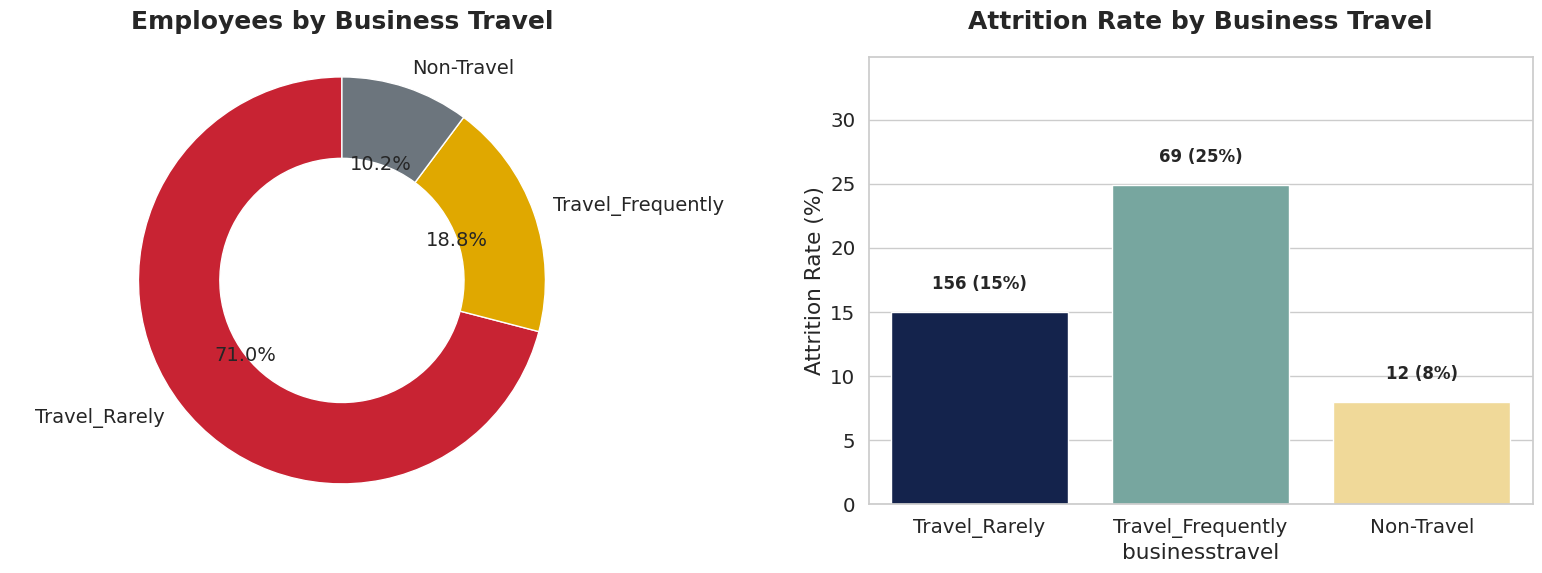

In [ ]:
category = 'businesstravel'
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Donut (Pie) chart for Employee Distribution
travel_distribution = df[category].value_counts()
colors = ["#C82333", "#E0A800", "#6C757D"]

wedges, texts, autotexts = axes[0].pie(
    travel_distribution,
    labels=travel_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 14},
    wedgeprops=dict(width=0.4)
)
axes[0].set_title(f"Employees by Business Travel", fontsize=18, fontweight='bold', pad=20)
axes[0].axis('equal')

# Bar plot for Attrition Rate
attrition_yes = df[df['attrition'] == 'Yes'][category].value_counts()
total_by_category = df[category].value_counts()
attrition_rate = (attrition_yes / total_by_category * 100).fillna(0)

sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    palette=["#0B1F55", "#6FAEA4", "#FFE08A"],
    ax=axes[1]
)

axes[1].set_title(f"Attrition Rate by Business Travel", fontsize=18, fontweight='bold', pad=20)
axes[1].set_ylabel('Attrition Rate (%)')
axes[1].set_ylim(0, attrition_rate.max() + 10)

for index, value in enumerate(attrition_rate.values):
    count = int(attrition_yes.get(attrition_rate.index[index], 0))
    axes[1].text(
        index, value + 1.5,
        f"{count} ({value:.0f}%)",
        ha='center', va='bottom',
        fontsize=12, fontweight='bold'
    )

plt.tight_layout()
plt.show()

Employee Distribution:

71% of employees travel rarely, while only 10% do not travel at all.

Attrition Rates:

Employees who travel frequently have the highest attrition rate (25%), indicating that frequent business travel may be a significant factor contributing to employee turnover.



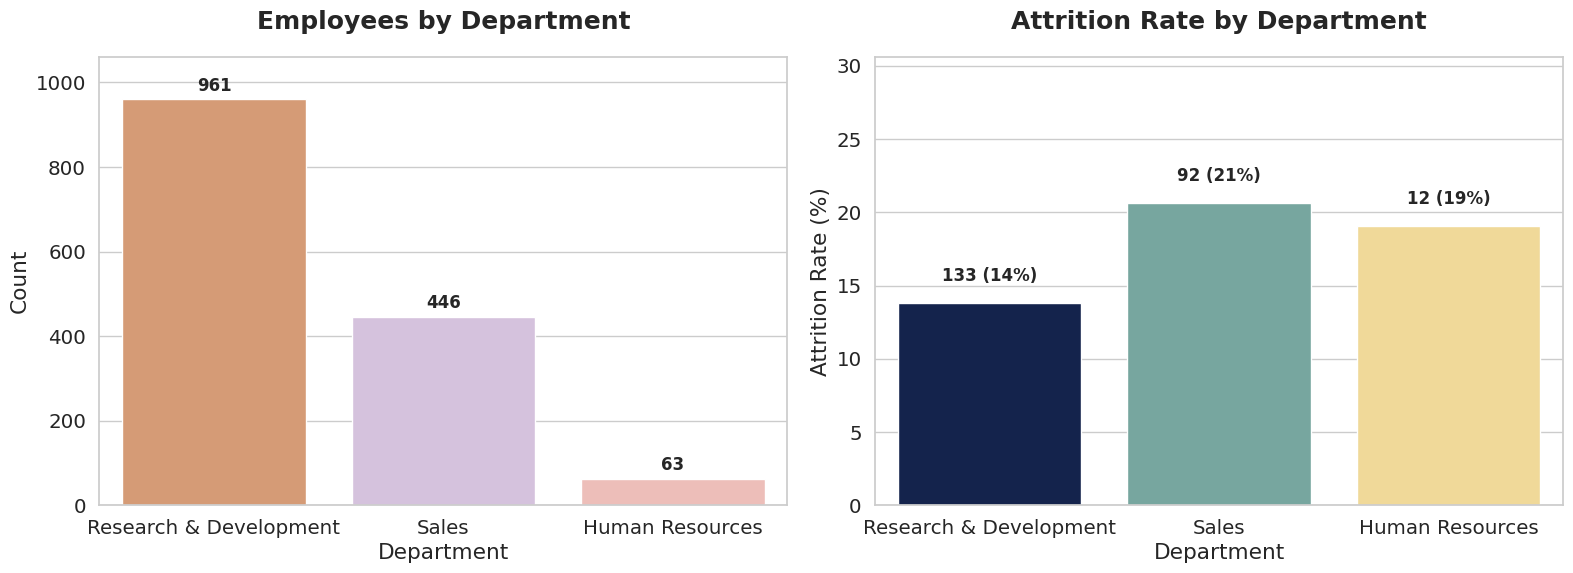

In [ ]:
category = 'department'
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot: Employees by Department
dept_distribution = df[category].value_counts()
palette1 = ["#E59866", "#D7BDE2", "#F5B7B1"]

sns.barplot(x=dept_distribution.index, y=dept_distribution.values, palette=palette1, ax=axes[0])

axes[0].set_title(f"Employees by Department", fontsize=18, fontweight='bold', pad=20)
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Count')
axes[0].set_ylim(0, dept_distribution.max() + 100)

for index, value in enumerate(dept_distribution.values):
    axes[0].text(index, value + 20, f"{value}", ha='center', fontsize=12, fontweight='bold')

# Barplot: Attrition Rate by Department
attrition_yes = df[df['attrition'] == 'Yes'][category].value_counts()
total_by_category = df[category].value_counts()
attrition_rate = (attrition_yes / total_by_category * 100).fillna(0)

palette2 = ["#0B1F55", "#6FAEA4", "#FFE08A"]

sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette=palette2, ax=axes[1])

axes[1].set_title(f"Attrition Rate by Department", fontsize=18, fontweight='bold', pad=20)
axes[1].set_xlabel('Department')
axes[1].set_ylabel('Attrition Rate (%)')
axes[1].set_ylim(0, attrition_rate.max() + 10)

for index, value in enumerate(attrition_rate.values):
    count = int(attrition_yes.get(attrition_rate.index[index], 0))
    axes[1].text(
        index, value + 1.5,
        f"{count} ({value:.0f}%)",
        ha='center', fontsize=12, fontweight='bold'
    )

plt.tight_layout()
plt.show()

Employee Distribution:

The majority of employees (~66%) work in Research & Development, followed by Sales and then Human Resources.

Attrition Rates:

Sales department employees have the highest attrition rate (21%), followed by Human Resources (19%), whereas Research & Development employees have the lowest attrition rate (14%).

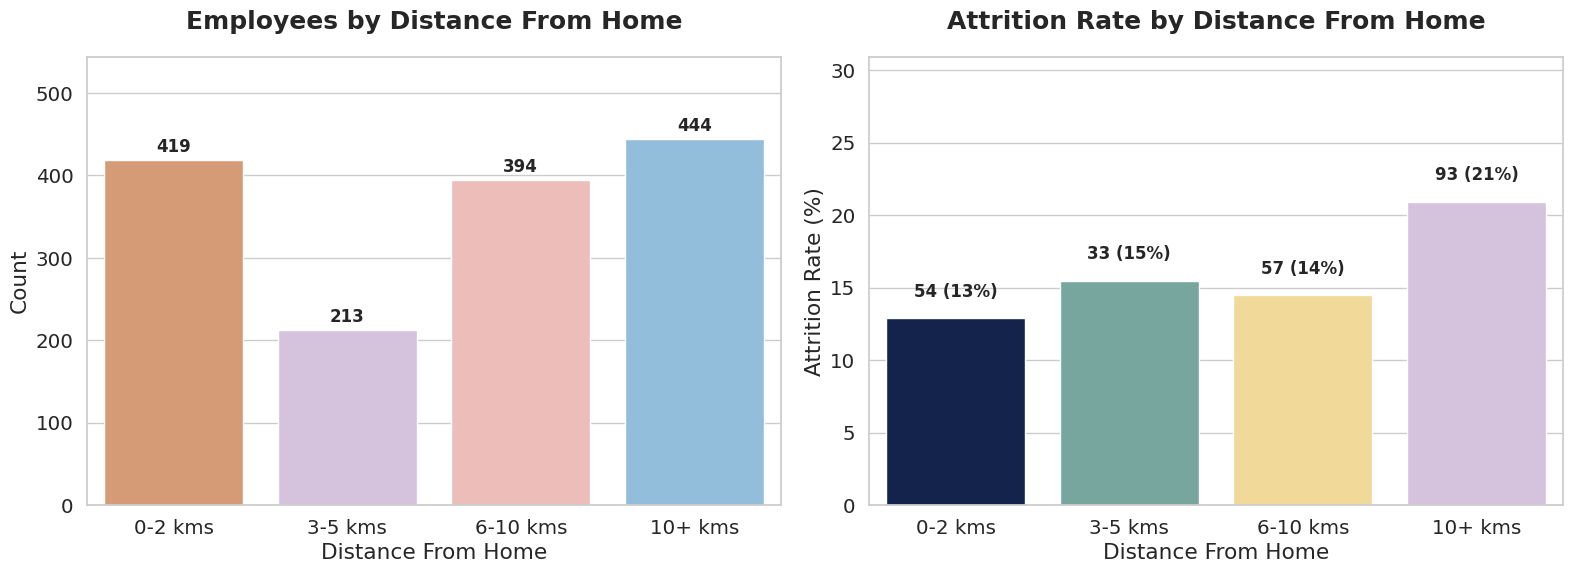

In [ ]:
df['distance_bucket'] = pd.cut(df['distancefromhome'],
                               bins=[-1, 2, 5, 10, 100],
                               labels=['0-2 kms', '3-5 kms', '6-10 kms', '10+ kms'])
category = 'distance_bucket'
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot: Employees by Distance From Home
distance_distribution = df[category].value_counts().reindex(['0-2 kms', '3-5 kms', '6-10 kms', '10+ kms'])
palette1 = ["#E59866", "#D7BDE2", "#F5B7B1", "#85C1E9"]

sns.barplot(
    x=distance_distribution.index,
    y=distance_distribution.values,
    palette=palette1,
    ax=axes[0]
)

axes[0].set_title("Employees by Distance From Home", fontsize=18, fontweight='bold', pad=20)
axes[0].set_xlabel('Distance From Home')
axes[0].set_ylabel('Count')
axes[0].set_ylim(0, distance_distribution.max() + 100)

for index, value in enumerate(distance_distribution.values):
    axes[0].text(index, value + 10, f"{value}", ha='center', fontsize=12, fontweight='bold')

# Barplot: Attrition Rate by Distance From Home
attrition_yes = df[df['attrition'] == 'Yes'][category].value_counts().reindex(['0-2 kms', '3-5 kms', '6-10 kms', '10+ kms'])
total_by_category = df[category].value_counts().reindex(['0-2 kms', '3-5 kms', '6-10 kms', '10+ kms'])
attrition_rate = (attrition_yes / total_by_category * 100).fillna(0)

palette2 = ["#0B1F55", "#6FAEA4", "#FFE08A", "#D7BDE2"]

sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    palette=palette2,
    ax=axes[1]
)

axes[1].set_title("Attrition Rate by Distance From Home", fontsize=18, fontweight='bold', pad=20)
axes[1].set_xlabel('Distance From Home')
axes[1].set_ylabel('Attrition Rate (%)')
axes[1].set_ylim(0, attrition_rate.max() + 10)

for index, value in enumerate(attrition_rate.values):
    count = int(attrition_yes.get(attrition_rate.index[index], 0))
    axes[1].text(index, value + 1.5, f"{count} ({value:.0f}%)", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Employee Distribution:

Most employees live either within 0–2 kms or beyond 10 kms from the office.

Attrition Rates:

Employees living more than 10 kms away have the highest attrition rate (21%), suggesting that a longer commute may contribute to higher employee turnover.

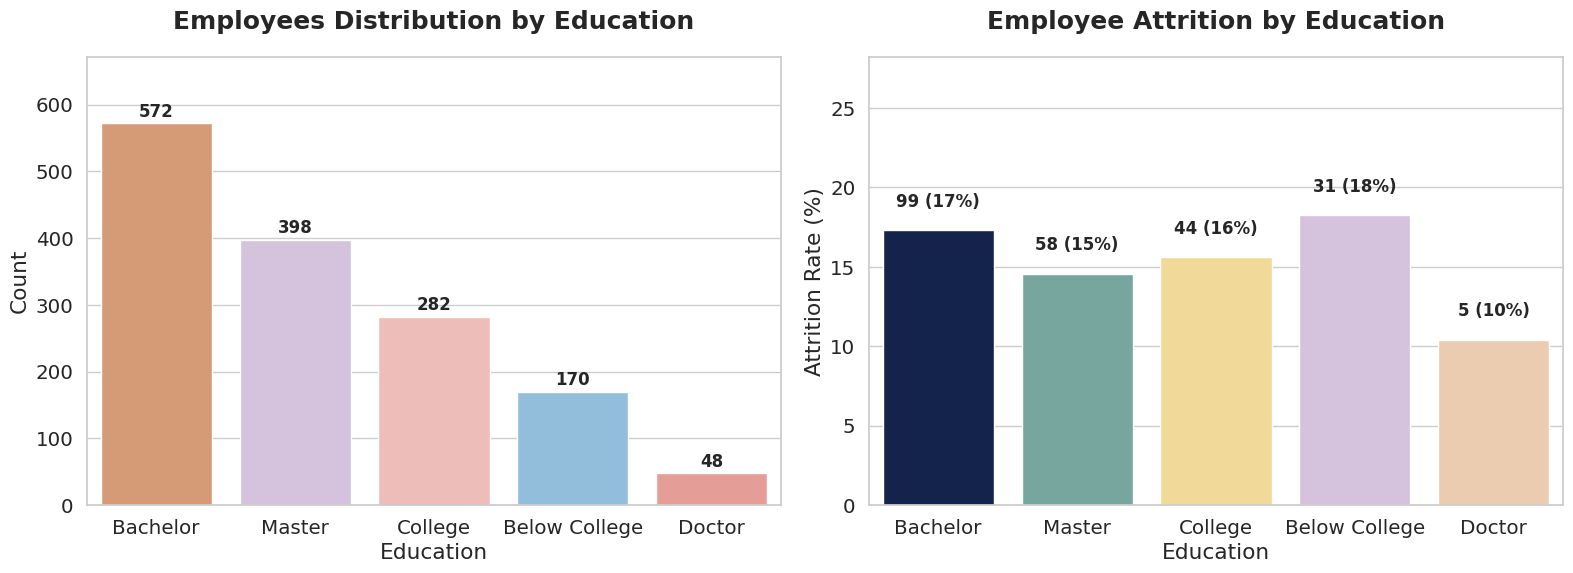

In [ ]:
# Map numeric education levels to labels
education_mapping = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
df['education_level'] = df['education'].map(education_mapping)
category = 'education_level'

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot: Employees Distribution by Education
education_distribution = df[category].value_counts().reindex(['Bachelor', 'Master', 'College', 'Below College', 'Doctor'])
palette1 = ["#E59866", "#D7BDE2", "#F5B7B1", "#85C1E9", "#F1948A"]

sns.barplot(
    x=education_distribution.index,
    y=education_distribution.values,
    palette=palette1,
    ax=axes[0]
)

axes[0].set_title("Employees Distribution by Education", fontsize=18, fontweight='bold', pad=20)
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Count')
axes[0].set_ylim(0, education_distribution.max() + 100)

for index, value in enumerate(education_distribution.values):
    axes[0].text(index, value + 10, f"{value}", ha='center', fontsize=12, fontweight='bold')

# Barplot: Employee Attrition by Education
attrition_yes = df[df['attrition'] == 'Yes'][category].value_counts().reindex(['Bachelor', 'Master', 'College', 'Below College', 'Doctor'])
total_by_category = df[category].value_counts().reindex(['Bachelor', 'Master', 'College', 'Below College', 'Doctor'])
attrition_rate = (attrition_yes / total_by_category * 100).fillna(0)

palette2 = ["#0B1F55", "#6FAEA4", "#FFE08A", "#D7BDE2", "#F5CBA7"]

sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    palette=palette2,
    ax=axes[1]
)

axes[1].set_title("Employee Attrition by Education", fontsize=18, fontweight='bold', pad=20)
axes[1].set_xlabel('Education')
axes[1].set_ylabel('Attrition Rate (%)')
axes[1].set_ylim(0, attrition_rate.max() + 10)

for index, value in enumerate(attrition_rate.values):
    count = int(attrition_yes.get(attrition_rate.index[index], 0))
    axes[1].text(index, value + 1.5, f"{count} ({value:.0f}%)", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Employee Distribution:

Most employees hold a Bachelor’s or Master’s degree, with a smaller proportion having Doctorate or Below College education.

Attrition Rates:

Employees with Below College education show the highest attrition rate (18%), while those with a Doctorate degree have the lowest attrition rate (10%).

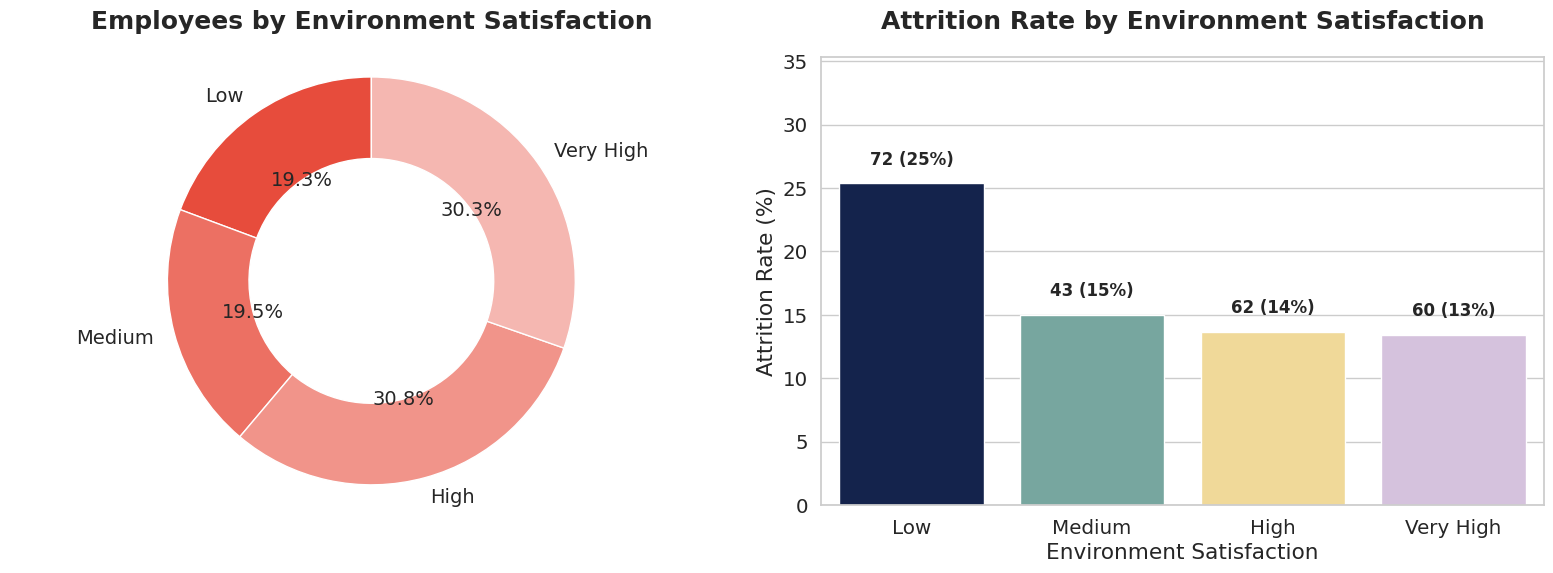

In [ ]:
# Map environment satisfaction numeric values to labels
env_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df['environment_satisfaction_level'] = df['environmentsatisfaction'].map(env_mapping)

category = 'environment_satisfaction_level'
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Donut Chart: Employees by Environment Satisfaction
env_distribution = df[category].value_counts().reindex(['Low', 'Medium', 'High', 'Very High'])
colors = ["#E74C3C", "#EC7063", "#F1948A", "#F5B7B1"]

wedges, texts, autotexts = axes[0].pie(
    env_distribution,
    labels=env_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 14},
    wedgeprops=dict(width=0.4)
)
axes[0].set_title("Employees by Environment Satisfaction", fontsize=18, fontweight='bold', pad=20)
axes[0].axis('equal')

# Barplot: Attrition Rate by Environment Satisfaction
attrition_yes = df[df['attrition'] == 'Yes'][category].value_counts().reindex(['Low', 'Medium', 'High', 'Very High'])
total_by_category = df[category].value_counts().reindex(['Low', 'Medium', 'High', 'Very High'])
attrition_rate = (attrition_yes / total_by_category * 100).fillna(0)

palette2 = ["#0B1F55", "#6FAEA4", "#FFE08A", "#D7BDE2"]

sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    palette=palette2,
    ax=axes[1]
)

axes[1].set_title("Attrition Rate by Environment Satisfaction", fontsize=18, fontweight='bold', pad=20)
axes[1].set_xlabel('Environment Satisfaction')
axes[1].set_ylabel('Attrition Rate (%)')
axes[1].set_ylim(0, attrition_rate.max() + 10)

for index, value in enumerate(attrition_rate.values):
    count = int(attrition_yes.get(attrition_rate.index[index], 0))
    axes[1].text(
        index, value + 1.5,
        f"{count} ({value:.0f}%)",
        ha='center', fontsize=12, fontweight='bold'
    )

plt.tight_layout()
plt.show()

Employee Distribution:

Most employees reported either High or Very High levels of environment satisfaction, each representing around 30% of the workforce.

Attrition Rates:

Employees with Low environment satisfaction show the highest attrition rate (25%), while those with High and Very High satisfaction have much lower attrition rates (~13–14%).

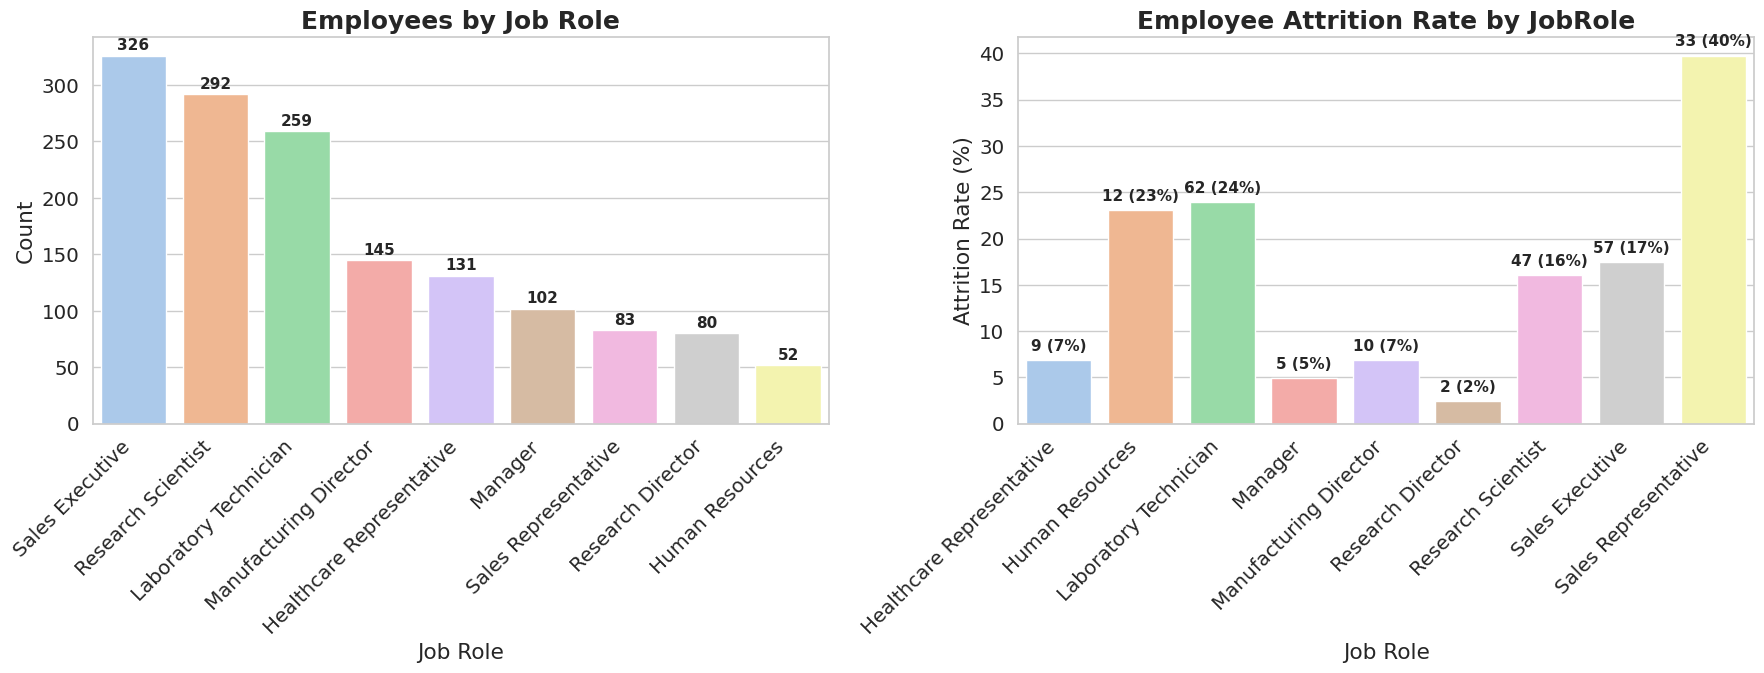

In [ ]:
category = 'jobrole'

plt.figure(figsize=(18, 7))

# Barplot: Employees by Job Role
plt.subplot(1, 2, 1)
job_distribution = df[category].value_counts()
palette1 = sns.color_palette("pastel")

sns.barplot(x=job_distribution.index, y=job_distribution.values, palette=palette1)
plt.title("Employees by Job Role", fontsize=18, fontweight='bold')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(job_distribution.values):
    plt.text(index, value + 5, f"{value}", ha='center', fontsize=11, fontweight='bold')

# Barplot: Employee Attrition Rate by Job Role
plt.subplot(1, 2, 2)
attrition_yes = df[df['attrition'] == 'Yes'][category].value_counts()
total_by_category = df[category].value_counts()
attrition_rate = (attrition_yes / total_by_category * 100).fillna(0)

palette2 = sns.color_palette("pastel")

sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette=palette2)
plt.title("Employee Attrition Rate by JobRole", fontsize=18, fontweight='bold')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(attrition_rate.values):
    count = int(attrition_yes.get(attrition_rate.index[index], 0))
    plt.text(index, value + 1, f"{count} ({value:.0f}%)", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


Employee Distribution:

Most employees are Sales Executives and Research Scientists, while roles like Human Resources and Research Director have the fewest employees.

Attrition Rates:

Sales Representatives show the highest attrition rate (40%), while Research Directors and Manufacturing Directors have the lowest attrition rates (2–7%).

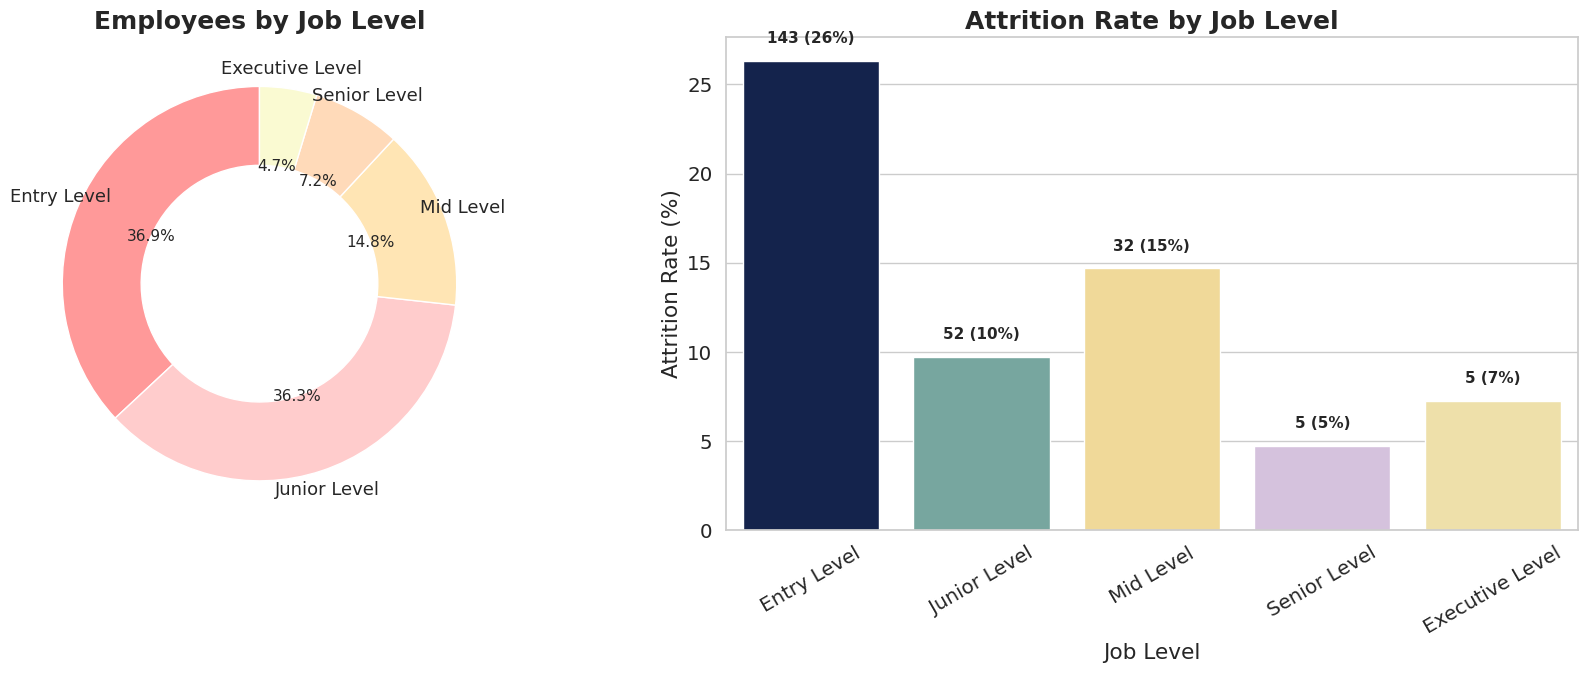

In [ ]:
# Map numeric job levels to readable labels
job_level_mapping = {
    1: 'Entry Level',
    2: 'Junior Level',
    3: 'Mid Level',
    4: 'Senior Level',
    5: 'Executive Level'
}
df['job_level_category'] = df['joblevel'].map(job_level_mapping)

category = 'job_level_category'

plt.figure(figsize=(18, 7))

# Donut Chart: Employees by Job Level
plt.subplot(1, 2, 1)
job_level_distribution = df[category].value_counts().reindex(['Entry Level', 'Junior Level', 'Mid Level', 'Senior Level', 'Executive Level'])
colors = ["#FF9999", "#FFCCCC", "#FFE5B4", "#FFDAB9", "#FAFAD2"]

wedges, texts, autotexts = plt.pie(
    job_level_distribution,
    labels=job_level_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 13},
    wedgeprops=dict(width=0.4)
)
plt.title("Employees by Job Level", fontsize=18, fontweight='bold')

for text in texts:
    text.set_fontsize(13)
    text.set_ha('center')
    text.set_va('center')
for autotext in autotexts:
    autotext.set_fontsize(11)

# Barplot: Attrition Rate by Job Level
plt.subplot(1, 2, 2)
attrition_yes = df[df['attrition'] == 'Yes'][category].value_counts().reindex(['Entry Level', 'Junior Level', 'Mid Level', 'Senior Level', 'Executive Level'])
total_by_category = df[category].value_counts().reindex(['Entry Level', 'Junior Level', 'Mid Level', 'Senior Level', 'Executive Level'])
attrition_rate = (attrition_yes / total_by_category * 100).fillna(0)

palette2 = ["#0B1F55", "#6FAEA4", "#FFE08A", "#D7BDE2", "#F9E79F"]

sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette=palette2)
plt.title("Attrition Rate by Job Level", fontsize=18, fontweight='bold')
plt.xlabel('Job Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=30, ha='center')

for index, value in enumerate(attrition_rate.values):
    count = int(attrition_yes.get(attrition_rate.index[index], 0))
    plt.text(index, value + 1, f"{count} ({value:.0f}%)", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


Employee Distribution:

Most employees are concentrated at the Entry Level and Junior Level, each representing about 36% of the workforce.

Attrition Rates:

Entry Level employees show the highest attrition rate (26%), while Senior and Executive Level employees have much lower attrition rates (5–7%).

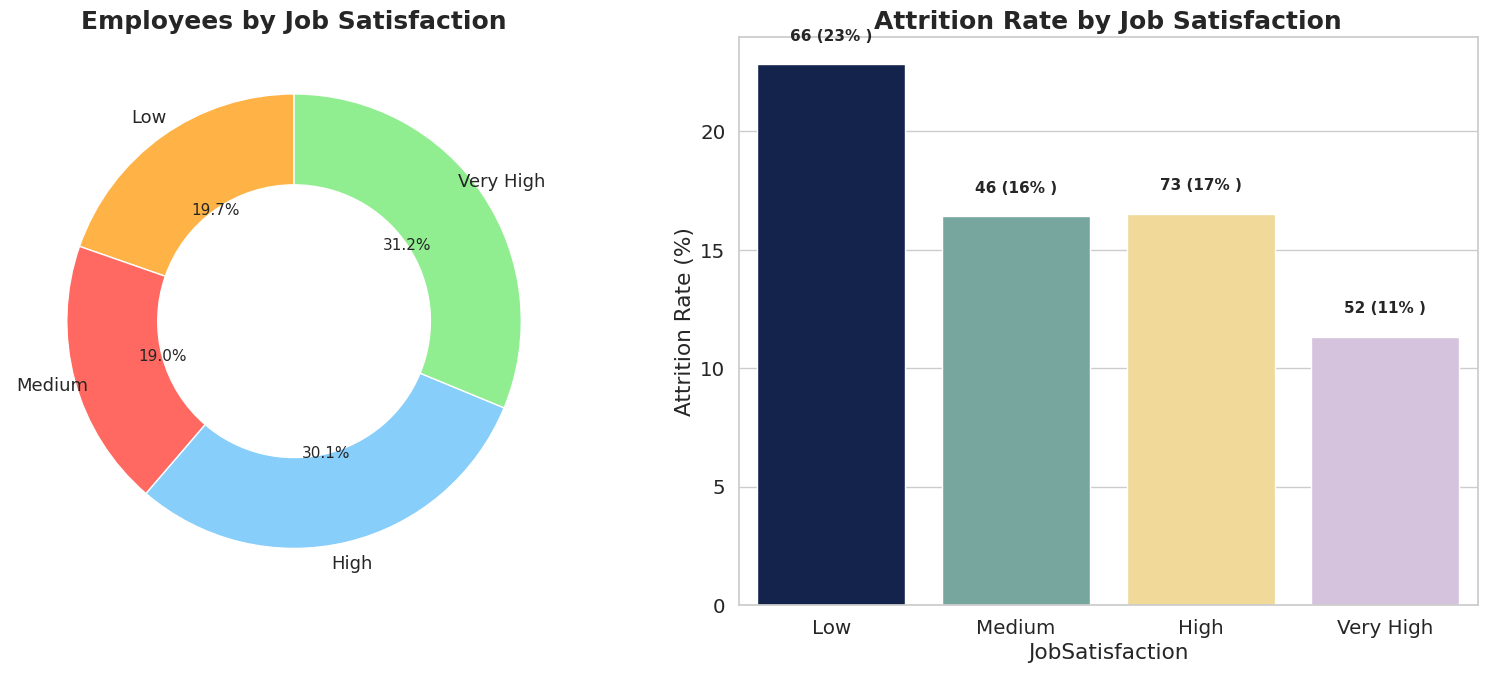

In [ ]:
# Map job satisfaction levels
job_satisfaction_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df['job_satisfaction_level'] = df['jobsatisfaction'].map(job_satisfaction_mapping)

category = 'job_satisfaction_level'

plt.figure(figsize=(16, 7))

# Donut Chart: Employees by Job Satisfaction
plt.subplot(1, 2, 1)
job_satisfaction_distribution = df[category].value_counts().reindex(['Low', 'Medium', 'High', 'Very High'])
colors = ["#FFB347", "#FF6961", "#87CEFA", "#90EE90"]

wedges, texts, autotexts = plt.pie(
    job_satisfaction_distribution,
    labels=job_satisfaction_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 13},
    wedgeprops=dict(width=0.4)
)
plt.title("Employees by Job Satisfaction", fontsize=18, fontweight='bold')

for text in texts:
    text.set_fontsize(13)
    text.set_ha('center')
    text.set_va('center')
for autotext in autotexts:
    autotext.set_fontsize(11)

# Barplot: Attrition Rate by Job Satisfaction
plt.subplot(1, 2, 2)
attrition_yes = df[df['attrition'] == 'Yes'][category].value_counts().reindex(['Low', 'Medium', 'High', 'Very High'])
total_by_category = df[category].value_counts().reindex(['Low', 'Medium', 'High', 'Very High'])
attrition_rate = (attrition_yes / total_by_category * 100).fillna(0)

palette2 = ["#0B1F55", "#6FAEA4", "#FFE08A", "#D7BDE2"]

sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette=palette2)
plt.title("Attrition Rate by Job Satisfaction", fontsize=18, fontweight='bold')
plt.xlabel('JobSatisfaction')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)

for index, value in enumerate(attrition_rate.values):
    count = int(attrition_yes.get(attrition_rate.index[index], 0))
    plt.text(index, value + 1, f"{count} ({value:.0f}% )", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


Employee Distribution:

Employees are fairly evenly distributed across satisfaction levels, with slightly more employees reporting Very High and High job satisfaction (~30% each).

Attrition Rates:

Employees with Low job satisfaction experience the highest attrition rate (23%), while those with Very High satisfaction have the lowest attrition rate (11%).

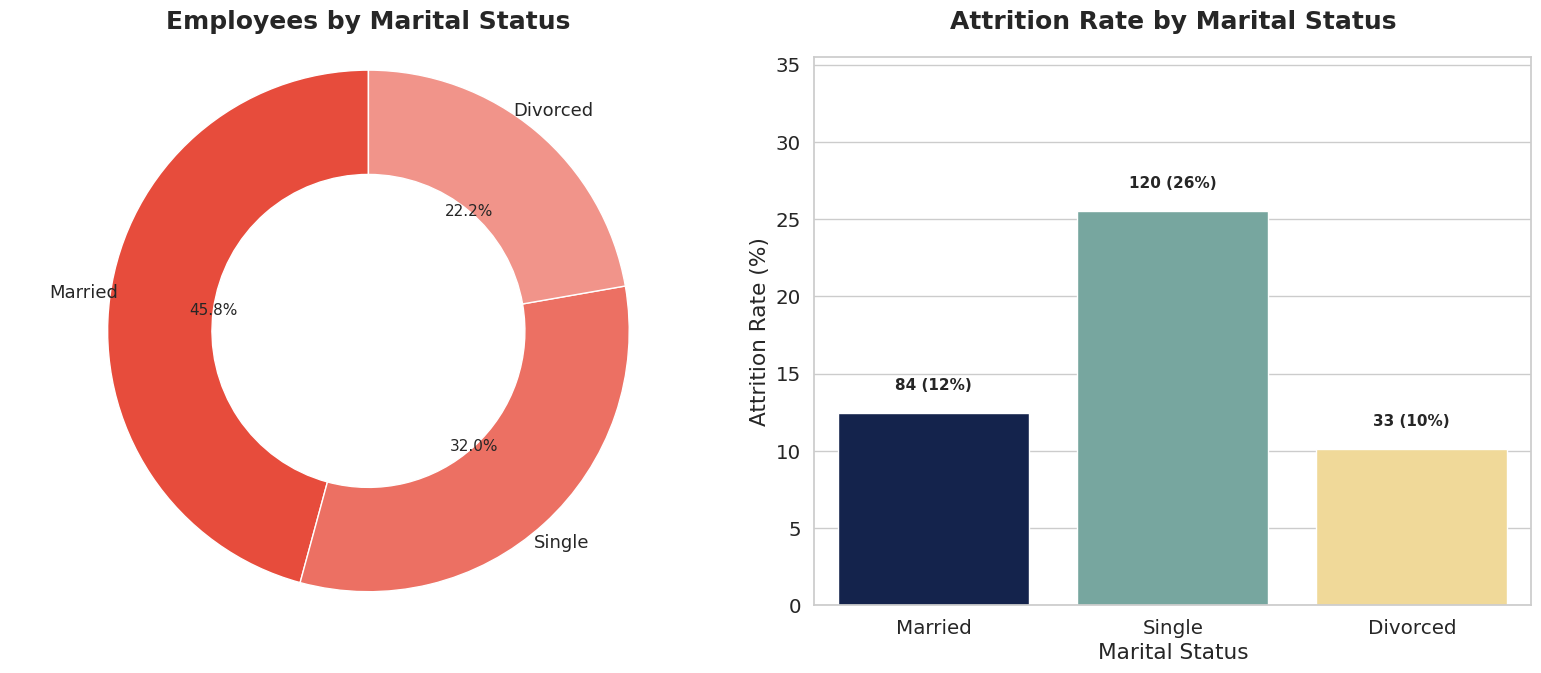

In [ ]:
category = 'maritalstatus'
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Donut Chart: Employees by Marital Status
marital_distribution = df[category].value_counts().reindex(['Married', 'Single', 'Divorced'])
colors = ["#E74C3C", "#EC7063", "#F1948A"]

wedges, texts, autotexts = axes[0].pie(
    marital_distribution,
    labels=marital_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 13},
    wedgeprops=dict(width=0.4)
)

axes[0].set_title("Employees by Marital Status", fontsize=18, fontweight='bold', pad=20)
axes[0].axis('equal')

for text in texts:
    text.set_fontsize(13)
    text.set_ha('center')
    text.set_va('center')
for autotext in autotexts:
    autotext.set_fontsize(11)

# Barplot: Attrition Rate by Marital Status
attrition_yes = df[df['attrition'] == 'Yes'][category].value_counts().reindex(['Married', 'Single', 'Divorced'])
total_by_category = df[category].value_counts().reindex(['Married', 'Single', 'Divorced'])
attrition_rate = (attrition_yes / total_by_category * 100).fillna(0)

palette2 = ["#0B1F55", "#6FAEA4", "#FFE08A"]

sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    palette=palette2,
    ax=axes[1]
)

axes[1].set_title("Attrition Rate by Marital Status", fontsize=18, fontweight='bold', pad=20)
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Attrition Rate (%)')
axes[1].set_xticklabels(attrition_rate.index, rotation=0)
axes[1].set_ylim(0, attrition_rate.max() + 10)

for index, value in enumerate(attrition_rate.values):
    count = int(attrition_yes.get(attrition_rate.index[index], 0))
    axes[1].text(
        index, value + 1.5,
        f"{count} ({value:.0f}%)",
        ha='center', fontsize=11, fontweight='bold'
    )

plt.tight_layout()
plt.show()

Employee Distribution:

Nearly half of the employees are Married (46%), followed by Single (32%) and Divorced (22%) categories.

Attrition Rates:

Single employees exhibit the highest attrition rate (26%), while Divorced employees show the lowest attrition rate (10%).


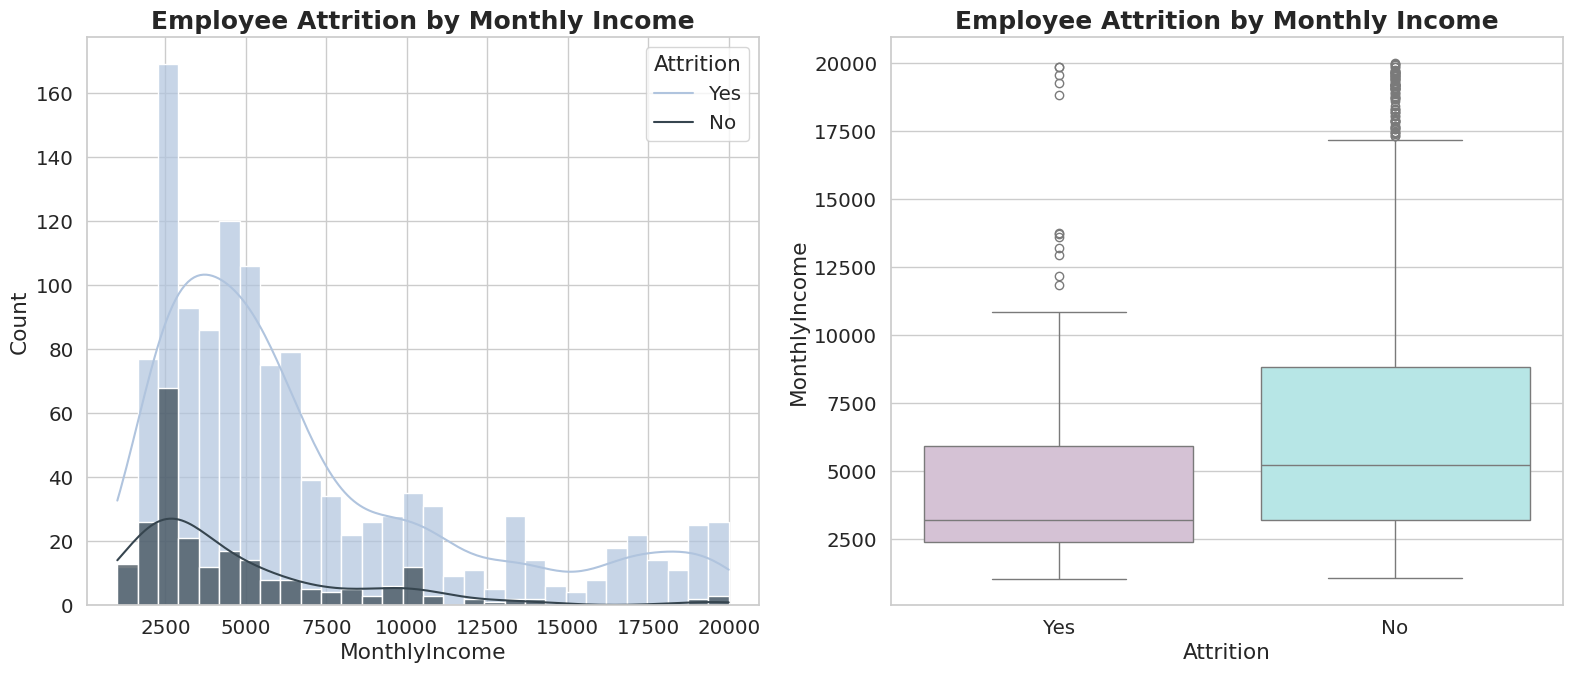

In [ ]:
plt.figure(figsize=(16, 7))

# Histogram + KDE: Monthly Income Distribution by Attrition
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='monthlyincome', hue='attrition', kde=True, palette=["#36454F", "#B0C4DE"], alpha=0.7, bins=30)
plt.title("Employee Attrition by Monthly Income", fontsize=18, fontweight='bold')
plt.xlabel("MonthlyIncome")
plt.ylabel("Count")
plt.legend(title='Attrition', labels=['Yes', 'No'])

# Boxplot: Monthly Income vs Attrition
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='attrition', y='monthlyincome', palette=["#D8BFD8", "#AFEEEE"])
plt.title("Employee Attrition by Monthly Income", fontsize=18, fontweight='bold')
plt.xlabel("Attrition")
plt.ylabel("MonthlyIncome")

plt.tight_layout()
plt.show()


Employee Distribution:

A majority of employees earn below $5000 per month, with a sharp decline in employee count as income increases.

Attrition Rates:

Employees with lower monthly incomes are significantly more likely to leave the company, while those with higher incomes tend to stay longer.

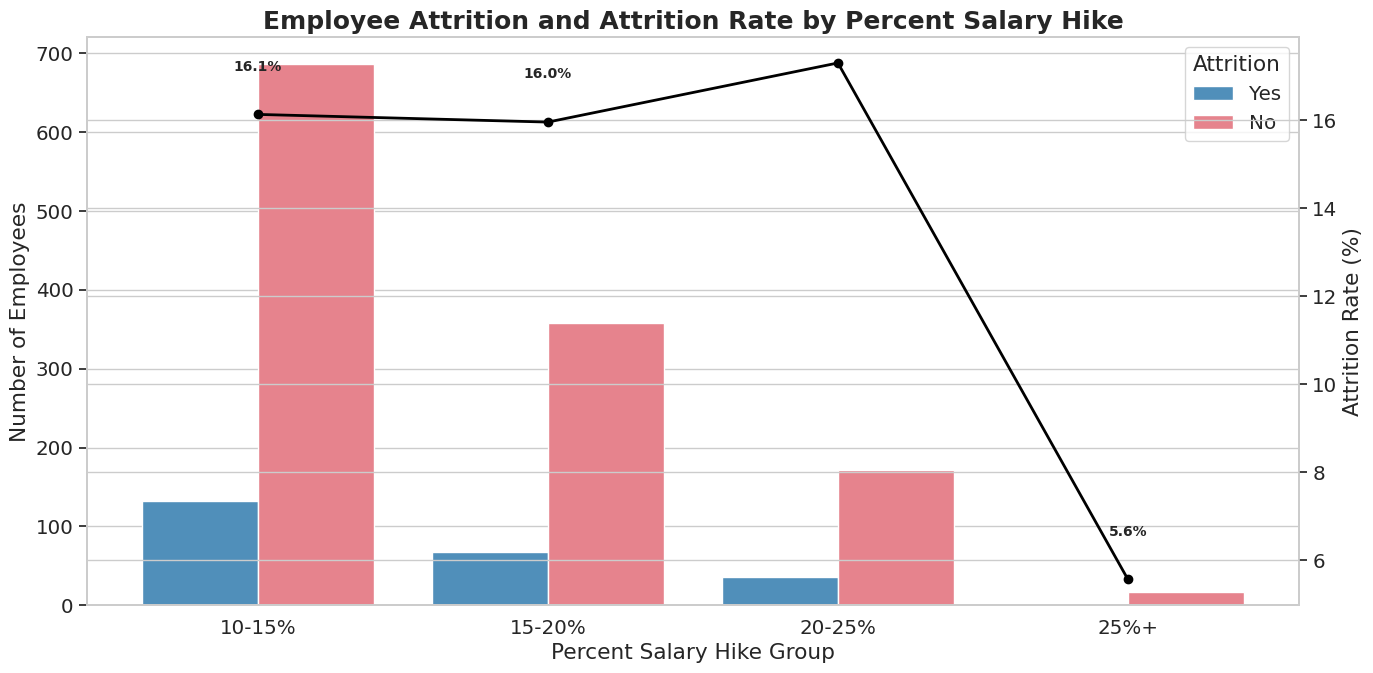

In [ ]:
bins = [10, 15, 20, 25, 30]
labels = ['10-15%', '15-20%', '20-25%', '25%+']
df['hike_group'] = pd.cut(df['percentsalaryhike'], bins=bins, labels=labels, right=False)
hike_attrition = df.groupby('hike_group')['attrition'].value_counts(normalize=True).unstack().fillna(0)
hike_attrition_rate = hike_attrition['Yes'] * 100

fig, ax1 = plt.subplots(figsize=(14, 7))
sns.countplot(data=df, x='hike_group', hue='attrition', palette=['#3E92CC', '#F67280'], ax=ax1)

ax1.set_ylabel('Number of Employees')
ax1.set_xlabel('Percent Salary Hike Group')
ax1.set_title('Employee Attrition and Attrition Rate by Percent Salary Hike', fontsize=18, fontweight='bold')
ax1.legend(title='Attrition', labels=['Yes', 'No'])
ax2 = ax1.twinx()

# Lineplot: Attrition Rate
hike_attrition_rate.plot(kind='line', marker='o', color='black', linewidth=2, ax=ax2)
ax2.set_ylabel('Attrition Rate (%)')
for i, rate in enumerate(hike_attrition_rate):
    ax2.annotate(f"{rate:.1f}%", (i, rate+1), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


Attrition rates are relatively stable (16%) across 10-25% salary hike ranges, but employees receiving over 25% hikes show a sharp drop in attrition (5.6%).
➔ Higher salary hikes appear to strongly retain employees.

Most employees are concentrated in the 10-15% hike group, where attrition still remains significant, suggesting that small hikes may not be enough to prevent resignations.

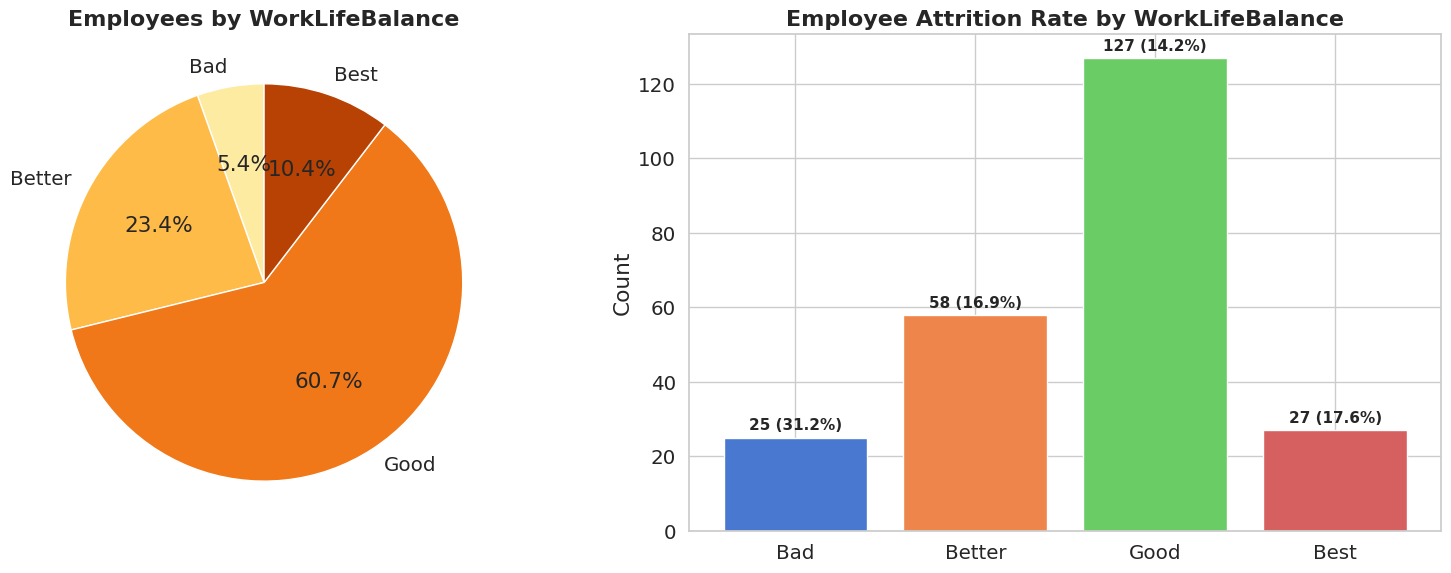

In [ ]:
# Group WorkLifeBalance values into readable categories
worklifebalance_mapping = {1: 'Bad', 2: 'Better', 3: 'Good', 4: 'Best'}
df['worklifebalance'] = df['worklifebalance'].map(worklifebalance_mapping)

worklifebalance_counts = df['worklifebalance'].value_counts().reindex(['Bad', 'Better', 'Good', 'Best'])
attrition_wlb = df[df['attrition'] == 'Yes']['worklifebalance'].value_counts().reindex(['Bad', 'Better', 'Good', 'Best'])

wlb_attrition_rate = (attrition_wlb / worklifebalance_counts) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie Chart
axes[0].pie(worklifebalance_counts, labels=worklifebalance_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlOrBr', len(worklifebalance_counts)))
axes[0].set_title('Employees by WorkLifeBalance', fontsize=16, fontweight='bold')

# Bar Plot
bars = axes[1].bar(worklifebalance_counts.index, attrition_wlb, color=sns.color_palette('muted', len(worklifebalance_counts)))
axes[1].set_title('Employee Attrition Rate by WorkLifeBalance', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Count')

for bar, count, rate in zip(bars, attrition_wlb, wlb_attrition_rate):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height()+2, f"{int(count)} ({rate:.1f}%)", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


Employees with a bad work-life balance show the highest attrition rate (31.2%), highlighting dissatisfaction as a key driver of exits.

Surprisingly, employees with a good balance form the majority but still contribute a significant number of attritions (~14.2%).

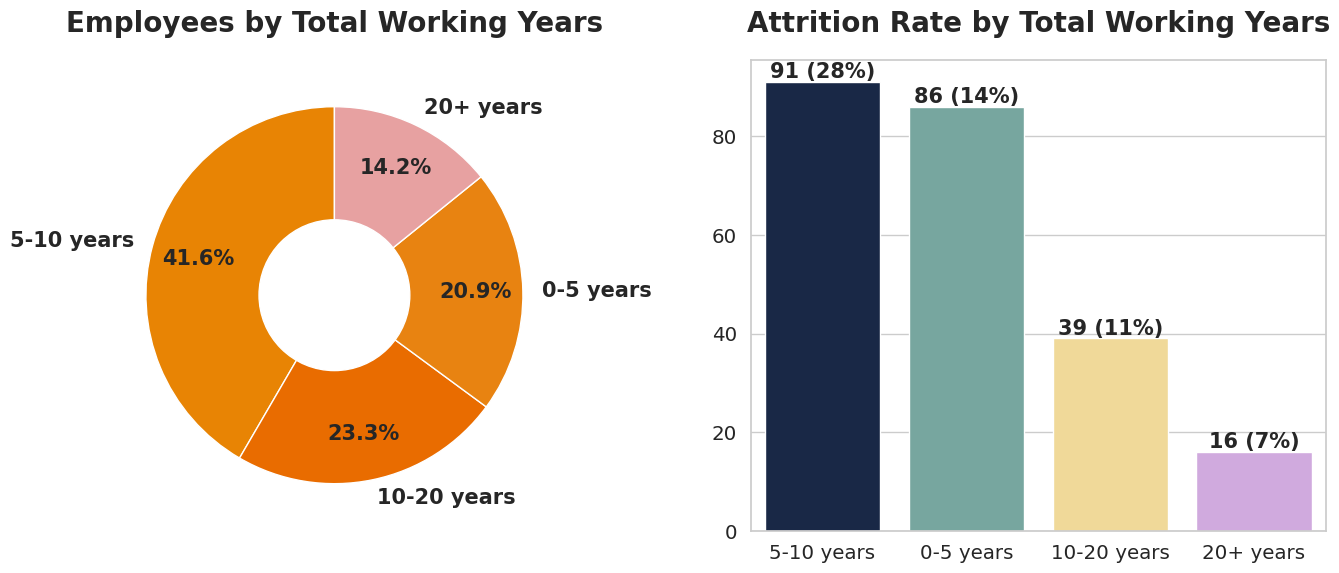

In [ ]:
# Define the bin edges and labels
bin_edges = [0, 5, 10, 20, 50]
bin_labels = ['0-5 years', '5-10 years', '10-20 years', '20+ years']

df['TotalWorkingYearsGroup'] = pd.cut(df['totalworkingyears'], bins=bin_edges, labels=bin_labels)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df['TotalWorkingYearsGroup'].value_counts()
plt.title("Employees by Total Working Years", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
        colors=["#E88404", "#E96C00", "#E88311", "#E7A1A1"],
        textprops={"fontweight":"black", "size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.subplot(1,2,2)
new_df = df[df['attrition']=="Yes"]
value_2 = new_df['TotalWorkingYearsGroup'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,
            palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7"])
plt.title("Attrition Rate by Total Working Years", fontweight="black", size=20, pad=20)
for index,value in enumerate(value_2):
    plt.text(index, value, str(value) + " (" + str(int(attrition_rate[index])) + "%)",
             ha="center", va="bottom", size=15, fontweight="black")

plt.tight_layout()
plt.show()


Attrition peaks around mid-career (5–10 years), possibly because of career stagnation, external opportunities, or unmet growth expectations.

Senior employees (10+ years) are much more likely to stay in the organization, showing higher retention with experience.

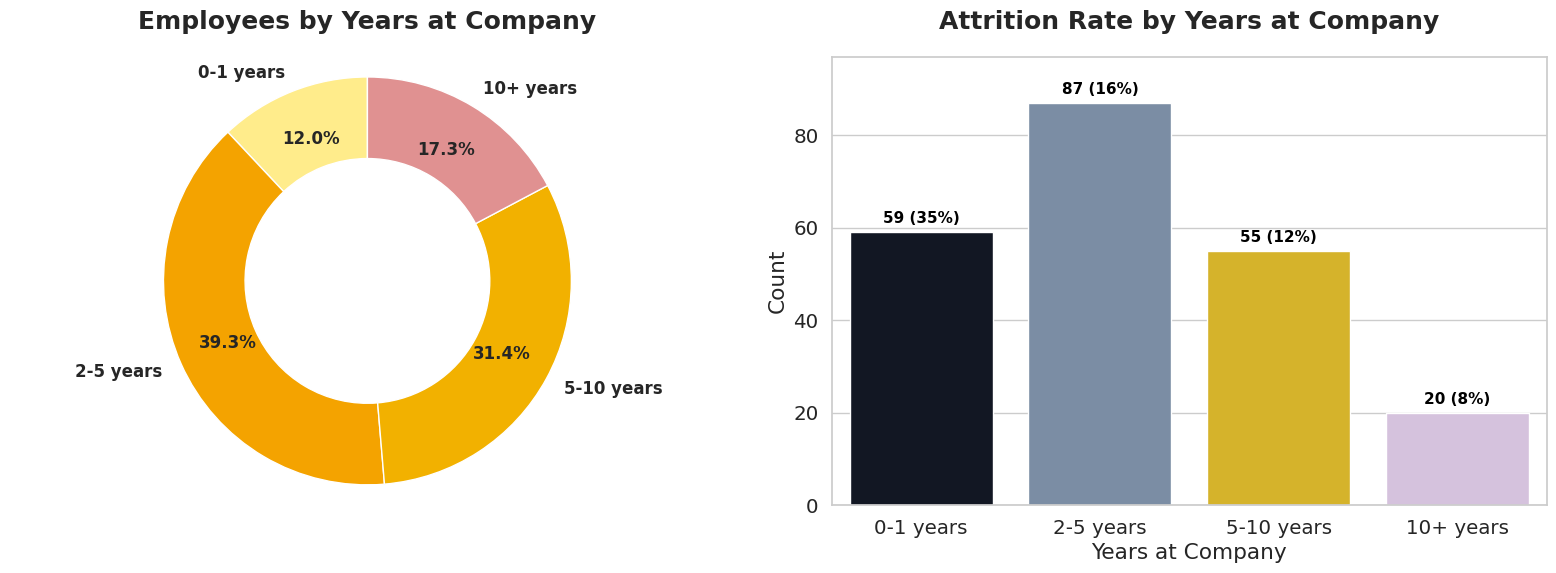

In [ ]:
# Define bin edges and labels
bin_edges = [0, 1, 5, 10, 50]
bin_labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']

df['yearsatcompanygroup'] = pd.cut(df['yearsatcompany'], bins=bin_edges, labels=bin_labels)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart - Employees distribution
value1 = df['yearsatcompanygroup'].value_counts().sort_index()
colors = ["#ffec8b", "#f4a300", "#f2b100", "#e09191"]

wedges, texts, autotexts = axes[0].pie(
    value1.values,
    labels=value1.index,
    autopct="%.1f%%",
    startangle=90,
    colors=colors,
    pctdistance=0.75,
    textprops={"fontsize": 12, "fontweight": "bold"},
    wedgeprops=dict(width=0.4)
)

center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig.gca().add_artist(center_circle)

axes[0].set_title("Employees by Years at Company", fontsize=18, fontweight="bold", pad=20)
axes[0].axis('equal')

# Bar plot - Attrition Rate by Years at Company
new_df = df[df['attrition'] == "Yes"]
value2 = new_df['yearsatcompanygroup'].value_counts().sort_index()
attrition_rate = (value2 / value1) * 100

sns.barplot(
    x=value2.index,
    y=value2.values,
    palette=["#0f1626", "#748cab", "#f1c40f", "#d7bde2"],
    ax=axes[1]
)

axes[1].set_title("Attrition Rate by Years at Company", fontsize=18, fontweight="bold", pad=20)
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Years at Company')
axes[1].set_ylim(0, value2.max() + 10)

for i, v in enumerate(value2):
    axes[1].text(i, v + 2, f"{v} ({attrition_rate[i]:.0f}%)", color='black', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

Early Tenure Attrition: Employees with 0–1 years at the company exhibit the highest attrition rate (35%), followed by those with 2–5 years (16%), indicating that early tenure is a critical period for employee retention.

Increased Stability with Tenure: Attrition rates decline significantly beyond 5 years of service (12% for 5–10 years, 8% for 10+ years), suggesting that long-tenured employees are considerably more stable and engaged.

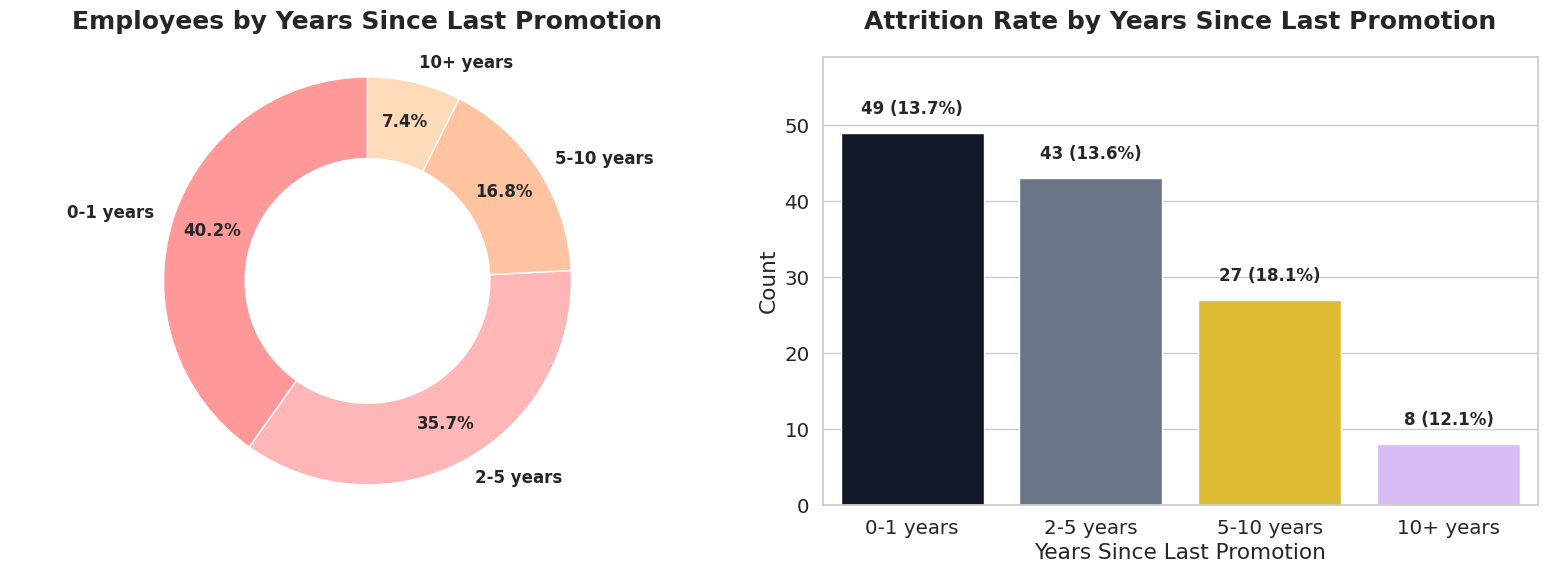

In [ ]:
# Binning YearsSinceLastPromotion
bin_edges = [0, 1, 5, 10, 50]
bin_labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']

df['yearssincelastpromotiongroup'] = pd.cut(df['yearssincelastpromotion'], bins=bin_edges, labels=bin_labels)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Donut chart for employee distribution
value1 = df['yearssincelastpromotiongroup'].value_counts().sort_index()
colors = ["#FF9999", "#FFB6B6", "#FFC3A0", "#FFDAB9"]

wedges, texts, autotexts = axes[0].pie(
    value1.values,
    labels=value1.index,
    autopct="%.1f%%",
    pctdistance=0.8,
    colors=colors,
    startangle=90,
    textprops={'fontsize': 12, 'fontweight': 'bold'},
    wedgeprops=dict(width=0.4)
)

centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)

axes[0].set_title("Employees by Years Since Last Promotion", fontsize=18, fontweight="bold", pad=20)
axes[0].axis('equal')

# Bar plot for attrition rate
attrition_df = df[df['attrition'] == 'Yes']
value2 = attrition_df['yearssincelastpromotiongroup'].value_counts().sort_index()
attrition_rate = (value2 / value1 * 100).round(1)

sns.barplot(
    x=value1.index,
    y=value2.values,
    palette=["#0f172a", "#64748b", "#facc15", "#d8b4fe"],
    ax=axes[1]
)

axes[1].set_title("Attrition Rate by Years Since Last Promotion", fontsize=18, fontweight="bold", pad=20)
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Years Since Last Promotion")
axes[1].set_ylim(0, value2.max() + 10)

for idx, val in enumerate(value2):
    axes[1].text(
        idx, val + 2,
        f"{val} ({attrition_rate[idx]}%)",
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )

plt.tight_layout()
plt.show()

Employee Distribution:
The majority of employees have been promoted relatively recently, with 40.2% promoted within 0–1 years and 35.7% within 2–5 years. Only a small portion (7.4%) have not been promoted for over 10 years, indicating a generally active promotion environment.

Attrition Trends:
Attrition is highest for employees who were promoted 5–10 years ago (18.1%), suggesting potential disengagement over time without further growth. Conversely, employees with a promotion in the last year or over 10 years ago show lower attrition rates (~13–12%), reflecting either new engagement or deep organizational loyalty.

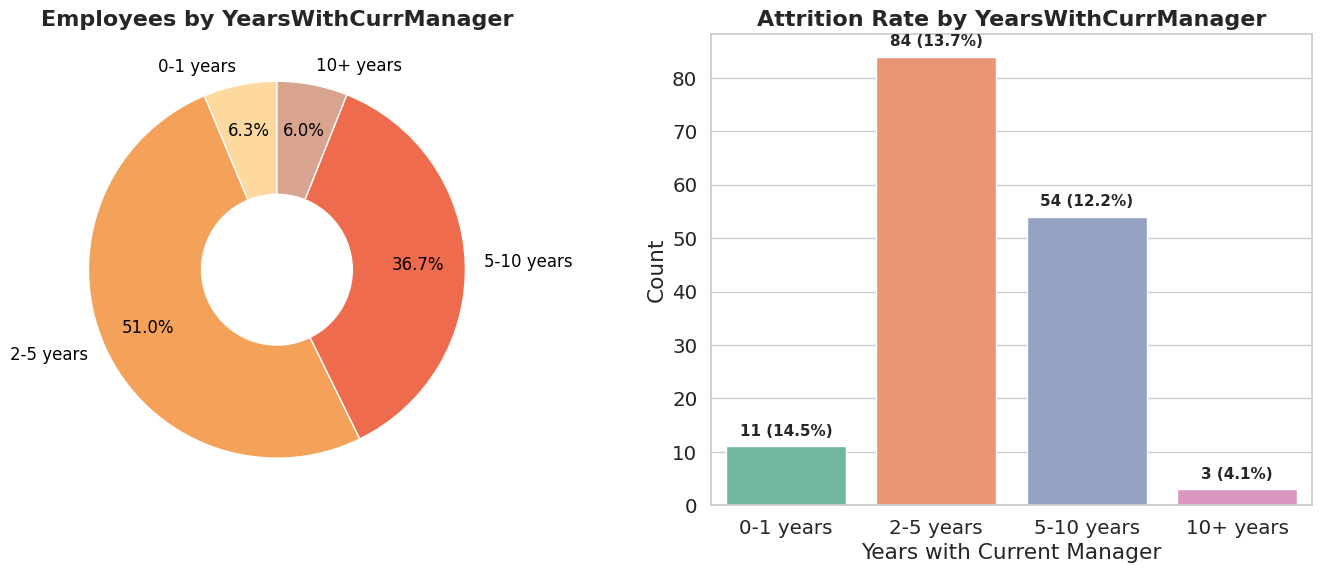

In [ ]:
bins = [0, 1, 5, 10, 50]
labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']
df['YearsWithCurrManagerGroup'] = pd.cut(df['yearswithcurrmanager'], bins=bins, labels=labels)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Pie Chart (Employees distribution)
value_counts = df['YearsWithCurrManagerGroup'].value_counts().sort_index()
colors = ["#fdd9a0", "#f4a259", "#ee6c4d", "#d8a48f"]

axes[0].pie(
    value_counts.values,
    labels=value_counts.index,
    autopct='%0.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.75,
    textprops={'color': 'black', 'fontsize': 12}
)
axes[0].set_title('Employees by YearsWithCurrManager', fontsize=16, fontweight='bold')
centre_circle = plt.Circle((0, 0), 0.4, color='white')
axes[0].add_artist(centre_circle)

# Right: Bar Chart (Attrition rate)
attrition_df = df[df['attrition'] == 'Yes']
attrition_counts = attrition_df['YearsWithCurrManagerGroup'].value_counts().sort_index()
attrition_rate = (attrition_counts / value_counts * 100).round(1)

sns.barplot(
    x=value_counts.index,
    y=attrition_counts.values,
    ax=axes[1],
    palette='Set2'
)

for i, (count, rate) in enumerate(zip(attrition_counts.values, attrition_rate.values)):
    axes[1].text(i, count + 2, f"{count} ({rate}%)", ha='center', fontsize=11, fontweight='bold')

axes[1].set_title('Attrition Rate by YearsWithCurrManager', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Years with Current Manager')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Employee Distribution

A majority of employees (around 51%) have spent 2–5 years with their current manager, followed by 37% in the 5–10 years range.

Very few employees are either extremely new (0–1 years, ~6%) or have been with the same manager for over 10 years (~6%).

Attrition Trend

Attrition is highest among employees with 2–5 years with their manager, suggesting possible dissatisfaction or stagnation around this tenure.

Employees with over 10 years with the same manager show the lowest attrition rate (4%), indicating stronger loyalty or stability over longer relationships.

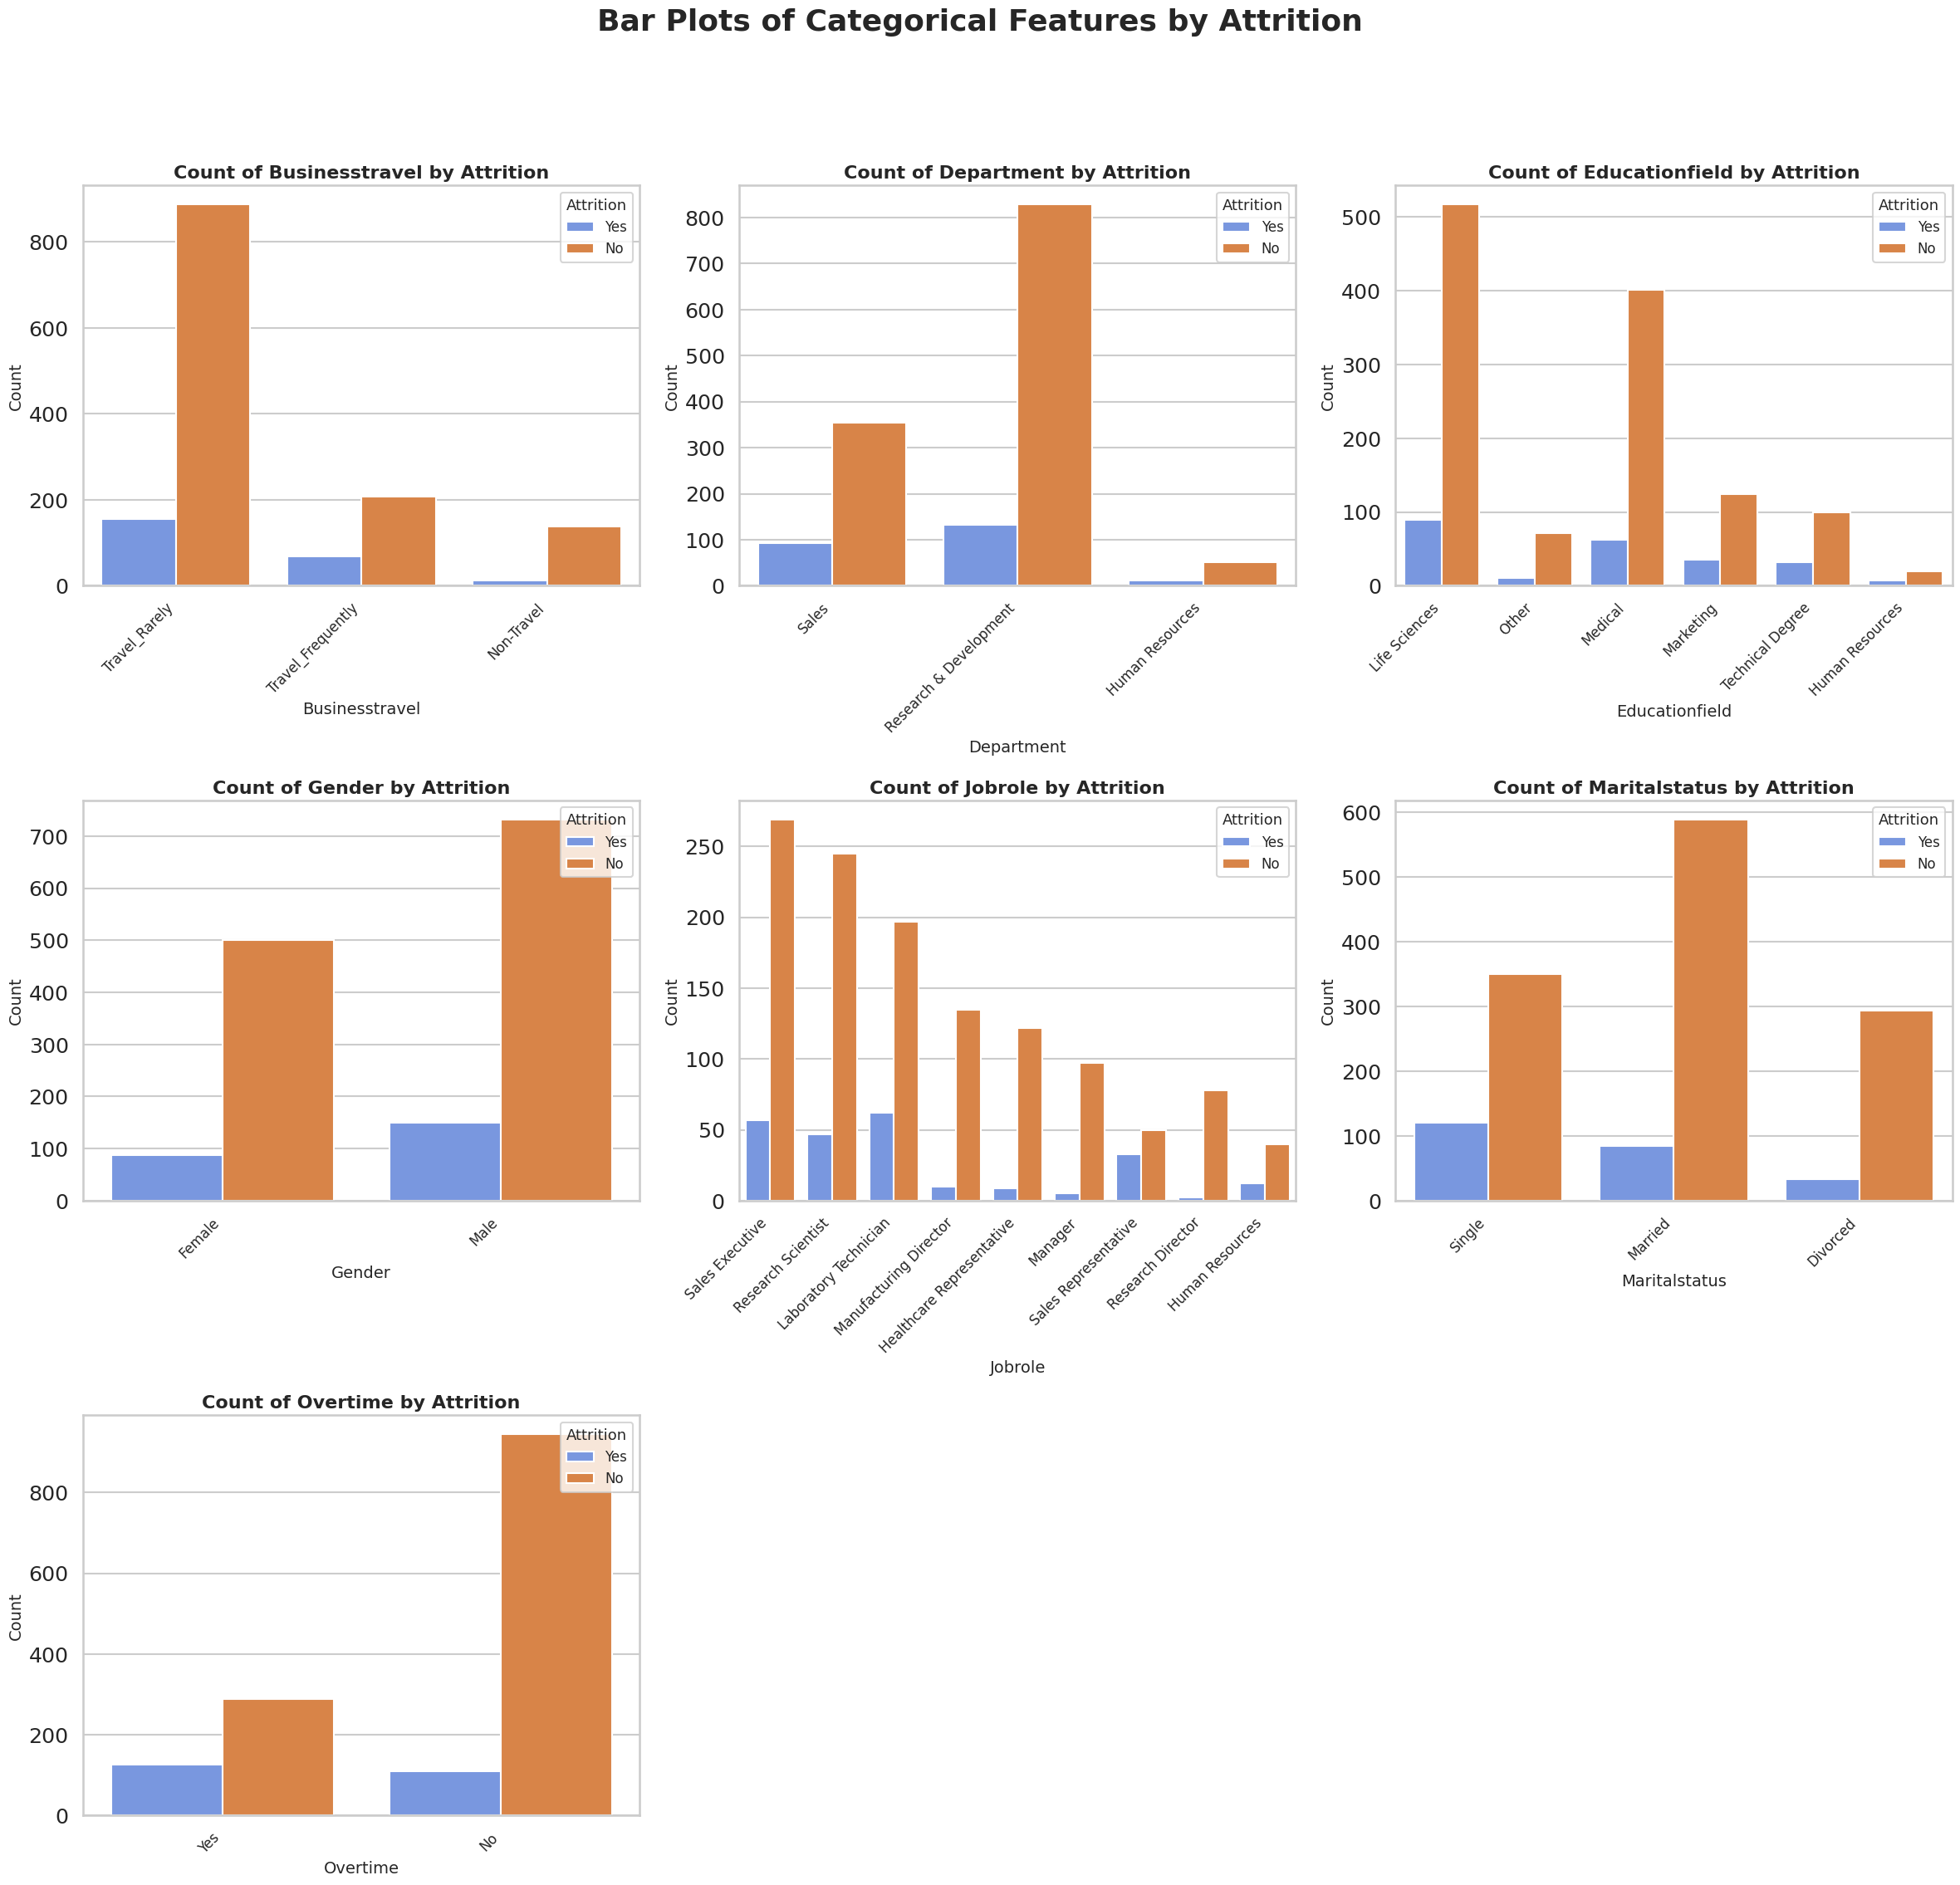

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid', context='talk', font_scale=1.1)
sns.set_palette("pastel")

categorical_features = [
    'businesstravel', 'department', 'educationfield', 'gender',
    'jobrole', 'maritalstatus', 'overtime'
]

box_colors = {"Yes": "#6890F0", "No": "#F08030"}
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 24))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, hue='attrition', ax=axes[i], palette=box_colors)
    axes[i].set_title(f'Count of {col.replace("_", " ").title()} by Attrition', fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col.replace("_", " ").title(), fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)

    for label in axes[i].get_xticklabels():
        label.set_horizontalalignment('right')

    handles, labels = axes[i].get_legend_handles_labels()
    if len(labels) == 2:
        axes[i].legend(handles=handles, labels=labels, title='Attrition', loc='upper right', fontsize=12, title_fontsize=13)
    else:
        legend = axes[i].get_legend()
        if legend:
            legend.remove()

for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Bar Plots of Categorical Features by Attrition", fontsize=26, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.94])

plt.show()

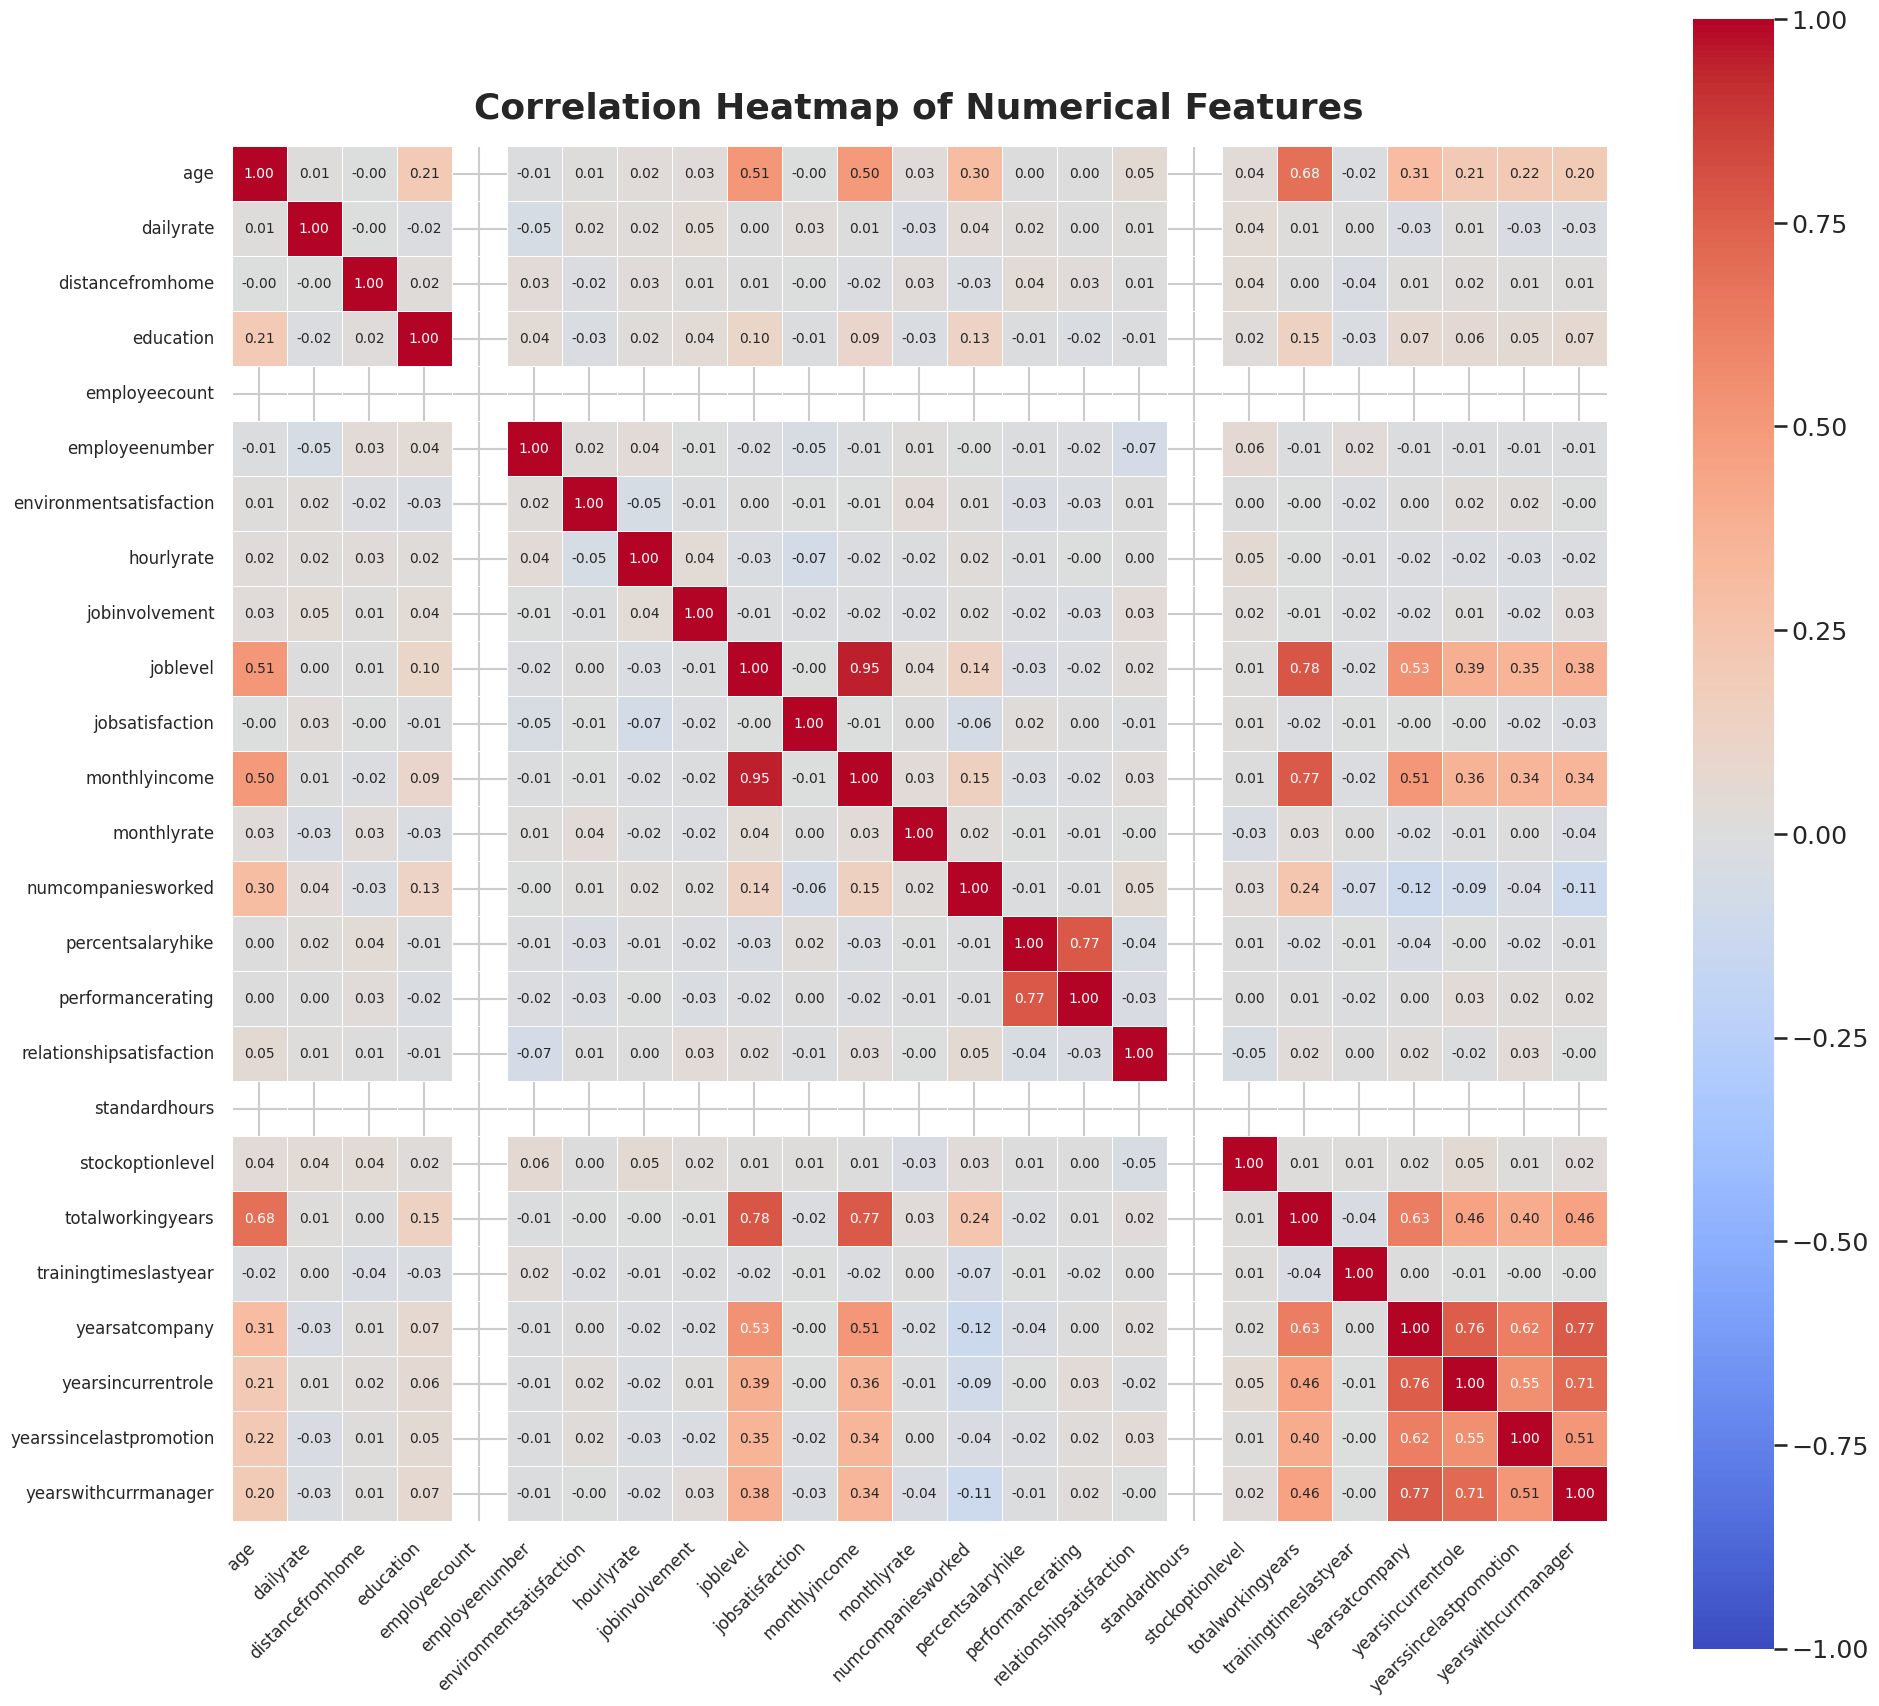

In [ ]:
# Correlation Heatmap of Numerical Features

# Separate numeric and categorical columns
numeric_features = df.select_dtypes(include='int64').columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(20, 18))
sns.heatmap(
    df[numeric_features].corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white',
    square=True,
    vmin=-1, vmax=1,
    annot_kws={'size':10}
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=26, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


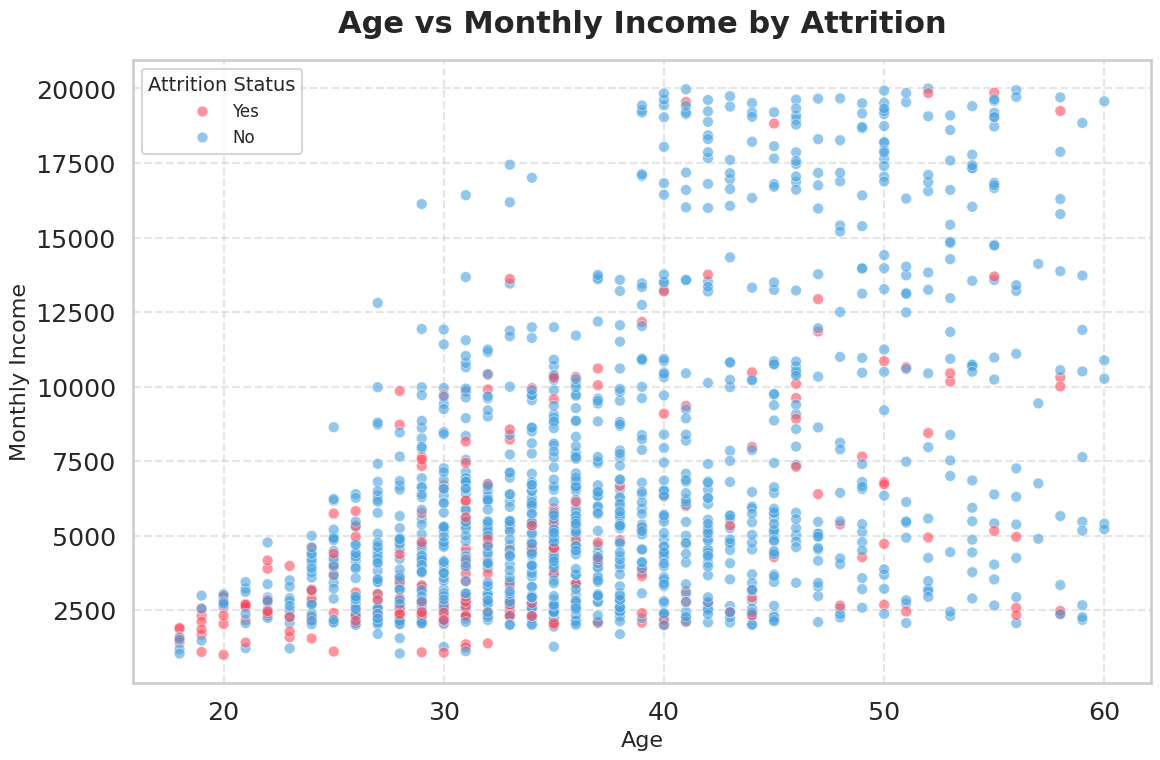

In [ ]:
# Age vs Monthly Income scatterplot

scatter_palette = {"Yes": "#ff4b5c", "No": "#4aa3df"}

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='age',
    y='monthlyincome',
    hue='attrition',
    palette=scatter_palette,
    alpha=0.6,
    s=60,
    edgecolor='w',
    linewidth=0.5
)

plt.title('Age vs Monthly Income by Attrition', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Monthly Income', fontsize=16)

plt.legend(title='Attrition Status', title_fontsize=14, fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Statistical Analysis

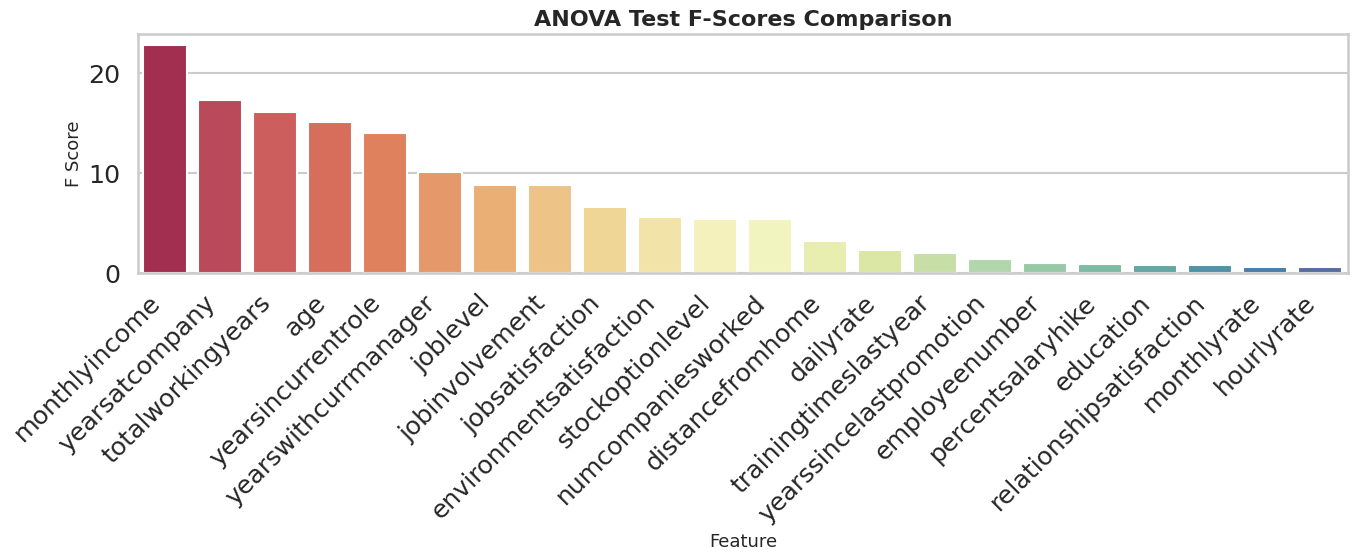

In [ ]:
from scipy.stats import f_oneway

df['attrition'] = df['attrition'].map({'Yes': 1, 'No': 0})
continuous_features = df.select_dtypes(include=[np.number]).columns.tolist()

continuous_features = [col for col in continuous_features if col != 'attrition']
continuous_features = [col for col in continuous_features if col in df.columns]

f_scores = {}

for feature in continuous_features:
    bins = pd.qcut(df[feature], q=4, duplicates='drop')
    grouped = df.groupby(bins)['attrition'].apply(list)

    if len(grouped) > 1:
        f_stat, p_value = f_oneway(*grouped)
        f_scores[feature] = f_stat

f_scores_df = pd.DataFrame(list(f_scores.items()), columns=['Feature', 'F_Score']).sort_values('F_Score', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=f_scores_df, x='Feature', y='F_Score', palette='Spectral')
plt.xticks(rotation=45, ha='right')
plt.title('ANOVA Test F-Scores Comparison', fontsize=16, weight='bold')
plt.xlabel('Feature', fontsize=13)
plt.ylabel('F Score', fontsize=13)
plt.tight_layout()
plt.show()


In [ ]:
df_copy = df.copy()
X = df_copy.drop(columns=['attrition'])
y = df_copy['attrition']
X = X.select_dtypes(include=[np.number])
X = X.fillna(X.mean())
from sklearn.feature_selection import f_classif

_, p_values = f_classif(X, y)
for feature, p_val in zip(X.columns, p_values):
    print(f"{feature}: p-value = {p_val:.5f}")

age: p-value = 0.00000
dailyrate: p-value = 0.02986
distancefromhome: p-value = 0.00279
education: p-value = 0.22932
employeecount: p-value = nan
employeenumber: p-value = 0.68533
environmentsatisfaction: p-value = 0.00007
hourlyrate: p-value = 0.79313
jobinvolvement: p-value = 0.00000
joblevel: p-value = 0.00000
jobsatisfaction: p-value = 0.00007
monthlyincome: p-value = 0.00000
monthlyrate: p-value = 0.56112
numcompaniesworked: p-value = 0.09553
percentsalaryhike: p-value = 0.60561
performancerating: p-value = 0.91188
relationshipsatisfaction: p-value = 0.07871
standardhours: p-value = nan
stockoptionlevel: p-value = 0.00000
totalworkingyears: p-value = 0.00000
trainingtimeslastyear: p-value = 0.02258
yearsatcompany: p-value = 0.00000
yearsincurrentrole: p-value = 0.00000
yearssincelastpromotion: p-value = 0.20579
yearswithcurrmanager: p-value = 0.00000


In [ ]:
X = X.select_dtypes(include=[np.number])

X = X.fillna(X.mean())

from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X, y)

anova_table = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': f_scores,
    'p_value': p_values
}).sort_values(by='F_Score', ascending=False)

anova_table['F_Score'] = anova_table['F_Score'].round(2)
anova_table = anova_table.dropna()

styled_table = (
    anova_table.style
    .background_gradient(cmap='YlGnBu', subset=['F_Score'])
    .background_gradient(cmap='Reds', subset=['p_value'])
    .format({'F_Score': "{:.2f}", 'p_value': "{:.5e}"})
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'center'), ('background-color', '#404040'), ('color', 'white')]
    }])
    .highlight_null(color='lightgrey')
    .set_caption("ANOVA Test Results: F-Scores and p-values")
)

styled_table

In [ ]:
# Chi-square tests

from scipy import stats
from scipy.stats import chi2_contingency

categorical_features = df.select_dtypes(include='object').columns.tolist()

for col in categorical_features:
    if col != 'Attrition':
        contingency_table = pd.crosstab(df[col], df['attrition'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square Test for {col} vs Attrition")
        print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")
        if p < 0.05:
            print("Significant association")
        else:
            print("No significant association")
        print('-'*40)


Chi-Square Test for businesstravel vs Attrition
Chi2 = 24.18, p-value = 0.0000
Significant association
----------------------------------------
Chi-Square Test for department vs Attrition
Chi2 = 10.80, p-value = 0.0045
Significant association
----------------------------------------
Chi-Square Test for educationfield vs Attrition
Chi2 = 16.02, p-value = 0.0068
Significant association
----------------------------------------
Chi-Square Test for gender vs Attrition
Chi2 = 1.12, p-value = 0.2906
No significant association
----------------------------------------
Chi-Square Test for jobrole vs Attrition
Chi2 = 86.19, p-value = 0.0000
Significant association
----------------------------------------
Chi-Square Test for maritalstatus vs Attrition
Chi2 = 46.16, p-value = 0.0000
Significant association
----------------------------------------
Chi-Square Test for over18 vs Attrition
Chi2 = 0.00, p-value = 1.0000
No significant association
----------------------------------------
Chi-Square Test 

In [ ]:
# Independent t-tests

for col in numeric_features:
    group_yes = df[df['attrition']=='Yes'][col]
    group_no = df[df['attrition']=='No'][col]

    t_stat, p_val = stats.ttest_ind(group_yes, group_no, equal_var=False)

    print(f"T-test for {col} between Attrition groups")
    print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print("Significant difference")
    else:
        print("No significant difference")
    print('-'*40)


T-test for age between Attrition groups
T-statistic = nan, p-value = nan
No significant difference
----------------------------------------
T-test for dailyrate between Attrition groups
T-statistic = nan, p-value = nan
No significant difference
----------------------------------------
T-test for distancefromhome between Attrition groups
T-statistic = nan, p-value = nan
No significant difference
----------------------------------------
T-test for education between Attrition groups
T-statistic = nan, p-value = nan
No significant difference
----------------------------------------
T-test for employeecount between Attrition groups
T-statistic = nan, p-value = nan
No significant difference
----------------------------------------
T-test for employeenumber between Attrition groups
T-statistic = nan, p-value = nan
No significant difference
----------------------------------------
T-test for environmentsatisfaction between Attrition groups
T-statistic = nan, p-value = nan
No significant differ

# ***Data Modeling***

In [ ]:
# Basic data exploration
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
print(df.columns)
df.head()

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')


age attrition     businesstravel  dailyrate              department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   distancefromhome  education educationfield  employeecount  employeenumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  relationshipsatisfaction standardhours  stockoptionlevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   totalworkingyears  trainingtimeslastyear worklifebalance  yearsatcompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  yearsincurrentrole  yearssincelastpromotion  yearswithcurrmanager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

Label Encoding

In [ ]:
# Convert categorical variables into numerical form.
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["attrition"] = label.fit_transform(df.attrition)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   int64 
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

Data Processing

In [ ]:
# Encode categorical data

dummy_col = [column for column in df.drop('attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 137 entries, age to yearswithcurrmanager_17
dtypes: int64(10), uint8(127)
memory usage: 297.3 KB


In [ ]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 137)
(1470, 137)


<Axes: >

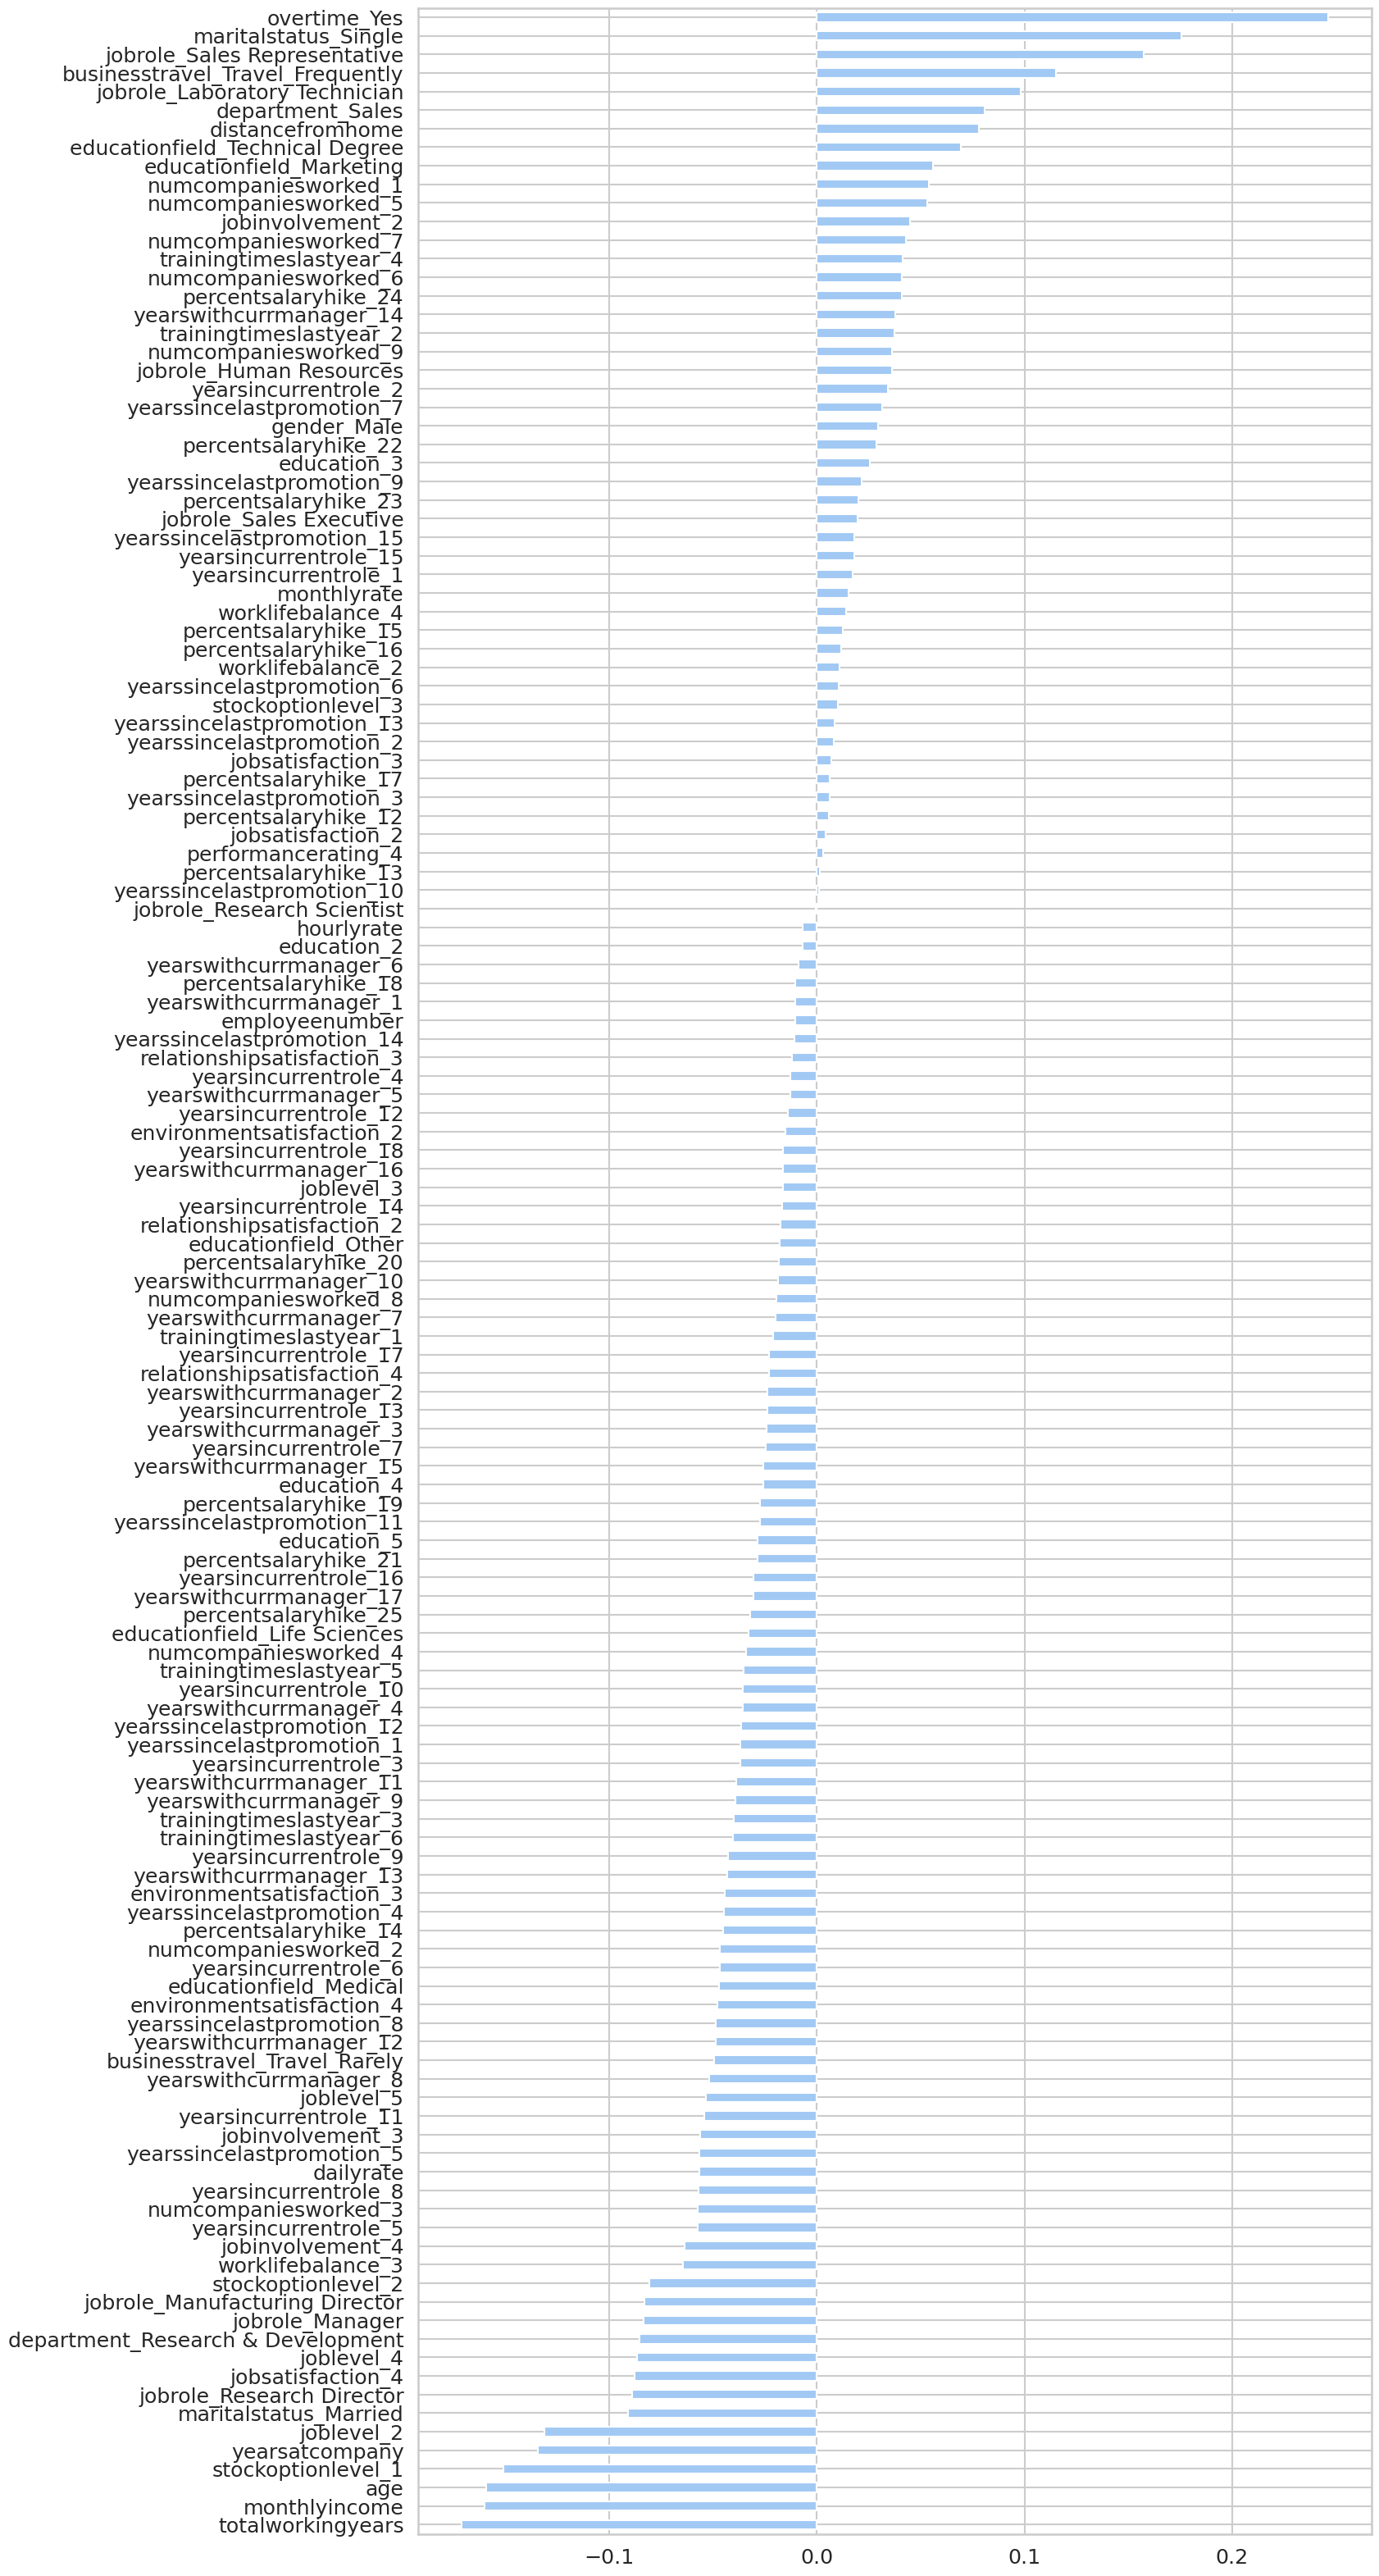

In [ ]:
data.drop('attrition', axis=1).corrwith(data.attrition).sort_values().plot(kind='barh', figsize=(15, 40))

In [ ]:
feature_correlation = data.drop('attrition', axis=1).corrwith(data.attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

92

Train and Test Dataset

In [ ]:
X = data.drop('attrition', axis=1)
y = data.attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [ ]:
y_test.value_counts()[0] / y_test.shape[0]

np.float64(0.8390022675736961)

In [ ]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

Logistic Regression

In [ ]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1', class_weight='balanced', max_iter=1000)
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[730 133]
 [ 15 151]]
ACCURACY SCORE:
0.8562
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.979866    0.531690  0.856171     0.755778      0.907565
recall       0.845886    0.909639  0.856171     0.877762      0.856171
f1-score     0.907960    0.671111  0.856171     0.789536      0.869751
support    863.000000  166.000000  0.856171  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[303  67]
 [ 20  51]]
ACCURACY SCORE:
0.8027
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.938080   0.432203  0.802721    0.685142      0.856635
recall       0.818919   0.718310  0.802721    0.768614      0.802721
f1-score     0.874459   0.539683  0.802721    0.707071      0.820561
support    370.000000  71.000000  0.802721  441.000000    441.000000


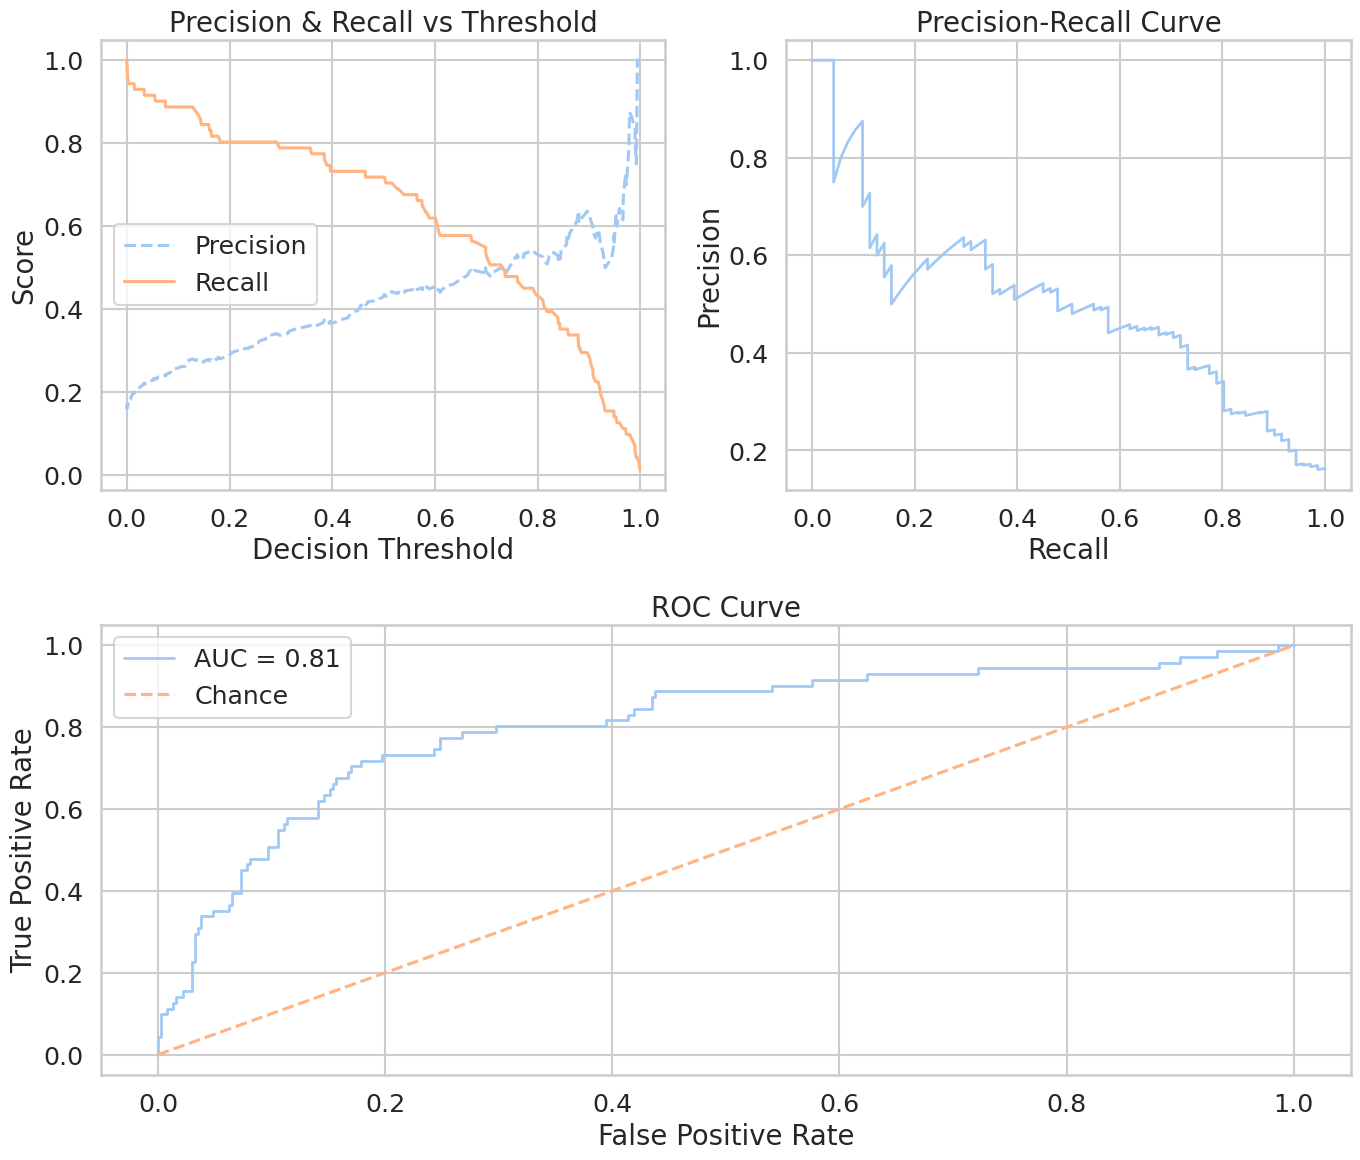

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = lr_clf.predict_proba(X_test_std)[:, 1]

precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_scores)

fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(14, 12))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(pr_thresholds, precisions[:-1], '--', label='Precision')
ax1.plot(pr_thresholds, recalls[:-1],   '-',  label='Recall')
ax1.set_xlabel('Decision Threshold')
ax1.set_ylabel('Score')
ax1.set_title('Precision & Recall vs Threshold')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(recalls, precisions, linewidth=2)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax3 = plt.subplot(2, 1, 2)
ax3.plot(fpr, tpr, linewidth=2, label=f'AUC = {roc_auc:.2f}')
ax3.plot([0, 1], [0, 1], '--', label='Chance')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curve')
ax3.legend(loc='best')

plt.tight_layout()
plt.show()


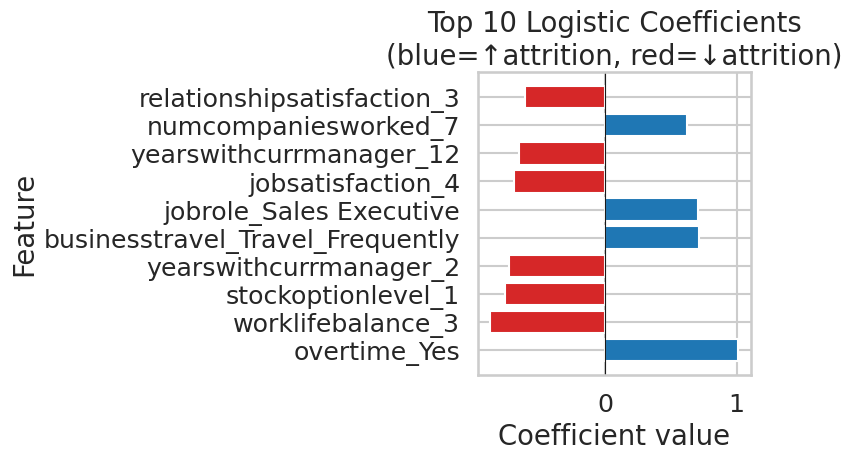

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
coefs = pd.Series(lr_clf.coef_[0], index=X_train.columns)
top_n = 10
imp       = coefs.abs().sort_values(ascending=False).head(top_n)
top_feats = imp.index
top_vals  = coefs.loc[top_feats]
colors = ['tab:blue' if v>0 else 'tab:red' for v in top_vals]
plt.figure(figsize=(8, 5))
plt.barh(top_feats, top_vals, color=colors)
plt.axvline(0, color='k', linewidth=0.8)
plt.title(f'Top {top_n} Logistic Coefficients\n(blue=↑attrition, red=↓attrition)')
plt.xlabel('Coefficient value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

Random Forest Classifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train_std, y_train)
evaluate(rf_clf, X_train_std, X_test_std, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[363   7]
 [ 63   8]]
ACCURACY SCORE:
0.8413
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.852113   0.533333   0.84127    0.692723      0.800790
recall       0.981081   0.112676   0.84127    0.546879      0.841270
f1-score     0.912060   0.186047   0.84127    0.549053      0.795174
support    370.000000  71.000000   0.84127  441.000000    441.000000


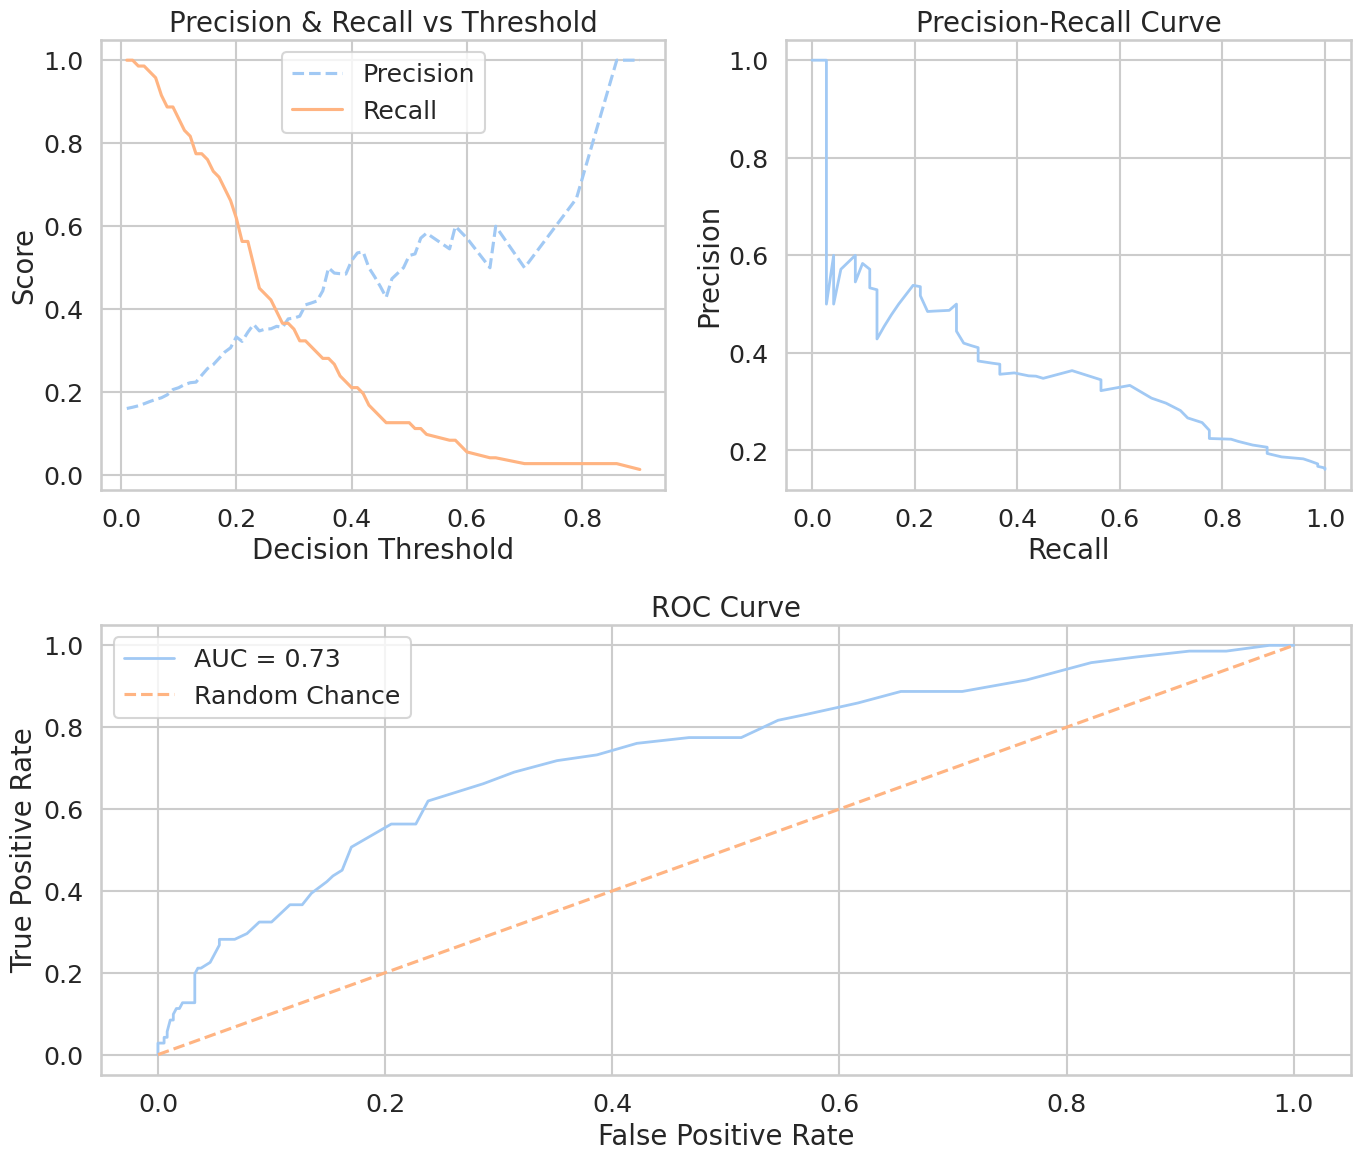

In [ ]:
y_scores = rf_clf.predict_proba(X_test_std)[:, 1]
precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, roc_thresholds            = roc_curve(y_test, y_scores)
roc_auc                              = roc_auc_score(y_test, y_scores)

# Draw
plt.figure(figsize=(14, 12))

ax1 = plt.subplot(2, 2, 1)
ax1.plot(pr_thresholds, precisions[:-1], '--', label='Precision')
ax1.plot(pr_thresholds, recalls[:-1],   '-',  label='Recall')
ax1.set_xlabel('Decision Threshold')
ax1.set_ylabel('Score')
ax1.set_title('Precision & Recall vs Threshold')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(recalls, precisions, linewidth=2)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax3 = plt.subplot(2, 1, 2)
ax3.plot(fpr, tpr, linewidth=2, label=f'AUC = {roc_auc:.2f}')
ax3.plot([0, 1], [0, 1], '--', label='Random Chance')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curve')
ax3.legend(loc='best')

plt.tight_layout()
plt.show()


In [ ]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test_std)),
    }

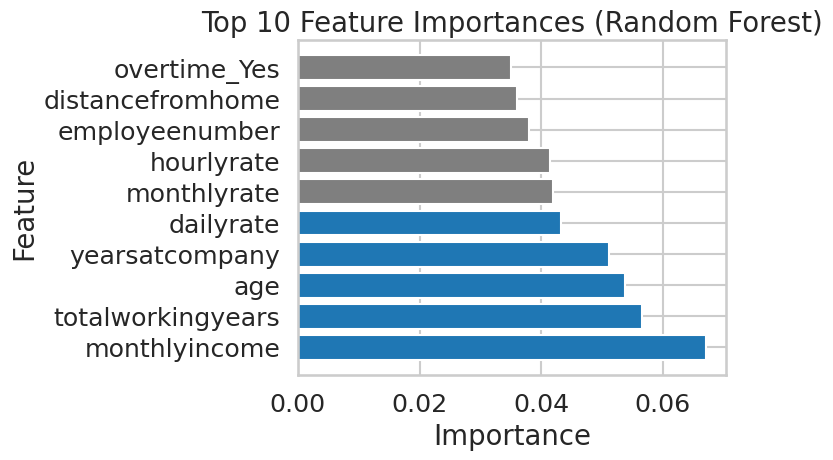

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
importances = pd.Series(
    rf_clf.feature_importances_,
    index=X_train.columns
)
top_n = 10
imp_sorted = importances.sort_values(ascending=False).head(top_n)
top_feats  = imp_sorted.index
top_vals   = imp_sorted.values
median_imp = imp_sorted.median()
colors = ['tab:blue' if v >= median_imp else 'tab:gray' for v in top_vals]
plt.figure(figsize=(8, 5))
plt.barh(top_feats, top_vals, color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[857   6]
 [ 48 118]]
ACCURACY SCORE:
0.9475
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.946961    0.951613  0.947522     0.949287      0.947712
recall       0.993048    0.710843  0.947522     0.851945      0.947522
f1-score     0.969457    0.813793  0.947522     0.891625      0.944345
support    863.000000  166.000000  0.947522  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[345  25]
 [ 46  25]]
ACCURACY SCORE:
0.8390
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.882353   0.500000  0.839002    0.691176      0.820795
recall       0.932432   0.352113  0.839002    0.642273      0.839002
f1-score     0.906702   0.413223  0.839002    0.659962      0.827253
support    370.000000  71.000000  0.839002  441.000000    441.000000


In [ ]:
from sklearn.model_selection import GridSearchCV
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [ ]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[862   1]
 [  6 160]]
ACCURACY SCORE:
0.9932
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.993088    0.993789  0.993197     0.993438      0.993201
recall       0.998841    0.963855  0.993197     0.981348      0.993197
f1-score     0.995956    0.978593  0.993197     0.987275      0.993155
support    863.000000  166.000000  0.993197  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[346  24]
 [ 42  29]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.891753   0.547170   0.85034    0.719461      0.836276
recall       0.935135   0.408451   0.85034    0.671793      0.850340
f1-score     0.912929   0.467742   0.85034    0.690335      0.841255
support    370.000000  71.000000   0.85034  441.000000    441.000000


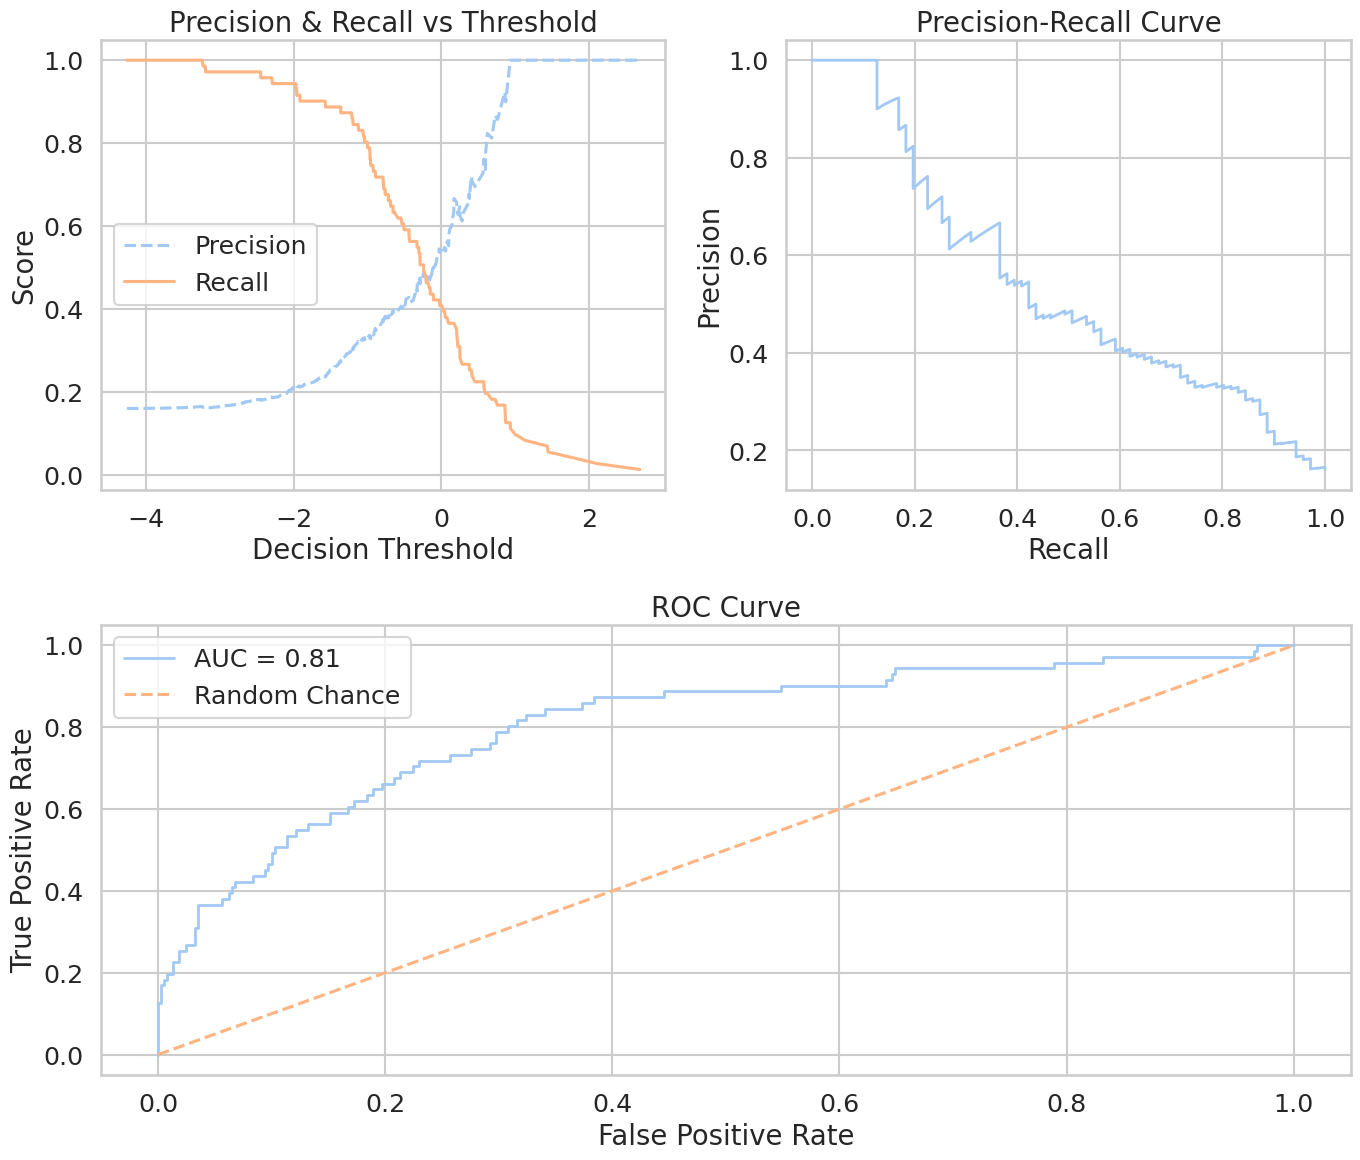

In [ ]:
y_scores = svm_clf.decision_function(X_test_std)
precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, roc_thresholds            = roc_curve(y_test, y_scores)
roc_auc                              = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(14, 12))

ax1 = plt.subplot(2, 2, 1)
ax1.plot(pr_thresholds, precisions[:-1], '--', label='Precision')
ax1.plot(pr_thresholds, recalls[:-1],   '-',  label='Recall')
ax1.set_xlabel('Decision Threshold')
ax1.set_ylabel('Score')
ax1.set_title('Precision & Recall vs Threshold')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(recalls, precisions, linewidth=2)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')

ax3 = plt.subplot(2, 1, 2)
ax3.plot(fpr, tpr, linewidth=2, label=f'AUC = {roc_auc:.2f}')
ax3.plot([0, 1], [0, 1], '--', label='Random Chance')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curve')
ax3.legend(loc='best')

plt.tight_layout()
plt.show()


In [ ]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),
    }

XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_std, y_train)

evaluate(xgb_clf, X_train_std, X_test_std, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[358  12]
 [ 48  23]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.881773   0.657143  0.863946    0.769458      0.845608
recall       0.967568   0.323944  0.863946    0.645756      0.863946
f1-score     0.922680   0.433962  0.863946    0.678321      0.843998
support    370.000000  71.000000  0.863946  441.000000    441.000000


In [ ]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test_std)),
    }

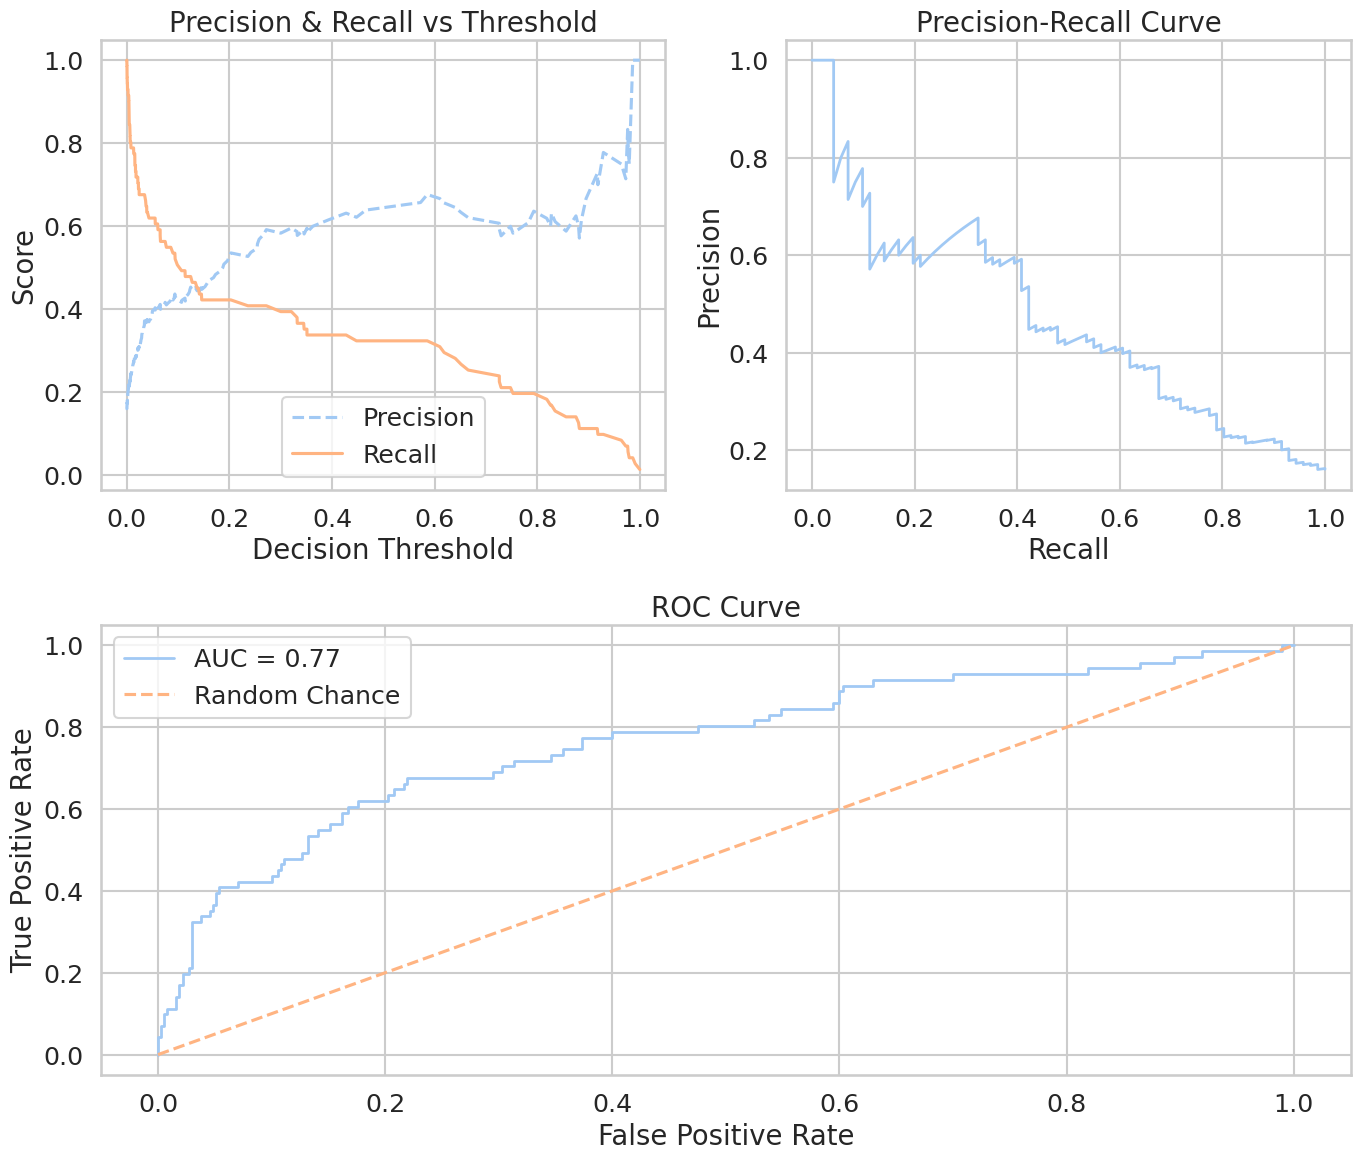

In [ ]:
y_scores = xgb_clf.predict_proba(X_test_std)[:, 1]

precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, roc_thresholds            = roc_curve(y_test, y_scores)
roc_auc                              = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(14, 12))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(pr_thresholds, precisions[:-1], '--', label='Precision')
ax1.plot(pr_thresholds, recalls[:-1],   '-',  label='Recall')
ax1.set_xlabel('Decision Threshold')
ax1.set_ylabel('Score')
ax1.set_title('Precision & Recall vs Threshold')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(recalls, precisions, linewidth=2)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')

ax3 = plt.subplot(2, 1, 2)
ax3.plot(fpr, tpr, linewidth=2, label=f'AUC = {roc_auc:.2f}')
ax3.plot([0, 1], [0, 1], '--', label='Random Chance')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curve')
ax3.legend(loc='best')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Feature Importance according to XGBoost')

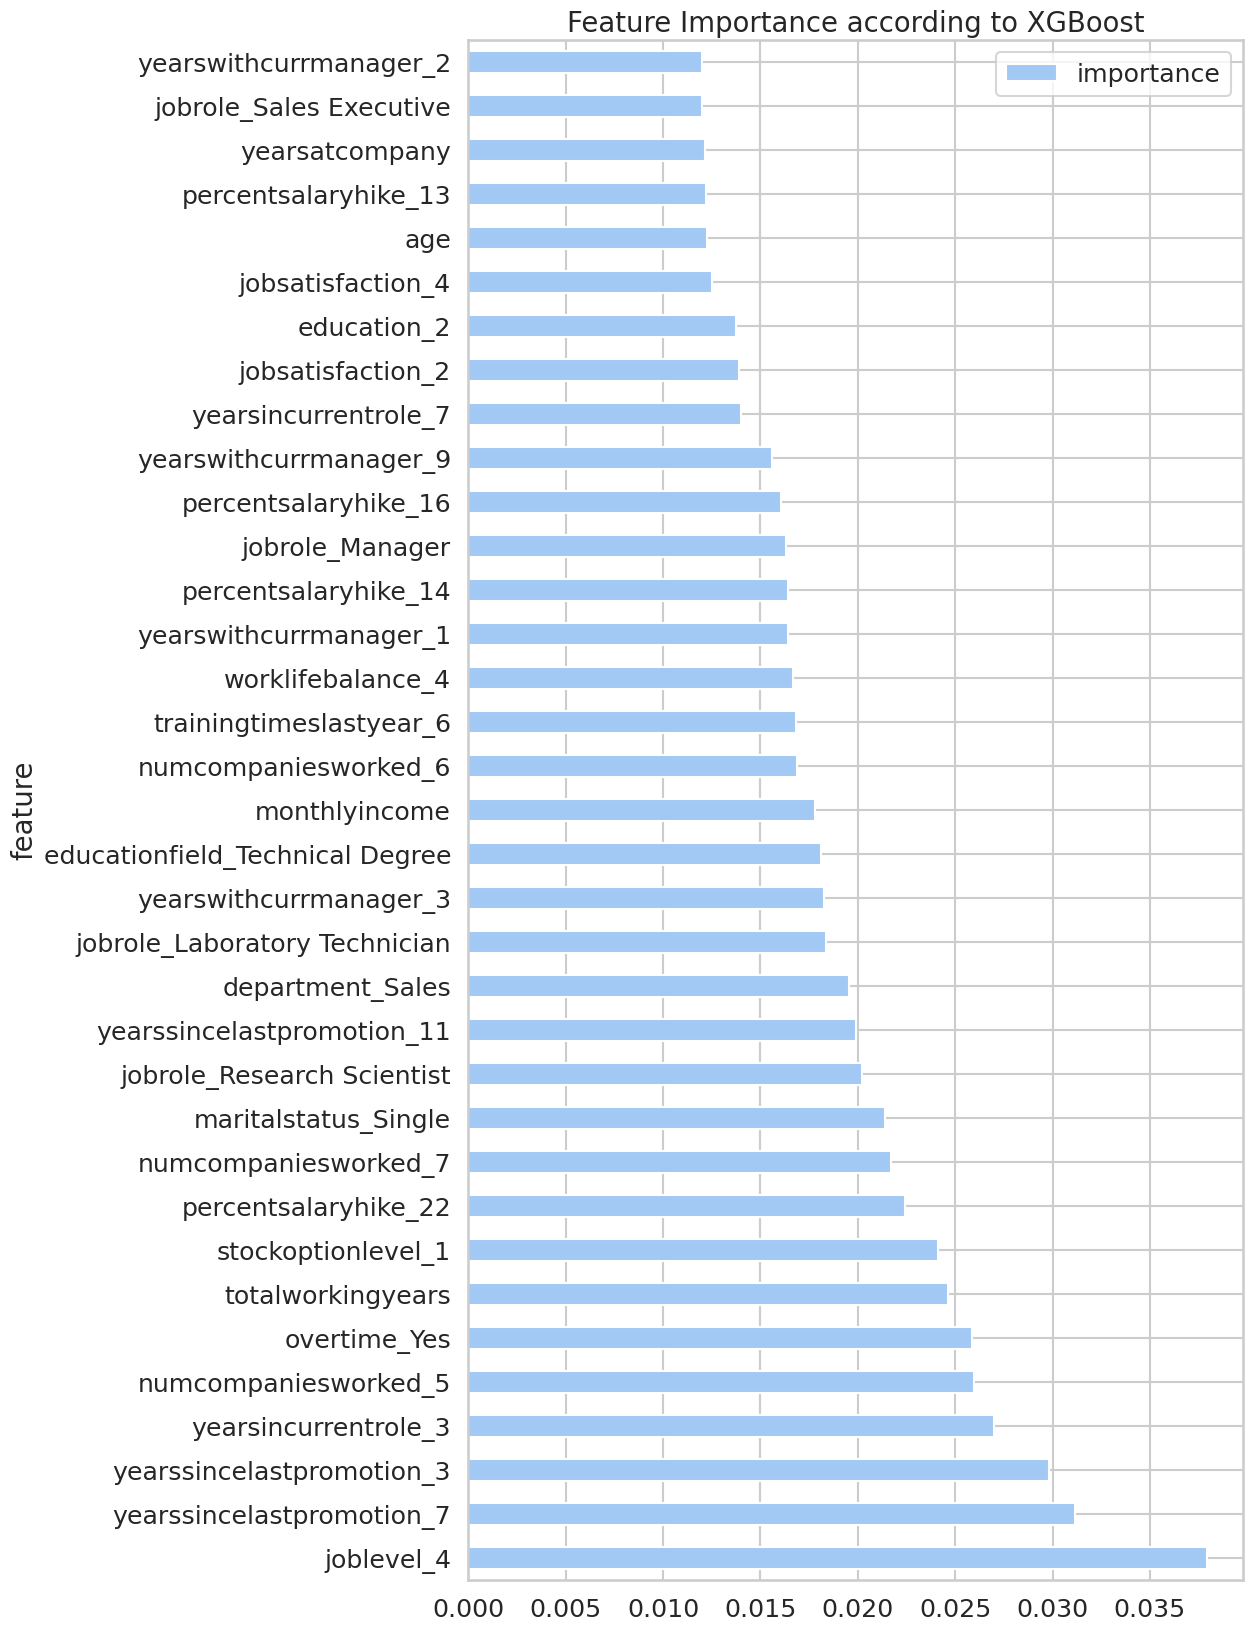

In [ ]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 20))
plt.title('Feature Importance according to XGBoost')

CatBoost Classifier

In [ ]:
from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train_std, y_train, verbose=0)

evaluate(cb_clf, X_train_std, X_test_std, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 16 150]]
ACCURACY SCORE:
0.9845
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.981797    1.000000  0.984451     0.990899      0.984734
recall       1.000000    0.903614  0.984451     0.951807      0.984451
f1-score     0.990815    0.949367  0.984451     0.970091      0.984129
support    863.000000  166.000000  0.984451  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[361   9]
 [ 58  13]]
ACCURACY SCORE:
0.8481
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.861575   0.590909  0.848073    0.726242      0.817999
recall       0.975676   0.183099  0.848073    0.579387      0.848073
f1-score     0.915082   0.279570  0.848073    0.597326      0.812766
support    370.000000  71.000000  0.848073  441.000000    441.000000


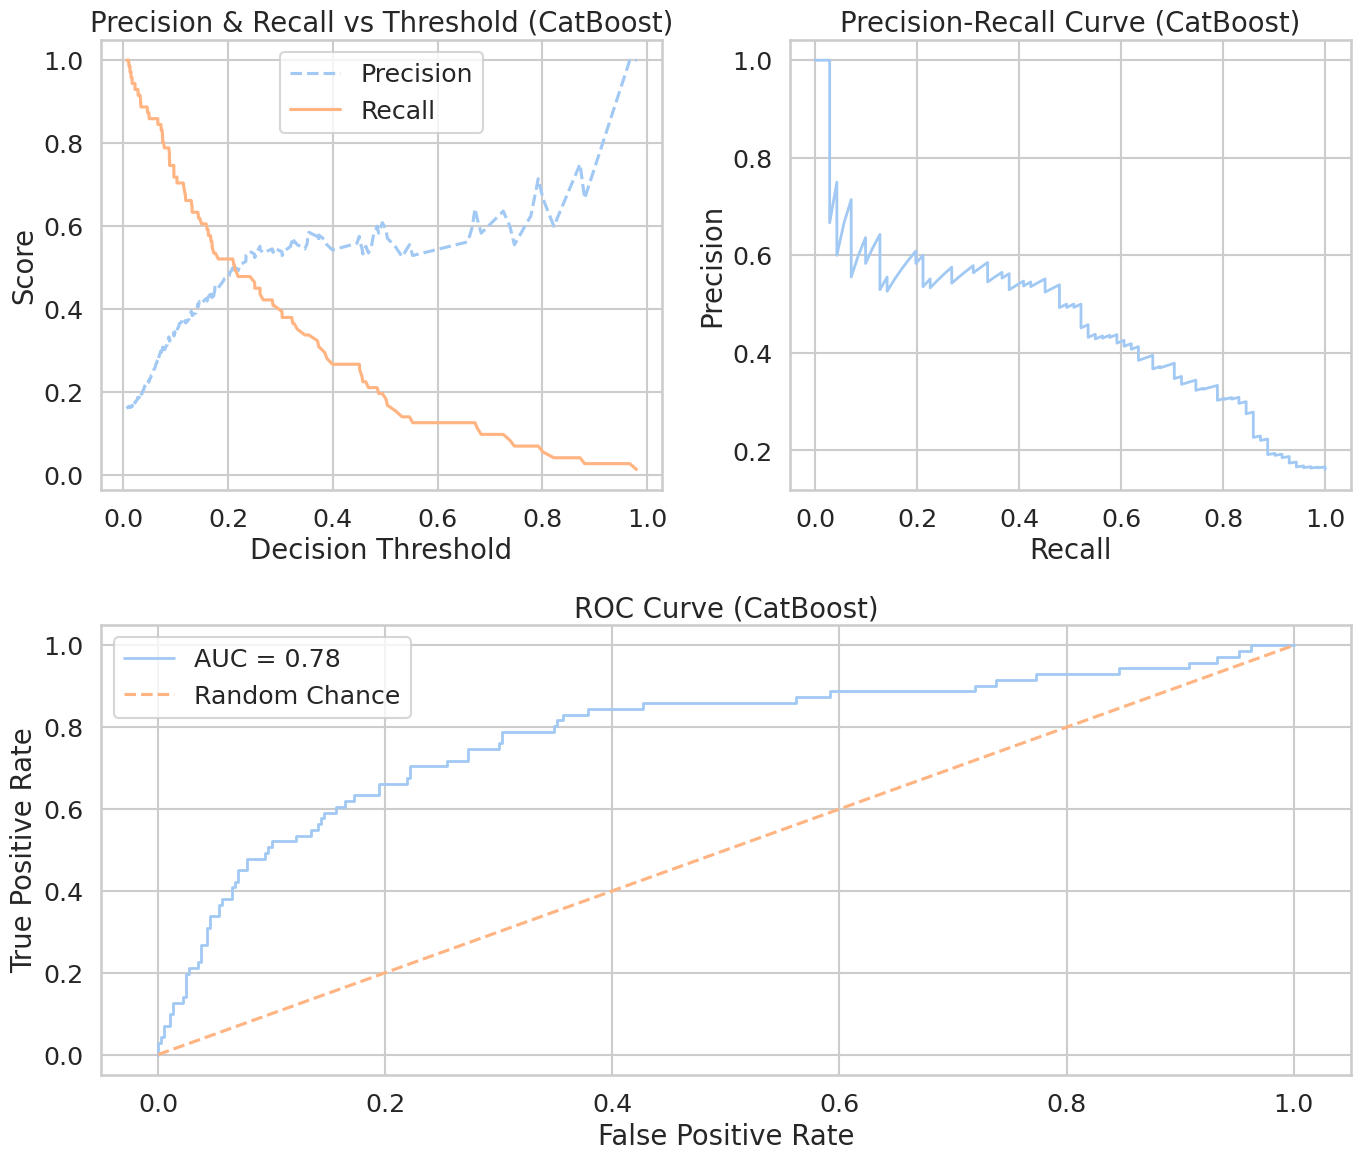

In [ ]:
# Plot Precision/Recall & ROC for CatBoost
y_scores = cb_clf.predict_proba(X_test_std)[:, 1]

precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, roc_thresholds            = roc_curve(y_test, y_scores)
roc_auc                              = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(14, 12))

ax1 = plt.subplot(2, 2, 1)
ax1.plot(pr_thresholds, precisions[:-1], '--', label='Precision')
ax1.plot(pr_thresholds, recalls[:-1],   '-',  label='Recall')
ax1.set_xlabel('Decision Threshold')
ax1.set_ylabel('Score')
ax1.set_title('Precision & Recall vs Threshold (CatBoost)')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(recalls, precisions, linewidth=2)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve (CatBoost)')

ax3 = plt.subplot(2, 1, 2)
ax3.plot(fpr, tpr, linewidth=2, label=f'AUC = {roc_auc:.2f}')
ax3.plot([0, 1], [0, 1], '--', label='Random Chance')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curve (CatBoost)')
ax3.legend(loc='best')

plt.tight_layout()
plt.show()


In [ ]:
scores_dict['CatBoost Classifier'] = {
    'Train': roc_auc_score(y_train, cb_clf.predict(X_train_std)),
    'Test': roc_auc_score(y_test, cb_clf.predict(X_test_std)),
}

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_std, y_train)

evaluate(dt_clf, X_train_std, X_test_std, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[321  49]
 [ 54  17]]
ACCURACY SCORE:
0.7664
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.856000   0.257576   0.76644    0.556788      0.759655
recall       0.867568   0.239437   0.76644    0.553502      0.766440
f1-score     0.861745   0.248175   0.76644    0.554960      0.762962
support    370.000000  71.000000   0.76644  441.000000    441.000000


In [ ]:
scores_dict['DecisionTree'] = {
    'Train': roc_auc_score(y_train, dt_clf.predict(X_train_std)),
    'Test': roc_auc_score(y_test, dt_clf.predict(X_test_std)),
}

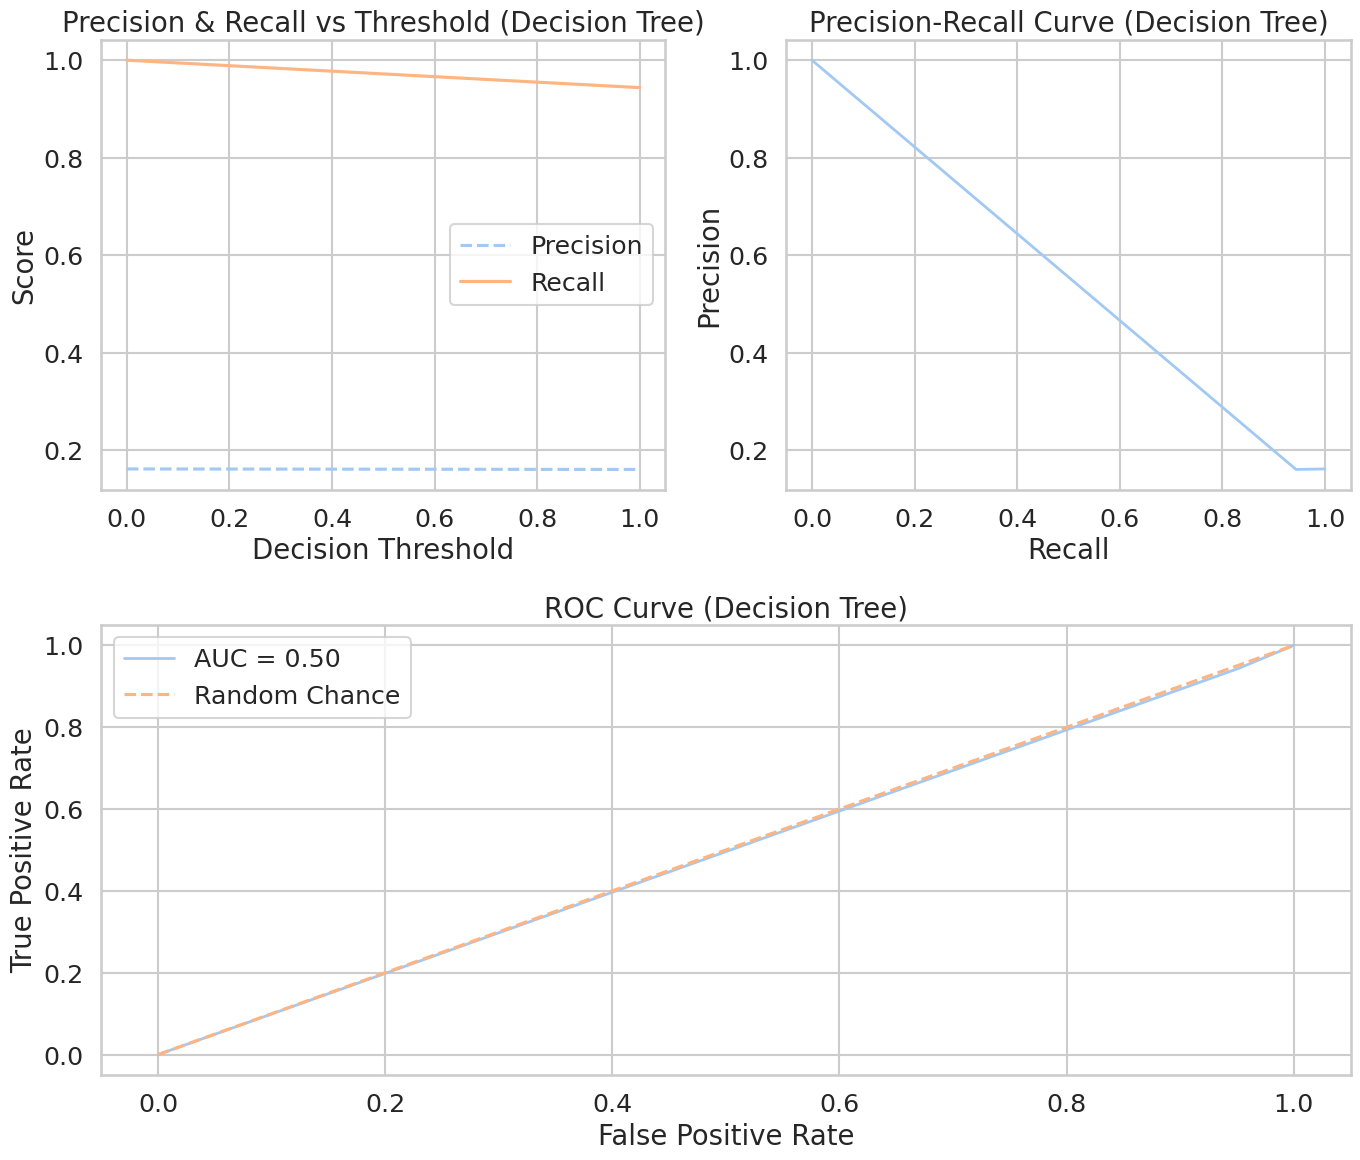

In [ ]:
y_scores_dt = dt_clf.predict_proba(X_test)[:, 1]
precisions_dt, recalls_dt, pr_thresholds_dt = precision_recall_curve(y_test, y_scores_dt)
fpr_dt, tpr_dt, roc_thresholds_dt            = roc_curve(y_test, y_scores_dt)
roc_auc_dt                                   = roc_auc_score(y_test, y_scores_dt)

plt.figure(figsize=(14, 12))

ax1 = plt.subplot(2, 2, 1)
ax1.plot(pr_thresholds_dt, precisions_dt[:-1], '--', label='Precision')
ax1.plot(pr_thresholds_dt, recalls_dt[:-1], '-', label='Recall')
ax1.set_xlabel('Decision Threshold')
ax1.set_ylabel('Score')
ax1.set_title('Precision & Recall vs Threshold (Decision Tree)')
ax1.legend(loc='best')
ax2 = plt.subplot(2, 2, 2)
ax2.plot(recalls_dt, precisions_dt, linewidth=2)
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve (Decision Tree)')

ax3 = plt.subplot(2, 1, 2)
ax3.plot(fpr_dt, tpr_dt, linewidth=2, label=f'AUC = {roc_auc_dt:.2f}')
ax3.plot([0, 1], [0, 1], '--', label='Random Chance')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curve (Decision Tree)')
ax3.legend(loc='best')

plt.tight_layout()
plt.show()


Comparing Model Performance

In [ ]:
ml_models = {
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf,
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
    'Decision Tree': dt_clf,
    'CatBoost Classifier': cb_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.510
XGBOOST                        roc_auc_score: 0.500
LOGISTIC REGRESSION            roc_auc_score: 0.550
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500
DECISION TREE                  roc_auc_score: 0.496
CATBOOST CLASSIFIER            roc_auc_score: 0.500


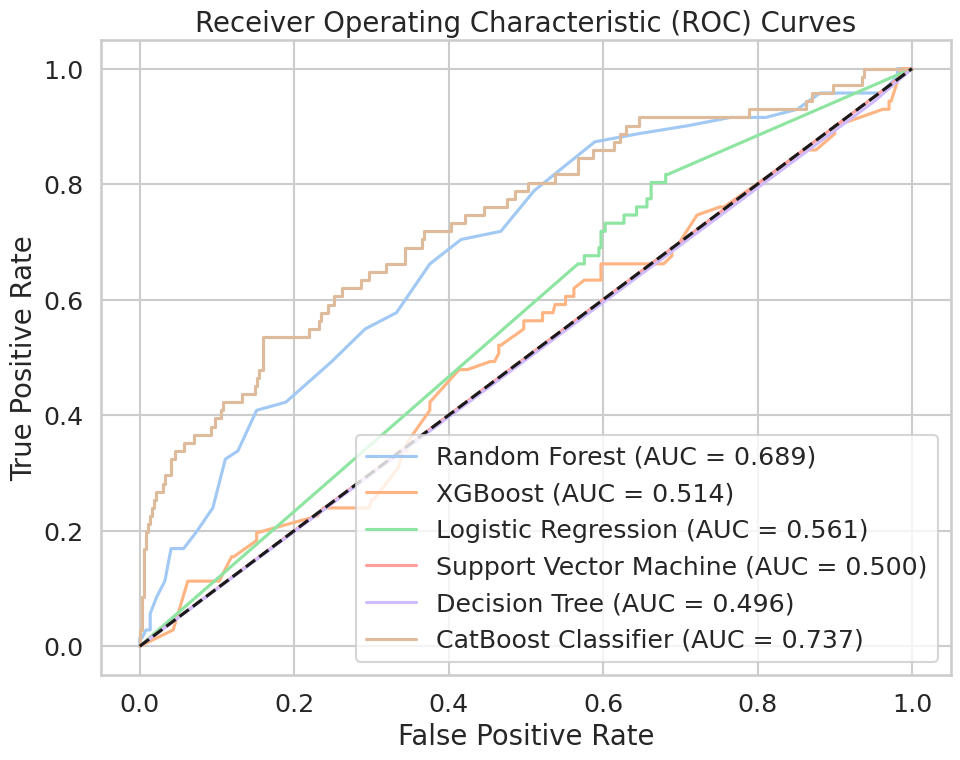

In [ ]:
plt.figure(figsize=(10, 8))
for model_name, model in ml_models.items():
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_prob = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    auc_score = roc_auc_score(y_test, y_pred_prob)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

acc_rf = accuracy_score(y_test, rf_clf.predict(X_test_std))
acc_xgb = accuracy_score(y_test, xgb_clf.predict(X_test_std))
acc_lr = accuracy_score(y_test, lr_clf.predict(X_test_std))
acc_svm = accuracy_score(y_test, svm_clf.predict(X_test_std))
acc_dt = accuracy_score(y_test, dt_clf.predict(X_test_std))
acc_cb = accuracy_score(y_test, cb_clf.predict(X_test_std))

models_acc_df = pd.DataFrame({
    'Model': [
        'Random Forest',
        'XGBoost',
        'Logistic Regression',
        'Support Vector Machine',
        'Decision Tree',
        'CatBoost'
    ],
    'Accuracy': [
        acc_rf,
        acc_xgb,
        acc_lr,
        acc_svm,
        acc_dt,
        acc_cb
    ]
})

models_acc_df = models_acc_df.sort_values(by='Accuracy', ascending=False)
print(models_acc_df)


                    Model  Accuracy
1                 XGBoost  0.863946
3  Support Vector Machine  0.850340
5                CatBoost  0.848073
0           Random Forest  0.841270
2     Logistic Regression  0.802721
4           Decision Tree  0.766440


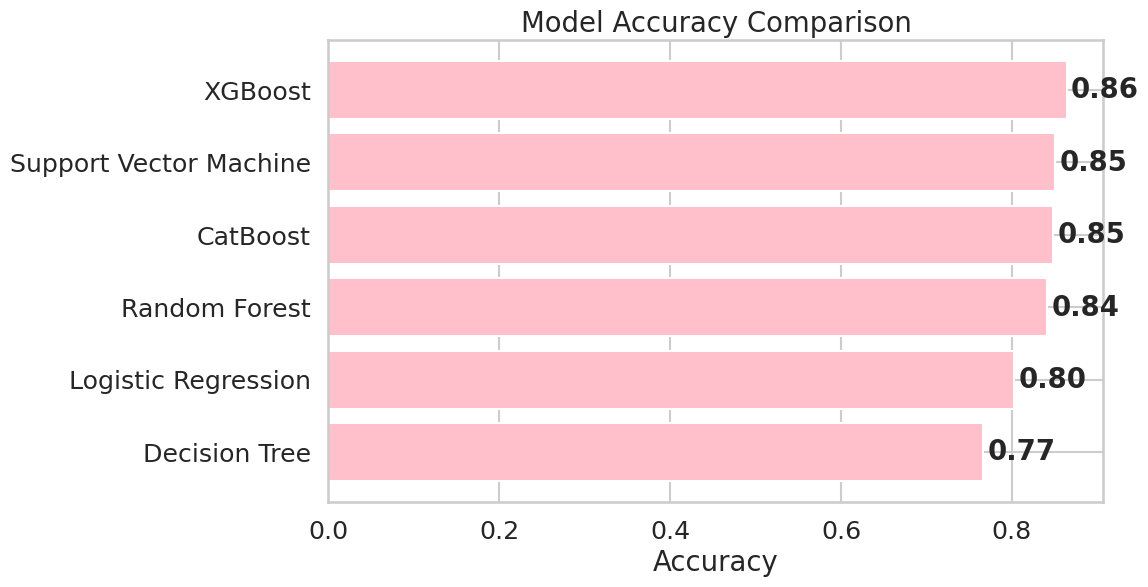

In [ ]:
# Plot the accuracies
plt.figure(figsize=(10,6))
plt.barh(models_acc_df['Model'], models_acc_df['Accuracy'], color='pink')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.gca().invert_yaxis()

for index, value in enumerate(models_acc_df['Accuracy']):
    plt.text(value + 0.005, index, f'{value:.2f}', va='center', fontweight='bold')

plt.show()
